#  Bank Term Deposit Prediction With Machine Learning

## - Table of Contents

1. [Data Description](#1.-Data-Description)

2. [Importation of Packages](#2.-Importation-of-Packages)

3. [Data Importation](#3.-Data-Importation)

4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis-(EDA))
    
    4.1 [Data Cleaning and Validation](#4.1-Data-Cleaning-and-Validation)

   4.2 [Univariate Analysis](#4.2-Univariate-Analysis)
   
   4.3 [Bivariate Analysis](#4.3-Bivariate-Analysis)
   
   4.4 [Multivariate Analysis](#4.4-Multivariate-Analysis)
   
   
5. [Feature Engineering and Data Preprocessing](#5.--Feature-Engineering-and-Data-Preprocessing)

6. [Model Building](#6.--Model-Building)

7. [Model Evaluation](#7.-Model-Evaluation)

8. [Model Selection](#8.-Model-Selection)

9. [Feature Importance](#9.-Feature-Importance)

10. [Summary](#10.-Summary)

11. [Recommendations](#11.-Recommendations)

12. [Model Deployment](#12.--Model-Deployment)

### 1. Data Description
The data is related to direct marketing campaigns (phone calls) of a banking institution.  
The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Data Source: https://fromsmash.com/ZLq5W.CQkL-ct


   #### Bank Client Data:
   
   1 - **Age** (numeric)
   
   2 - **Job:** type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - **Marital:** marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - **Education** (categorical: "unknown","secondary","primary","tertiary")
   
   5 - **Default:** has credit in default? (binary: "yes","no")
   
   6 - **Balance:** average yearly balance, in euros (numeric) 
   
   7 - **Housing:** has housing loan? (binary: "yes","no")
   
   8 - **Loan:** has personal loan? (binary: "yes","no")
   
   #### Related with the last contact of the current campaign:
   
   9 - **Contact:** contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - **Day:** last contact day of the month (numeric)
  
  11 - **Month:** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - **Duration:** last contact duration, in seconds (numeric)
  
   #### Other attributes:
   
  13 - **Campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - **Pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - **Previous:** number of contacts performed before this campaign and for this client (numeric)
  
  16 - **Poutcome:** outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
  
  17 - **y:** has the client subscribed a term deposit? (binary: "yes","no")


### 2. Importation of Packages

[Back to Table of Contents](#--Table-of-Contents)

In [1]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing package data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

#importing package to balance data
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Importing Classifcation Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing package for metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### 3. Data Importation

[Back to Table of Contents](#--Table-of-Contents)

In [3]:
df = pd.read_csv("bank-full.csv")

### 4. Exploratory Data Analysis (EDA)

[Back to Table of Contents](#--Table-of-Contents)

#### 4.1 Data Cleaning and Validation

In [4]:
df.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...

In [5]:
df.tail()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
45206  51;"technician";"married";"tertiary";"no";825;...                                                                                                  
45207  71;"retired";"divorced";"primary";"no";1729;"n...                                                                                                  
45208  72;"retired";"married";"secondary";"no";5715;"...                                                                                                  
45209  57;"blue-collar";"married";"secondary";"no";66...                                                                                                  
45210  37;"entrepreneur";"married";"secondary";"no";2...

In [6]:
df.shape

(45211, 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [8]:
df.describe()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
count                                               45211                                                                                                  
unique                                              45211                                                                                                  
top     58;"management";"married";"tertiary";"no";2143...                                                                                                  
freq                                                    1

In [9]:
df.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

#### Splitting Column 

In [10]:
#splitting column
column_names= 'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'

df[["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact","day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]] = df[column_names].str.replace('"','').str.split(";", expand = True)

#drop the original column
df.drop(columns =column_names, inplace = True)

#### Sanity Checks after Splitting Column

In [11]:
df.head(30)

age           job   marital  education default balance housing loan  \
0   58    management   married   tertiary      no    2143     yes   no   
1   44    technician    single  secondary      no      29     yes   no   
2   33  entrepreneur   married  secondary      no       2     yes  yes   
3   47   blue-collar   married    unknown      no    1506     yes   no   
4   33       unknown    single    unknown      no       1      no   no   
5   35    management   married   tertiary      no     231     yes   no   
6   28    management    single   tertiary      no     447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes       2     yes   no   
8   58       retired   married    primary      no     121     yes   no   
9   43    technician    single  secondary      no     593     yes   no   
10  41        admin.  divorced  secondary      no     270     yes   no   
11  29        admin.    single  secondary      no     390     yes   no   
12  53    technician   married  secondary      no       6     yes   no   
13  58    technician   married    unknown      no      71     yes   no   
14  57      services   married  secondary      no     162     yes   no   
15  51       retired   married    primary      no     229     yes   no   
16  45        admin.    single    unknown      no      13     yes   no   
17  57   blue-collar   married    primary      no      52     yes   no   
18  60       retired   married    primary      no      60     yes   no   
19  33      services   married  secondary      no       0     yes   no   
20  28   blue-collar   married  secondary      no     723     yes  yes   
21  56    management   married   tertiary      no     779     yes   no   
22  32   blue-collar    single    primary      no      23     yes  yes   
23  25      services   married  secondary      no      50     yes   no   
24  40       retired   married    primary      no       0     yes  yes   
25  44        admin.   married  secondary      no    -372     yes   no   
26  39    management    single   tertiary      no     255     yes   no   
27  52  entrepreneur   married  secondary      no     113     yes  yes   
28  46    management    single  secondary      no    -246     yes   no   
29  36    technician    single  secondary      no     265     yes  yes   

    contact day month duration campaign pdays previous poutcome   y  
0   unknown   5   may      261        1    -1        0  unknown  no  
1   unknown   5   may      151        1    -1        0  unknown  no  
2   unknown   5   may       76        1    -1        0  unknown  no  
3   unknown   5   may       92        1    -1        0  unknown  no  
4   unknown   5   may      198        1    -1        0  unknown  no  
5   unknown   5   may      139        1    -1        0  unknown  no  
6   unknown   5   may      217        1    -1        0  unknown  no  
7   unknown   5   may      380        1    -1        0  unknown  no  
8   unknown   5   may       50        1    -1        0  unknown  no  
9   unknown   5   may       55        1    -1        0  unknown  no  
10  unknown   5   may      222        1    -1        0  unknown  no  
11  unknown   5   may      137        1    -1        0  unknown  no  
12  unknown   5   may      517        1    -1        0  unknown  no  
13  unknown   5   may       71        1    -1        0  unknown  no  
14  unknown   5   may      174        1    -1        0  unknown  no  
15  unknown   5   may      353        1    -1        0  unknown  no  
16  unknown   5   may       98        1    -1        0  unknown  no  
17  unknown   5   may       38        1    -1        0  unknown  no  
18  unknown   5   may      219        1    -1        0  unknown  no  
19  unknown   5   may       54        1    -1        0  unknown  no  
20  unknown   5   may      262        1    -1        0  unknown  no  
21  unknown   5   may      164        1    -1        0  unknown  no  
22  unknown   5   may      160        1    -1        0  unknown  no  
23  unknown   5   may      3

In [12]:
df.tail()

age           job   marital  education default balance housing loan  \
45206  51    technician   married   tertiary      no     825      no   no   
45207  71       retired  divorced    primary      no    1729      no   no   
45208  72       retired   married  secondary      no    5715      no   no   
45209  57   blue-collar   married  secondary      no     668      no   no   
45210  37  entrepreneur   married  secondary      no    2971      no   no   

         contact day month duration campaign pdays previous poutcome    y  
45206   cellular  17   nov      977        3    -1        0  unknown  yes  
45207   cellular  17   nov      456        2    -1        0  unknown  yes  
45208   cellular  17   nov     1127        5   184        3  success  yes  
45209  telephone  17   nov      508        4    -1        0  unknown   no  
45210   cellular  17   nov      361        2   188       11    other   no

In [13]:
df.shape

(45211, 17)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [15]:
df.describe()

age          job  marital  education default balance housing   loan  \
count   45211        45211    45211      45211   45211   45211   45211  45211   
unique     77           12        3          4       2    7168       2      2   
top        32  blue-collar  married  secondary      no       0     yes     no   
freq     2085         9732    27214      23202   44396    3514   25130  37967   

         contact    day  month duration campaign  pdays previous poutcome  \
count      45211  45211  45211    45211    45211  45211    45211    45211   
unique         3     31     12     1573       48    559       41        4   
top     cellular     20    may      124        1     -1        0  unknown   
freq       29285   2752  13766      188    17544  36954    36954    36959   

            y  
count   45211  
unique      2  
top        no  
freq    39922

In [16]:
#Checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
#Checking for duplicate values
duplicates = df.duplicated()
duplicates.sum()

0

#### Changing Datatypes of Some Columns

In [18]:
df = df.astype({
                'age':'int',
                'balance':'float',
                'day':'int',
                'duration':'int',
                'campaign':'int',
                'pdays':'int',
                'previous':'int'
                })

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int32  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int32  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int32  
 12  campaign   45211 non-null  int32  
 13  pdays      45211 non-null  int32  
 14  previous   45211 non-null  int32  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int32(6), object(10)
memory usage: 4.8+ MB


In [20]:
df["age"].nunique()

77

In [21]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [23]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df["balance"].nunique()

7168

In [25]:
df["housing"].unique()

array(['yes', 'no'], dtype=object)

In [26]:
df["loan"].unique()

array(['no', 'yes'], dtype=object)

In [27]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [28]:
df["day"].nunique()

31

In [29]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [30]:
df["duration"].nunique()

1573

In [31]:
df["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [32]:
df["pdays"].nunique()

559

In [33]:
df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [34]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [35]:
#describing the categorical variables
df.describe(include='object')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

In [36]:
df.describe(exclude='object')

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

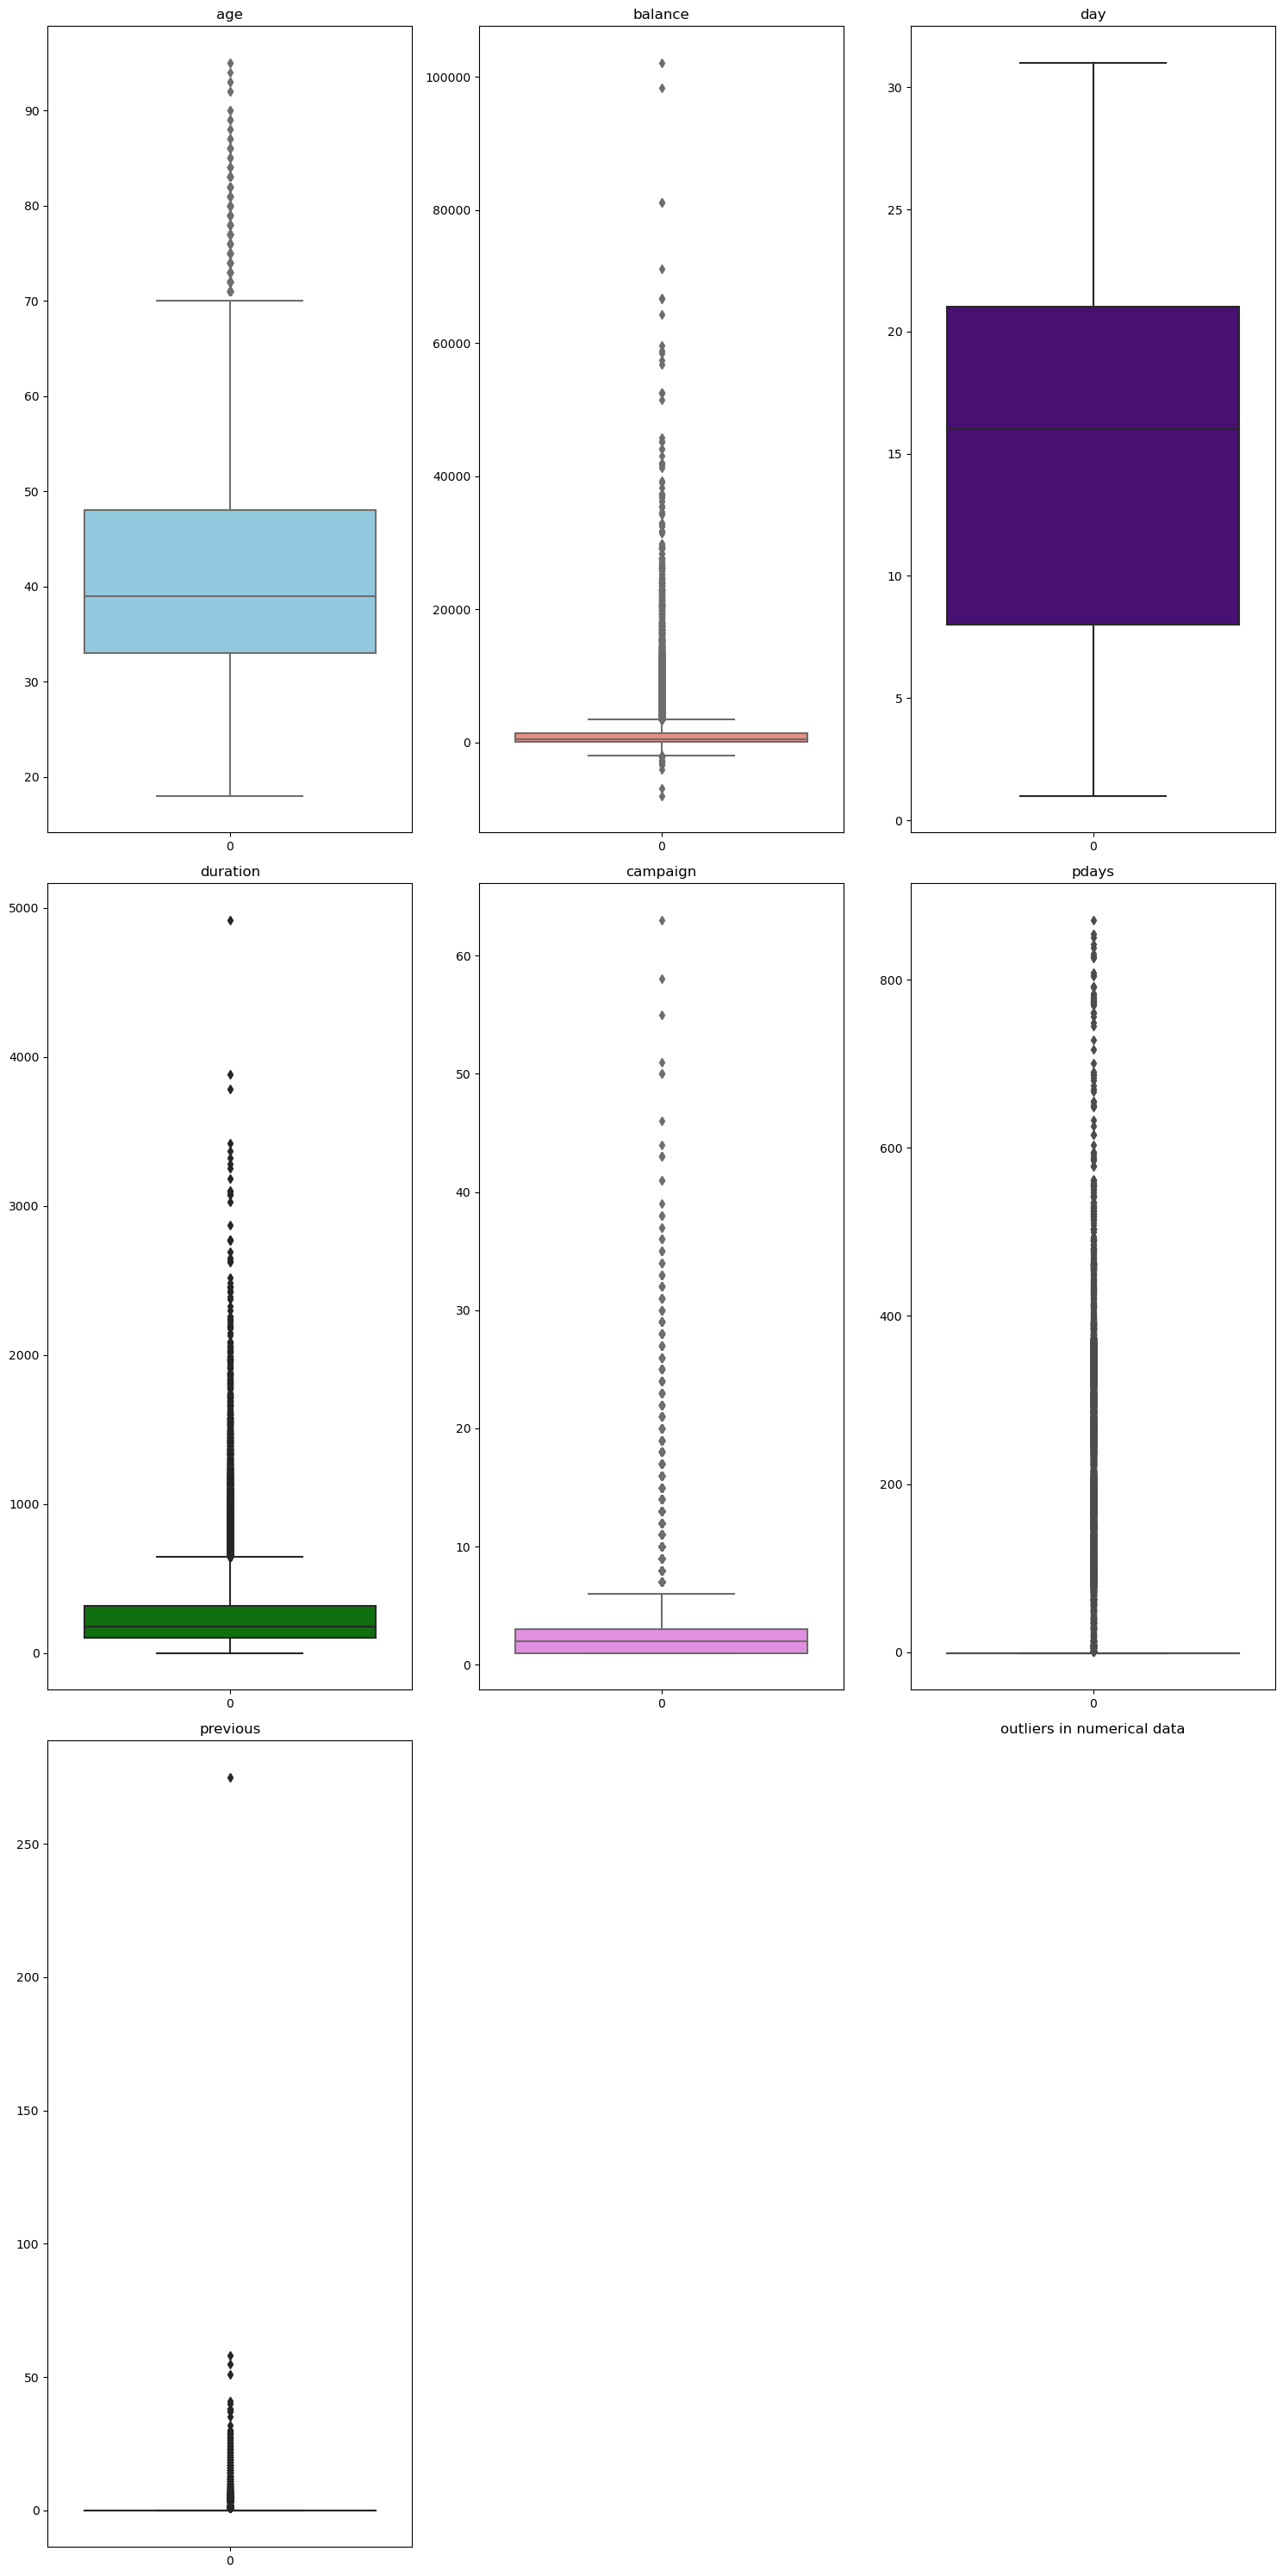

In [37]:
#Checking for outliers in the numerical variables

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,30))
plt.title('outliers in numerical data')

sns.boxplot(df['age'],color='skyblue',ax=axes[0,0])
axes[0,0].set_title('age')

sns.boxplot(df['balance'],color='salmon',ax=axes[0,1])
axes[0,1].set_title('balance')

sns.boxplot(df['day'],color='indigo',ax=axes[0,2])
axes[0,2].set_title('day')

sns.boxplot(df['duration'],color='green',ax=axes[1,0])
axes[1,0].set_title('duration')

sns.boxplot(df['campaign'],color='violet',ax=axes[1,1])
axes[1,1].set_title('campaign')

sns.boxplot(df['pdays'],color='orange',ax=axes[1,2])
axes[1,2].set_title('pdays')

sns.boxplot(df["previous"],color='green', ax=axes[2,0])
axes[2,0].set_title("previous")

axes[2,1].axis('off')
axes[2,2].axis('off')

plt.tight_layout()
plt.show()


In [38]:
#Finding the correlation between numerical variables

df.select_dtypes("number").corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

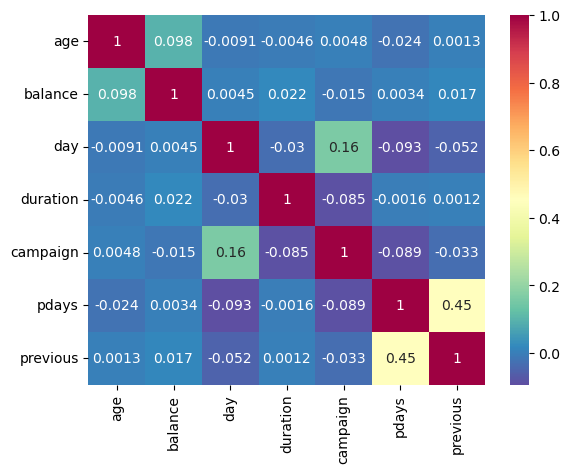

In [39]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Spectral_r');

#### 4.2 Univariate Analysis 

Numerical

[Back to Table of Contents](#--Table-of-Contents)

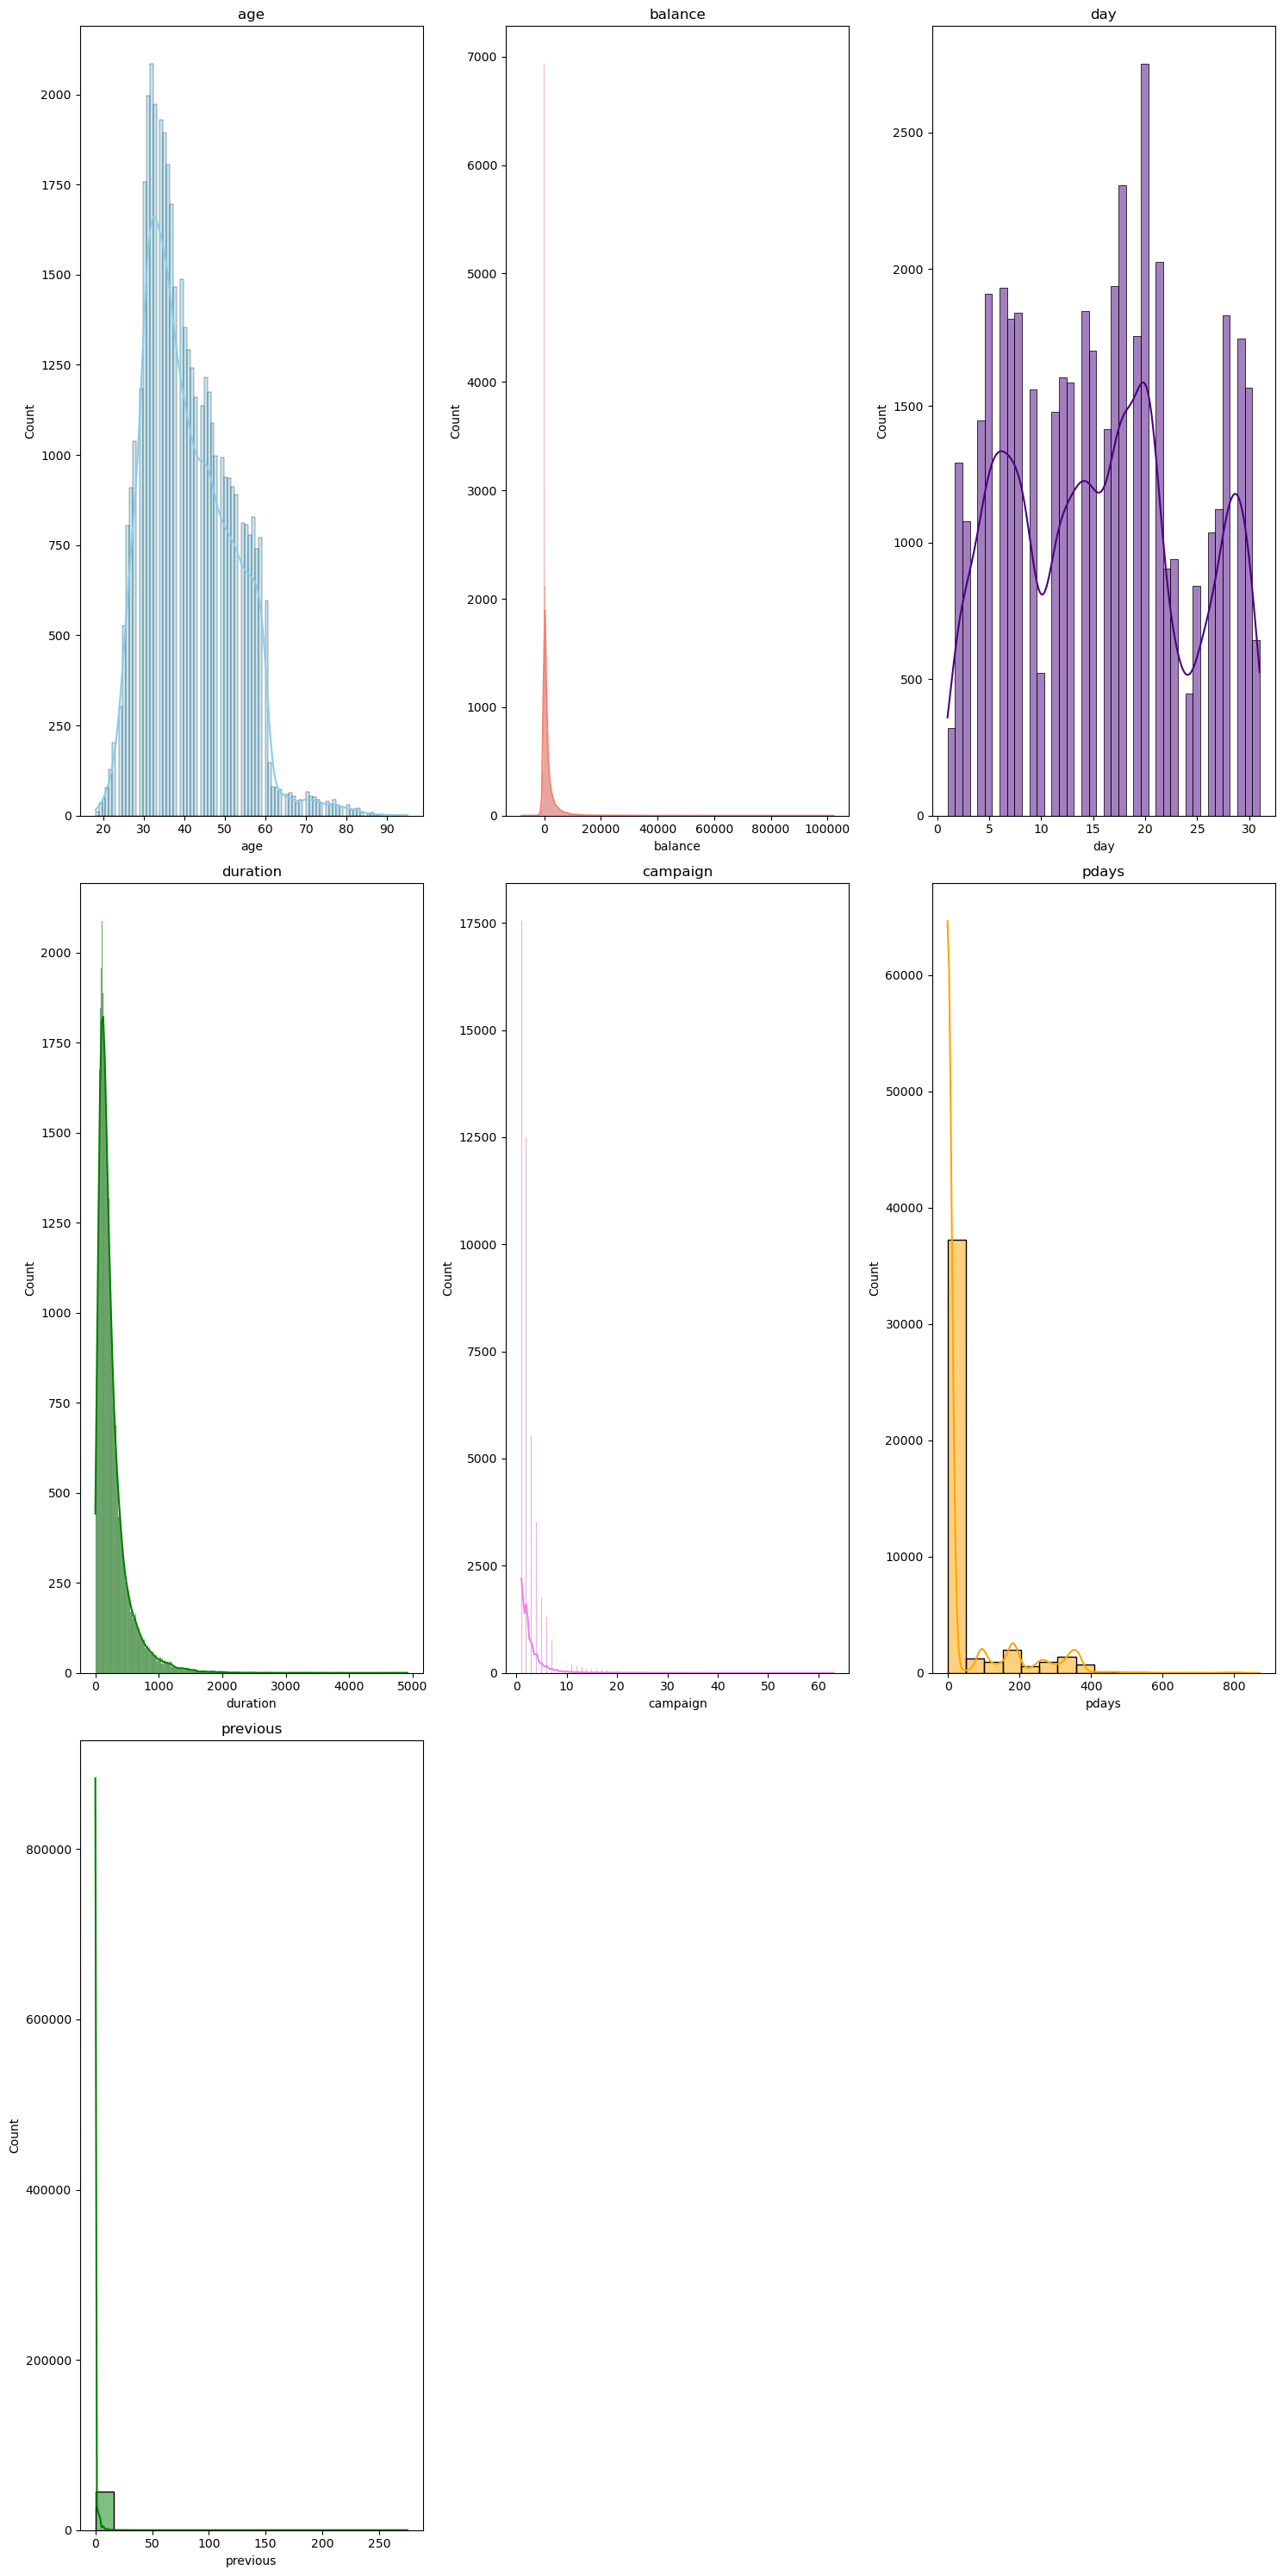

In [40]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(15,30))

sns.histplot(df['age'],kde=True, color='skyblue',ax=axes[0,0])
axes[0,0].set_title('age')

sns.histplot(df['balance'],kde=True, color='salmon',ax=axes[0,1])
axes[0,1].set_title('balance')

sns.histplot(df['day'],kde=True,color='indigo',ax=axes[0,2])
axes[0,2].set_title('day')

sns.histplot(df['duration'],kde=True,color='green',ax=axes[1,0])
axes[1,0].set_title('duration')

sns.histplot(df['campaign'],kde=True,color='violet',ax=axes[1,1])
axes[1,1].set_title('campaign')

sns.histplot(df['pdays'],kde=True,color='orange',ax=axes[1,2])
axes[1,2].set_title('pdays')

sns.histplot(df["previous"],kde=True,color='green', ax=axes[2,0])
axes[2,0].set_title("previous")

axes[2,1].axis('off')
axes[2,2].axis('off')

plt.tight_layout()
plt.show()



#### Categorical

[Back to Table of Contents](#--Table-of-Contents)

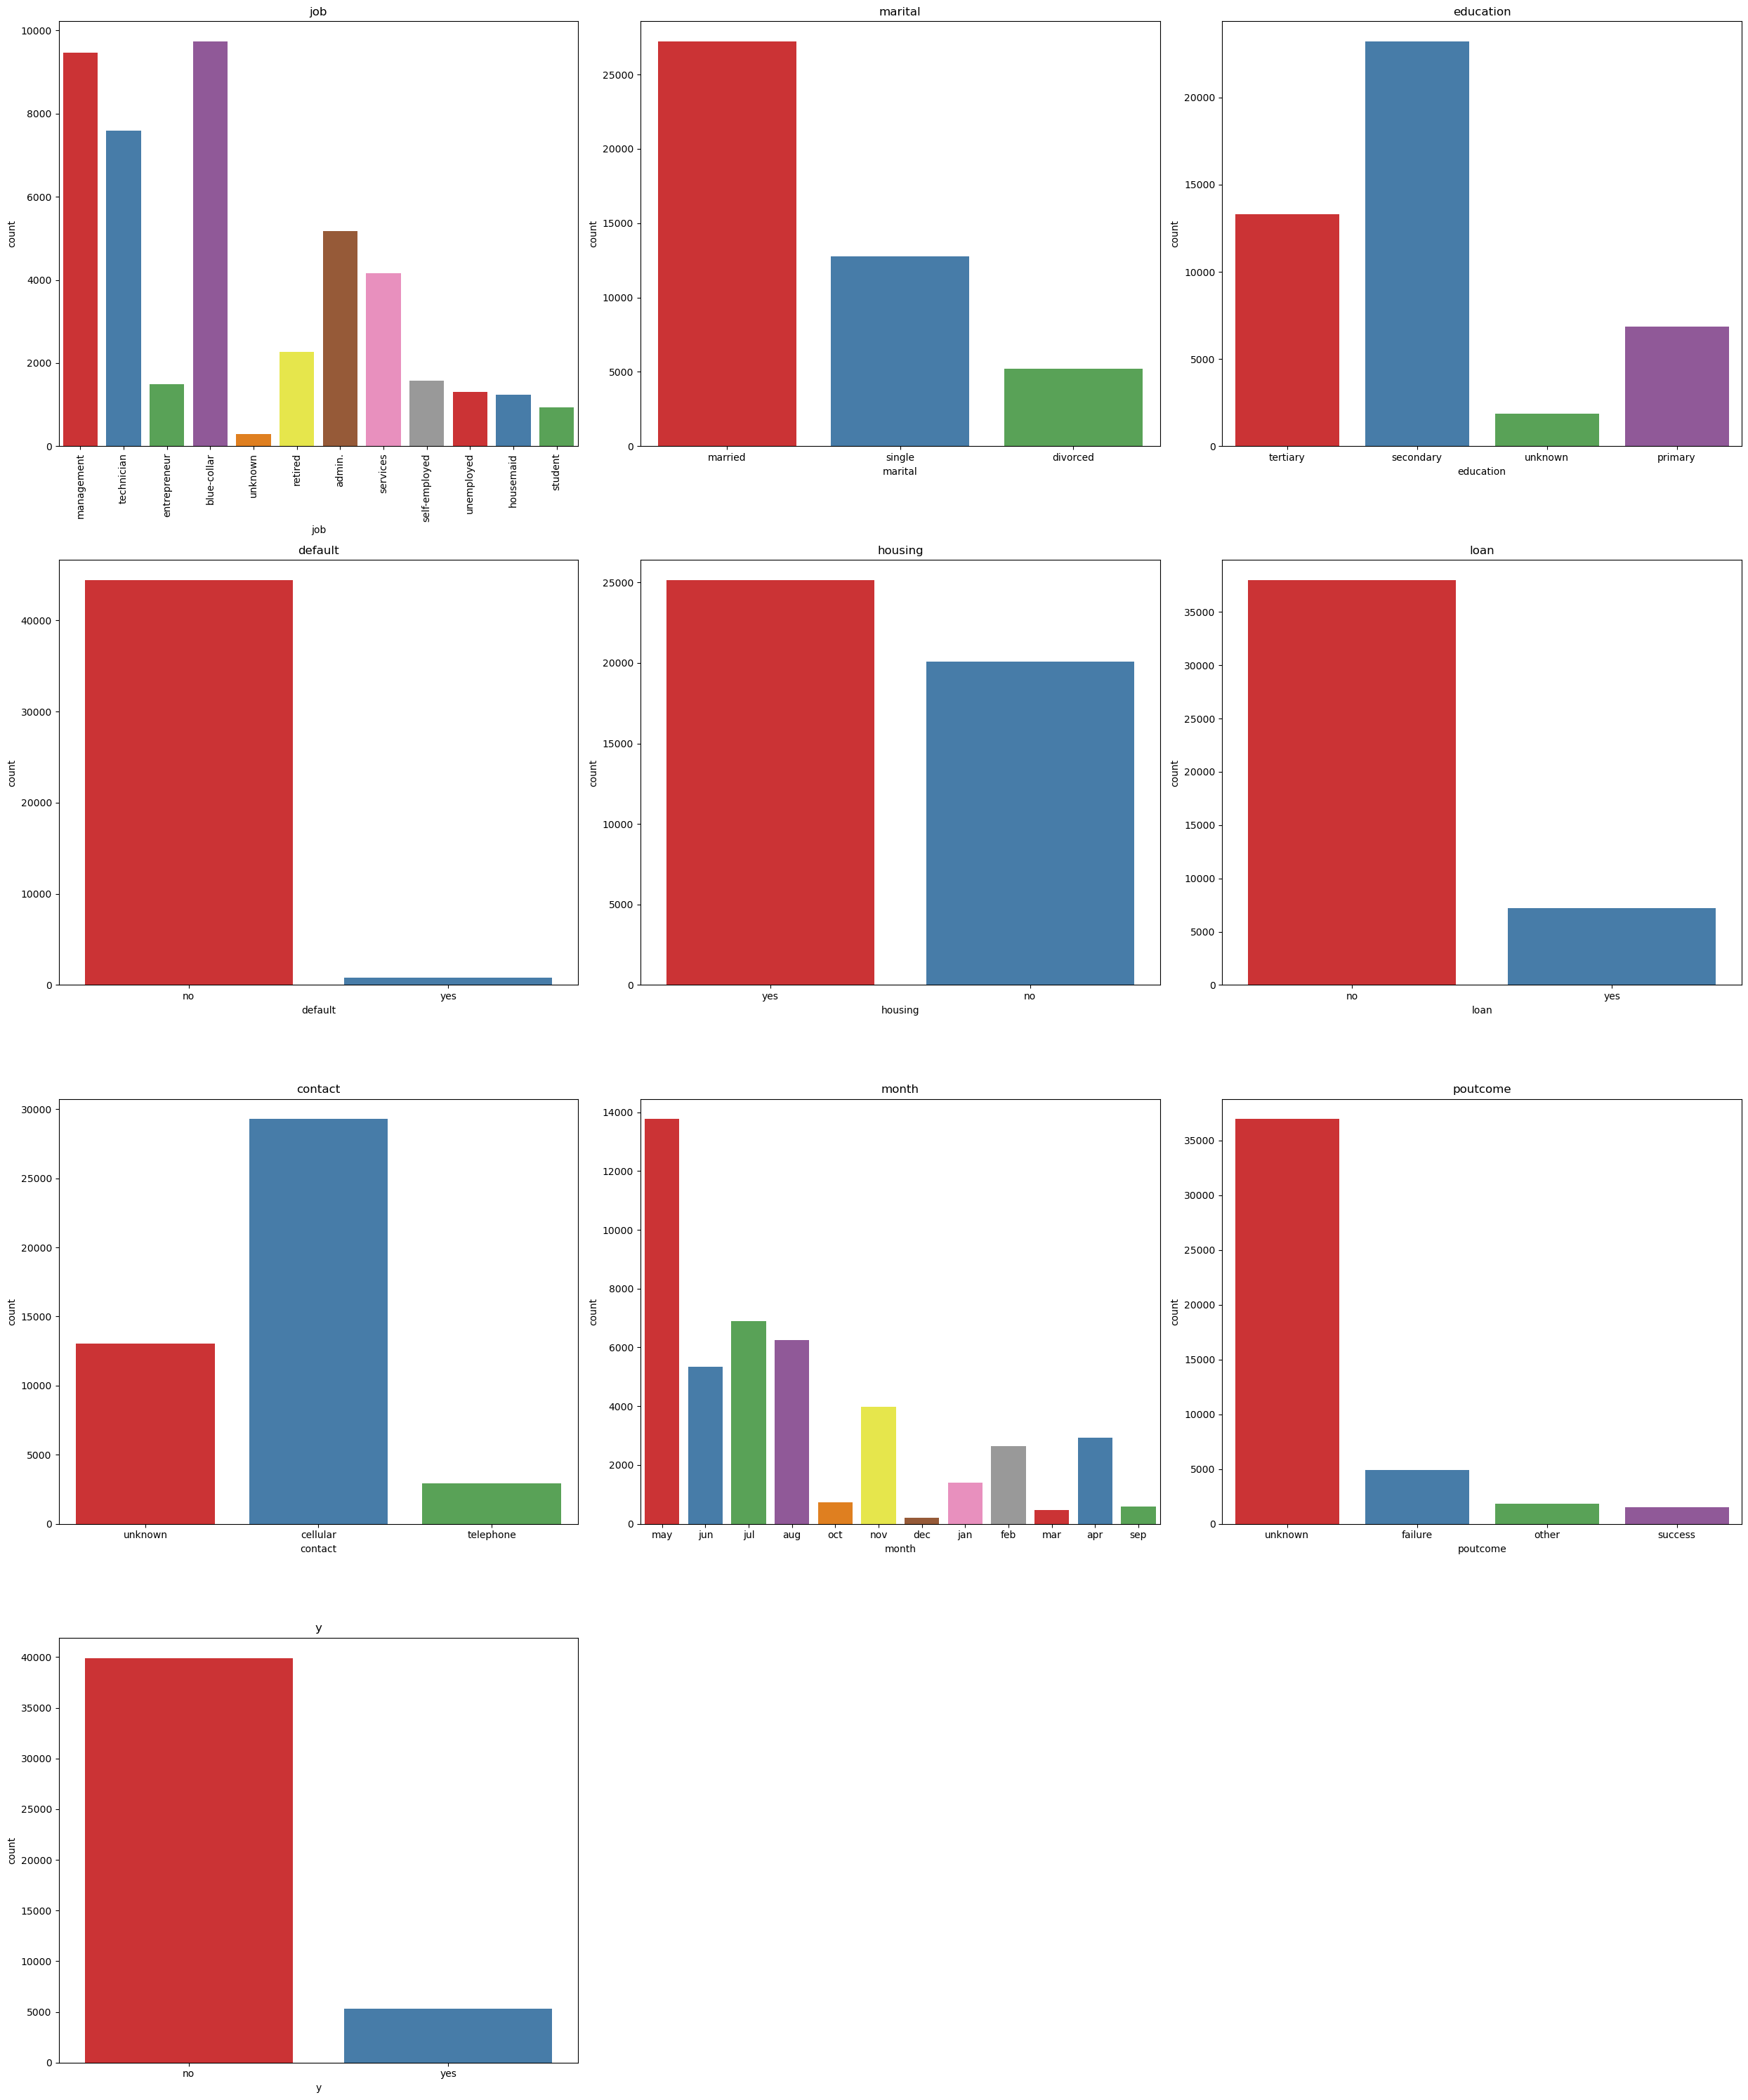

In [41]:
fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(25,30))

sns.countplot(x="job" , data =df, palette='Set1',ax=axes[0,0])
axes[0,0].set_title('job')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)


sns.countplot(x="marital",data=df,palette='Set1',ax=axes[0,1])
axes[0,1].set_title('marital')

sns.countplot(x="education",data=df,palette='Set1',ax=axes[0,2])
axes[0,2].set_title('education')

sns.countplot(x="default",data=df,palette='Set1',ax=axes[1,0])
axes[1,0].set_title('default')

sns.countplot(x='housing',data=df,palette='Set1',ax=axes[1,1])
axes[1,1].set_title('housing')

sns.countplot(x="loan",data=df,palette='Set1',ax=axes[1,2])
axes[1,2].set_title('loan')

sns.countplot(x="contact",data=df,palette='Set1', ax=axes[2,0])
axes[2,0].set_title("contact")

sns.countplot(x="month",data=df,palette='Set1', ax=axes[2,1])
axes[2,1].set_title("month")


sns.countplot(x="poutcome",data=df,palette='Set1', ax=axes[2,2])
axes[2,2].set_title("poutcome")

sns.countplot(x="y",data=df,palette='Set1', ax=axes[3,0])
axes[3,0].set_title("y")


axes[3,1].axis('off')
axes[3,2].axis('off')

plt.tight_layout()
plt.show()


#### 4.3 Bivariate Analysis 

[Back to Table of Contents](#--Table-of-Contents)


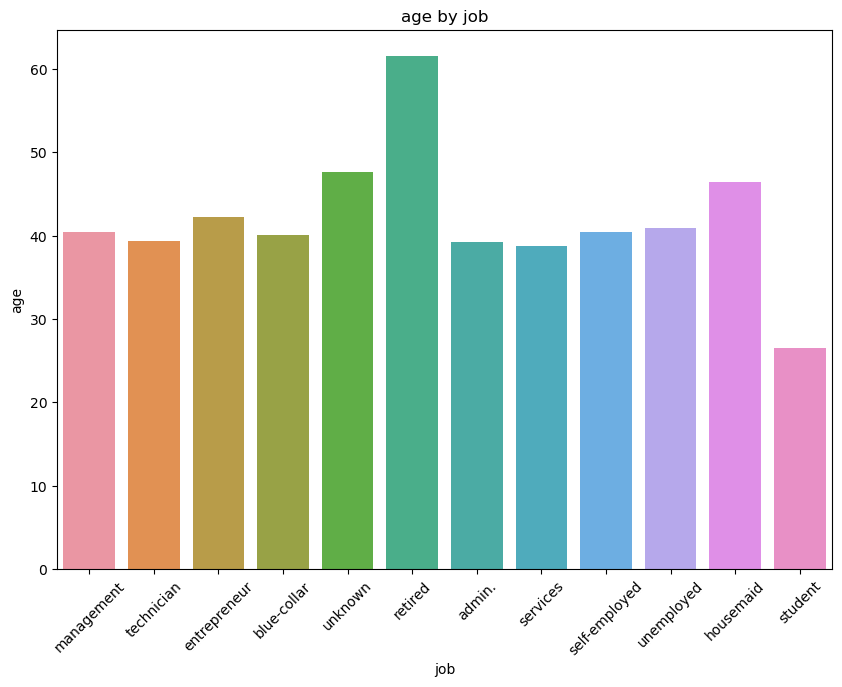

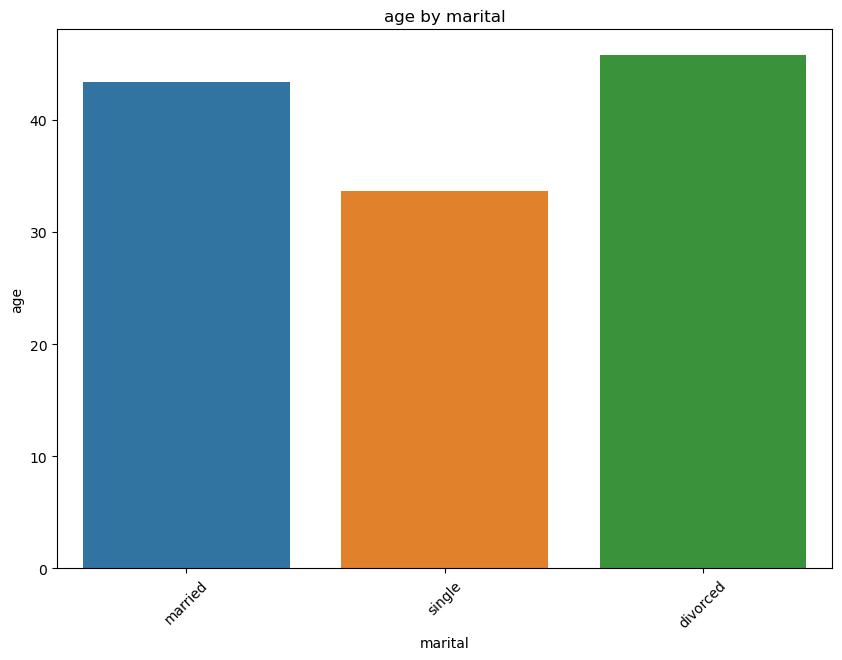

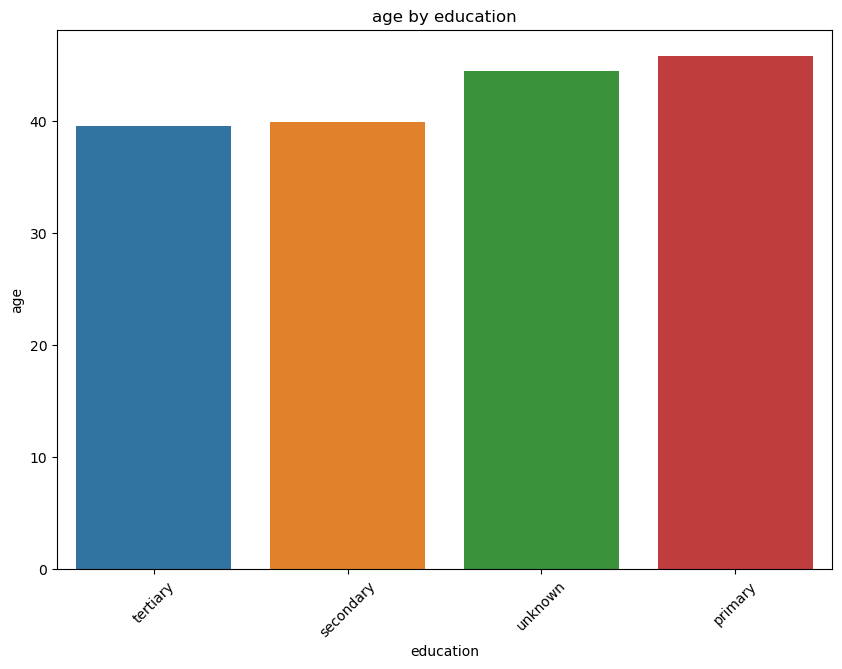

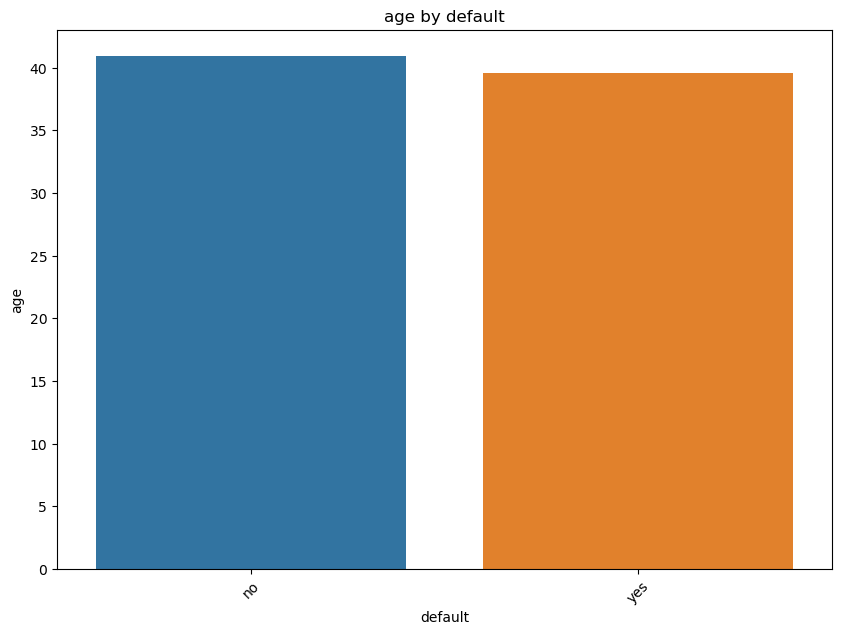

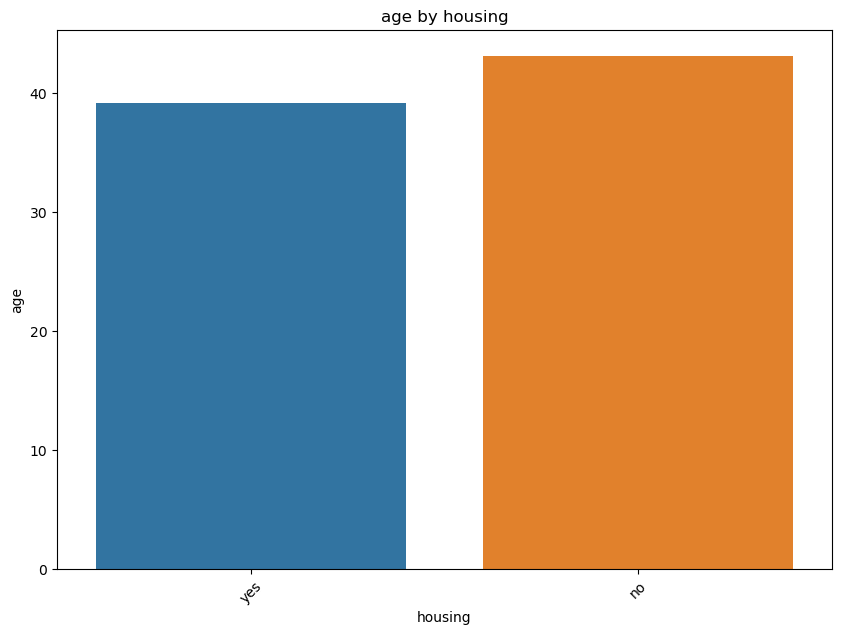

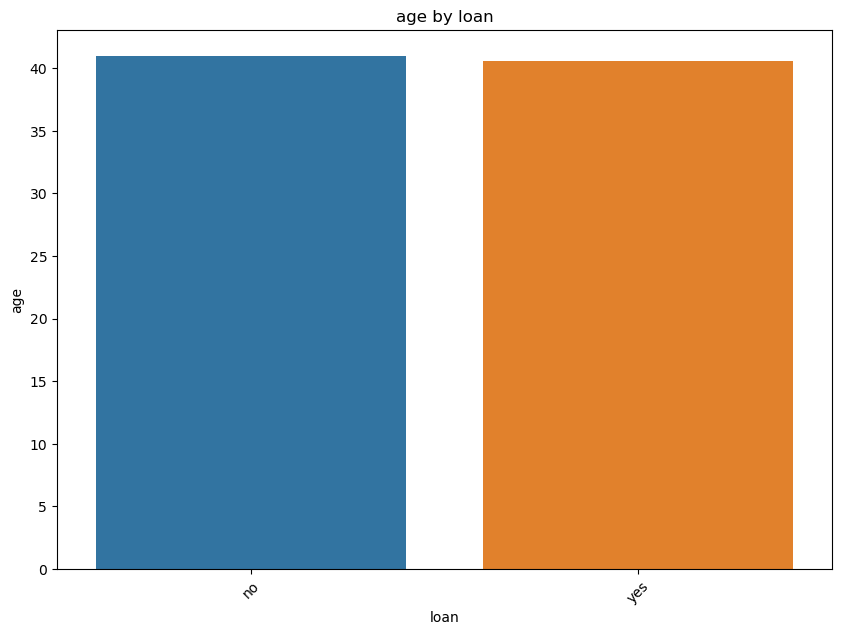

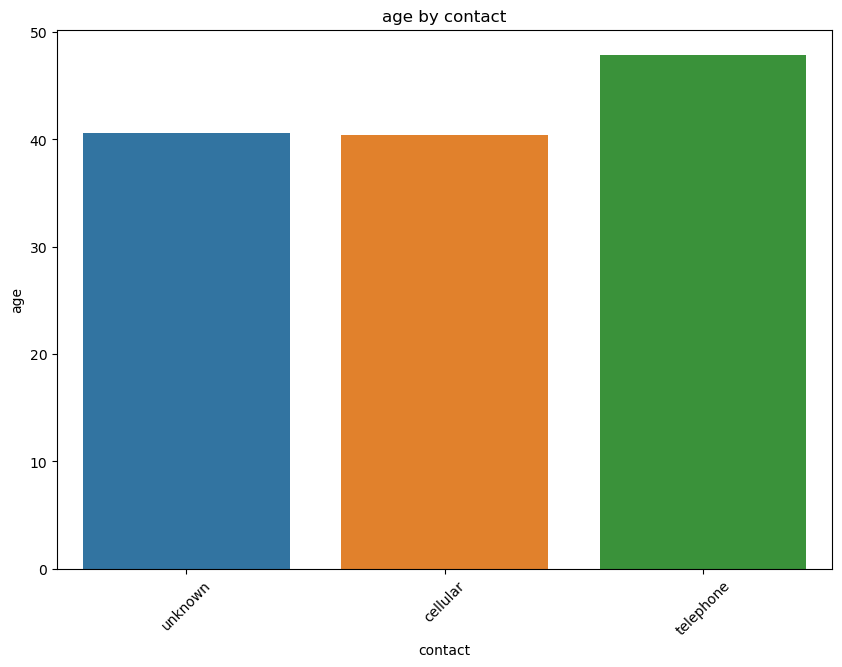

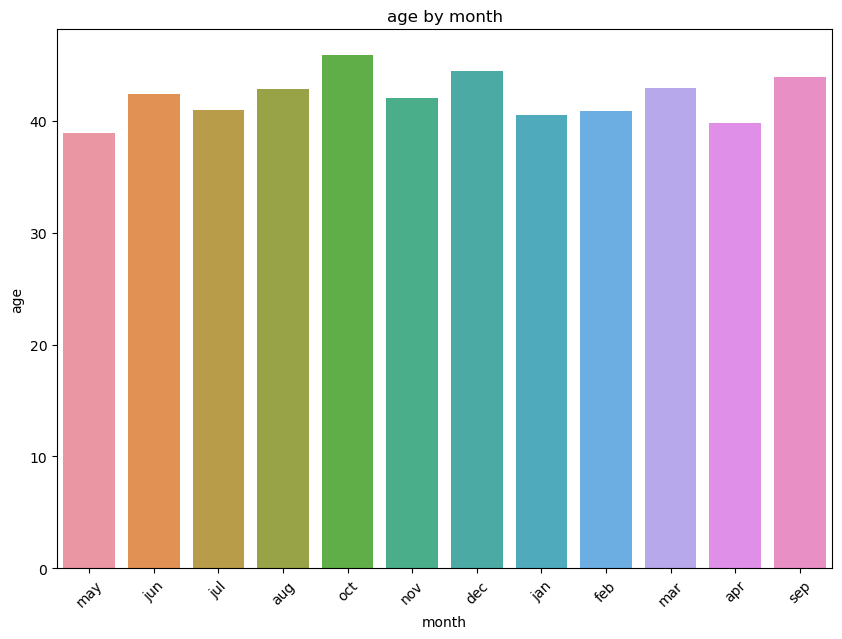

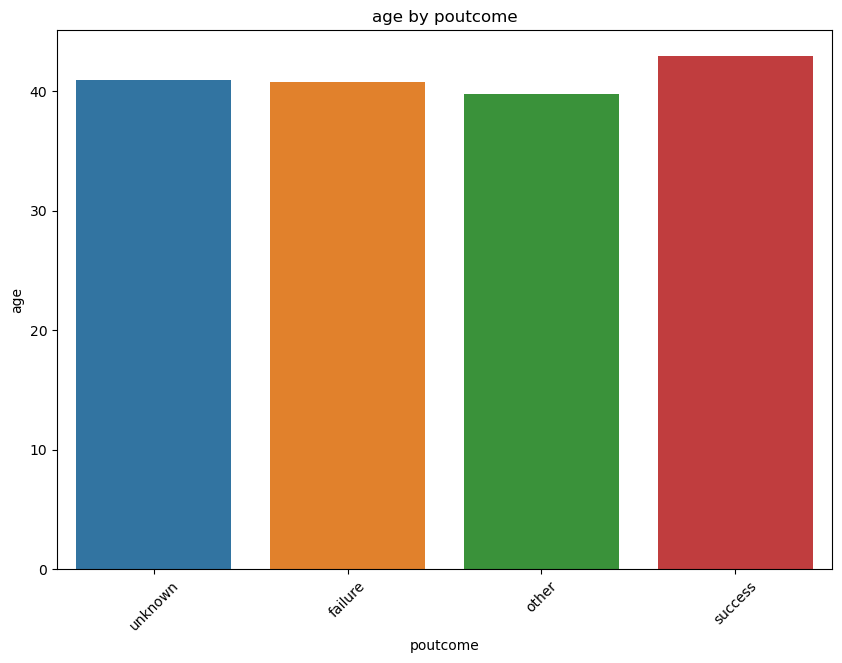

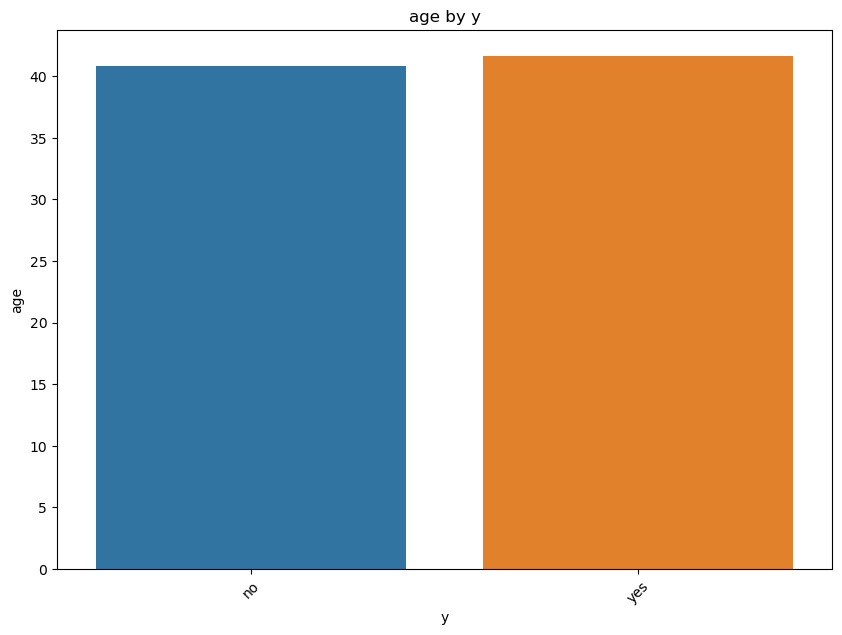

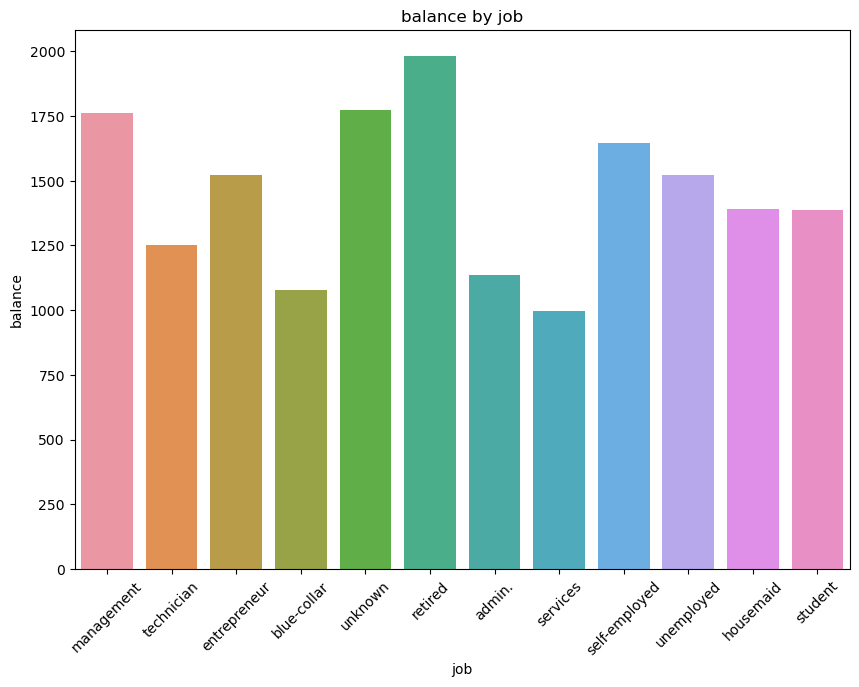

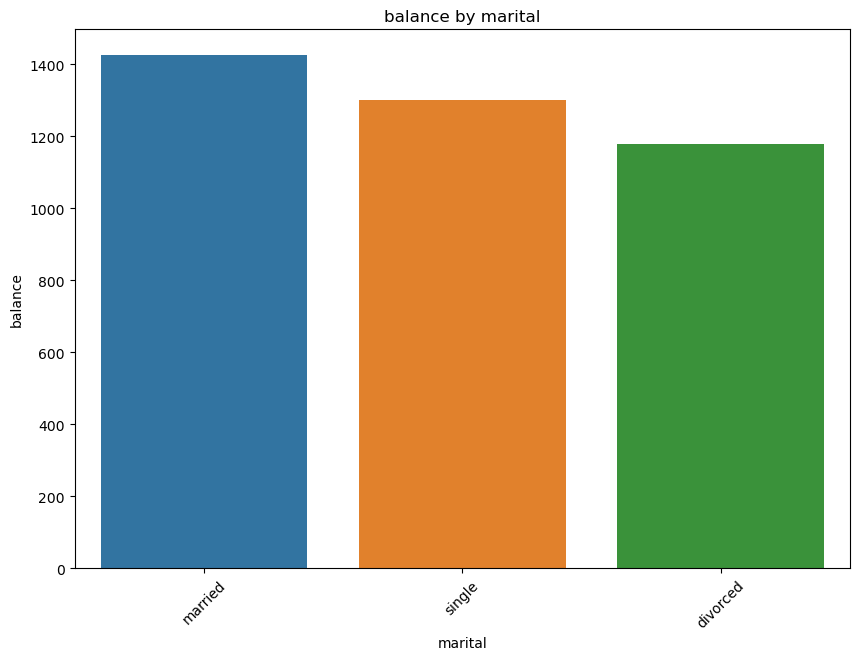

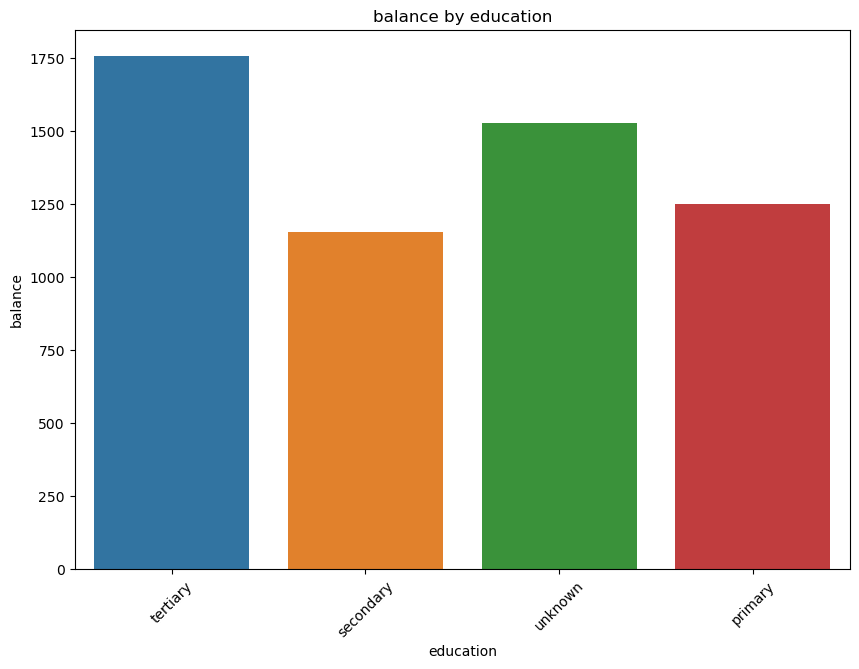

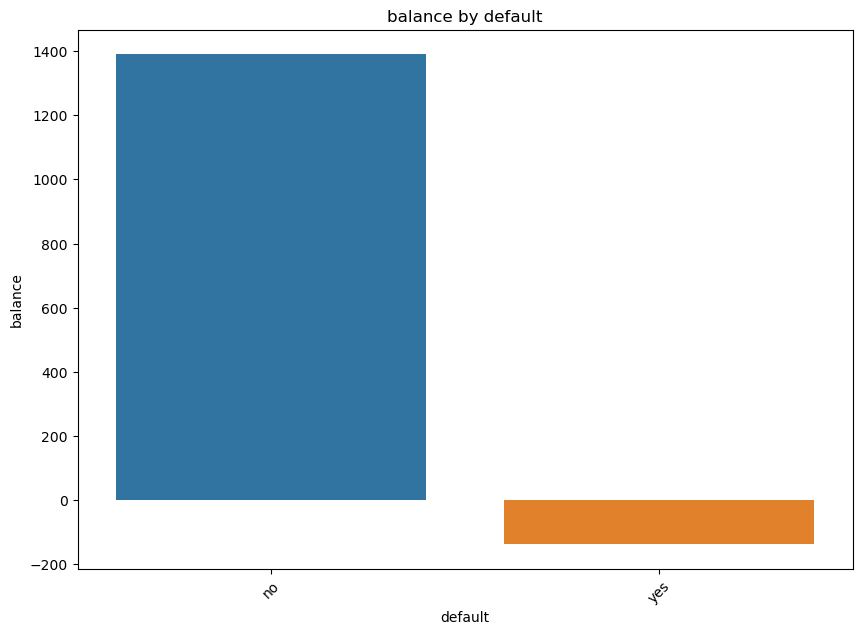

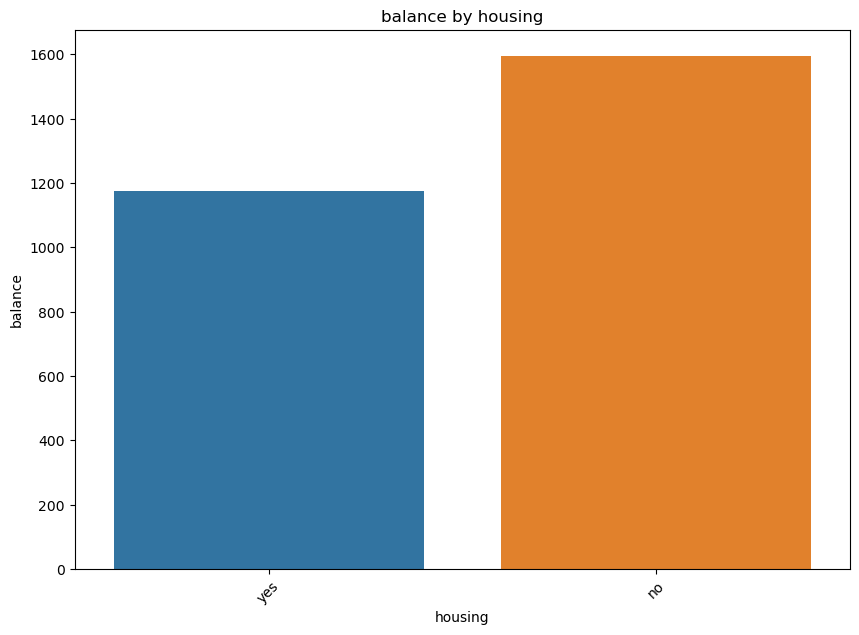

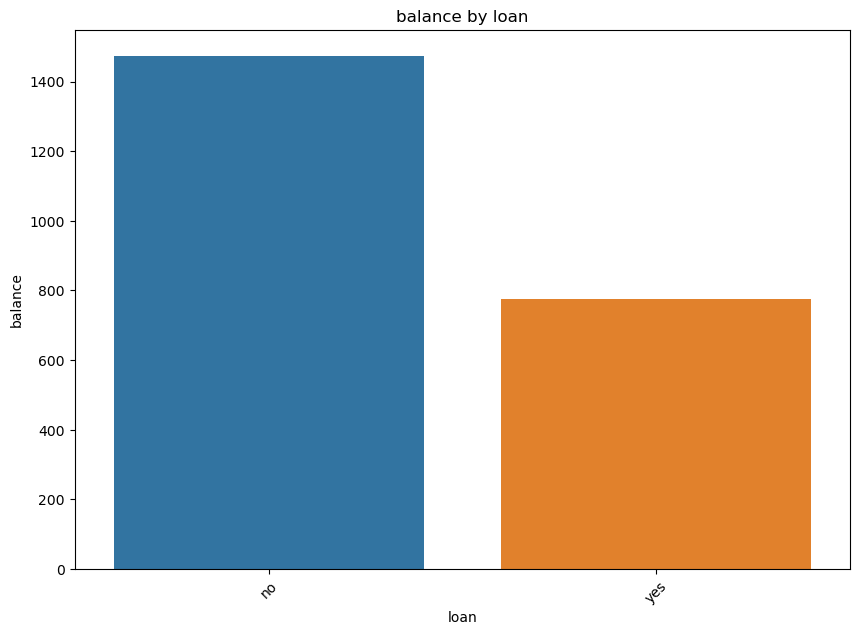

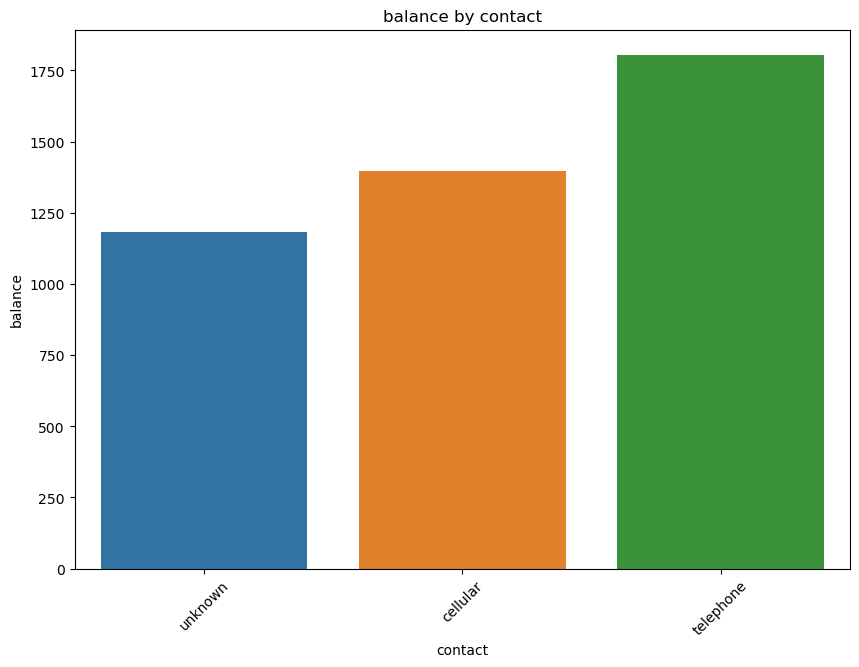

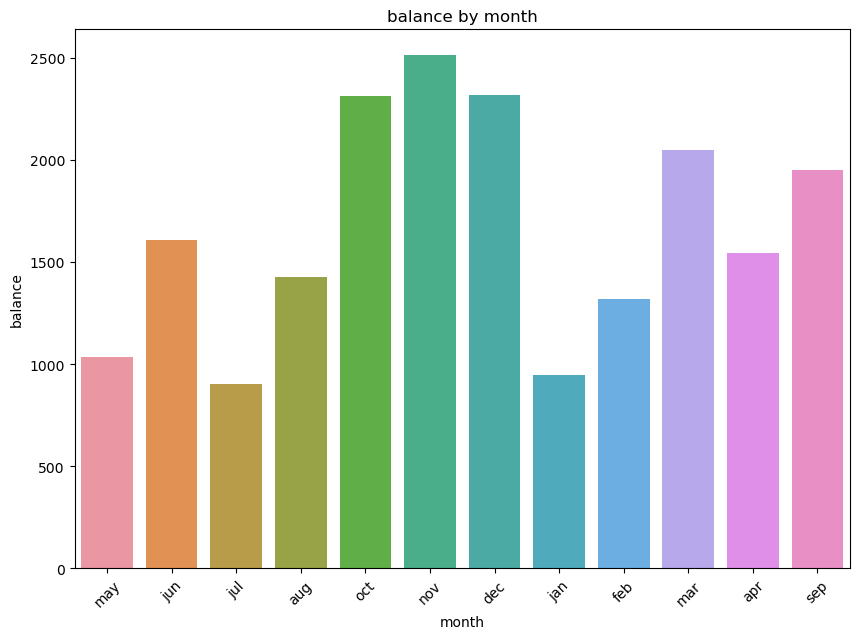

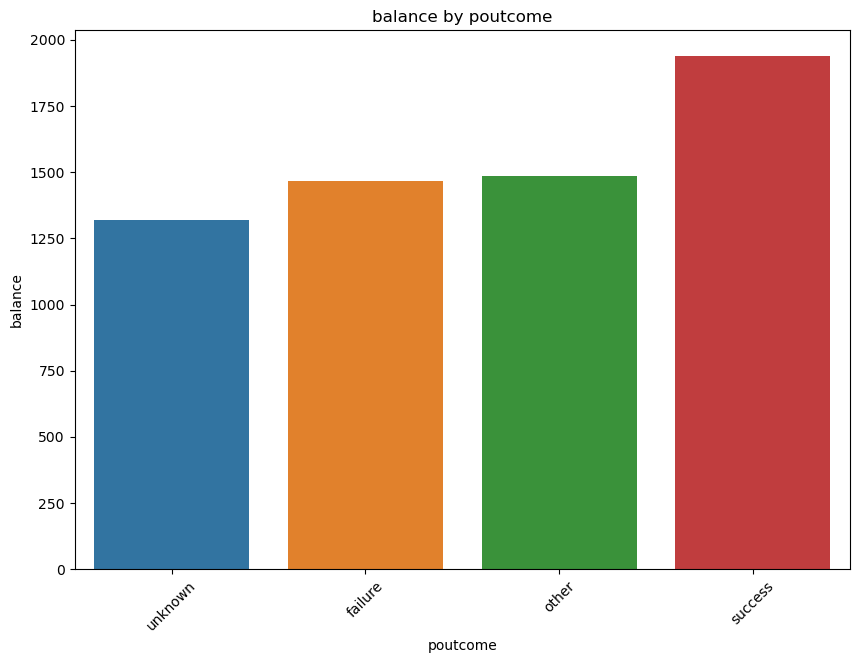

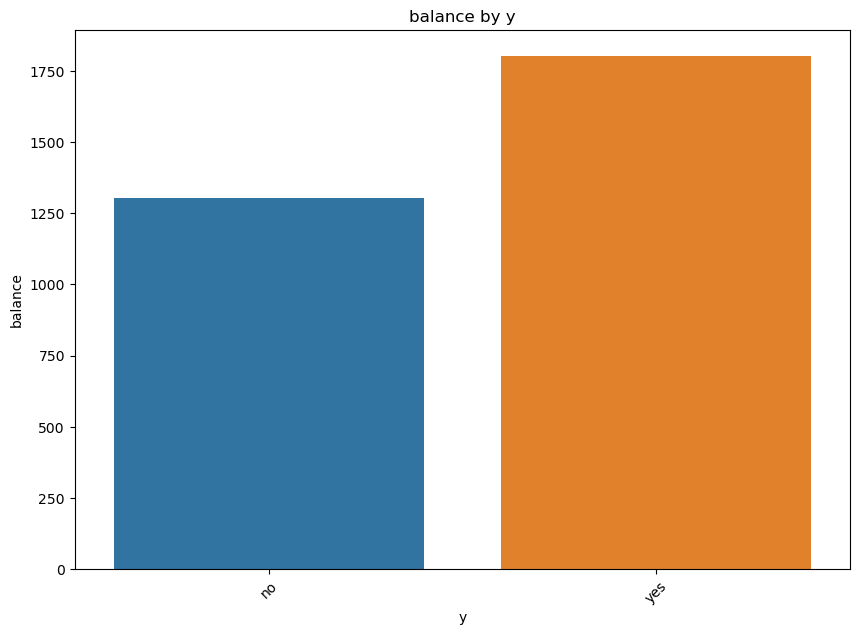

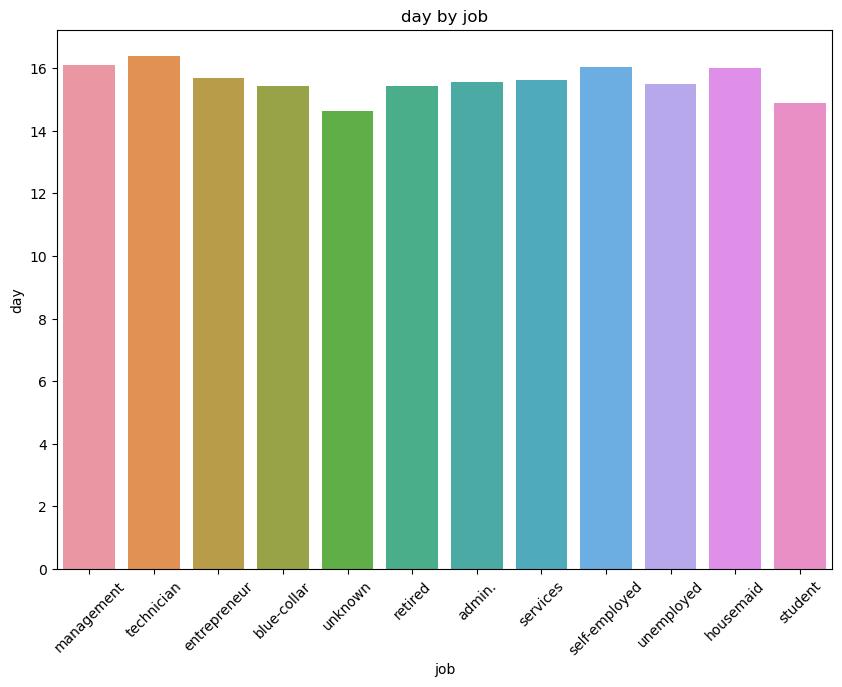

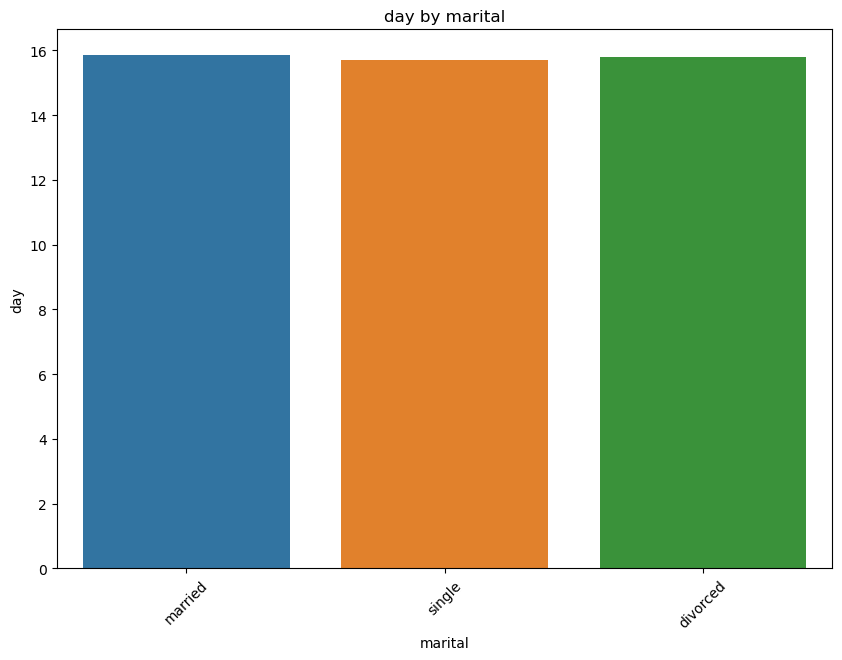

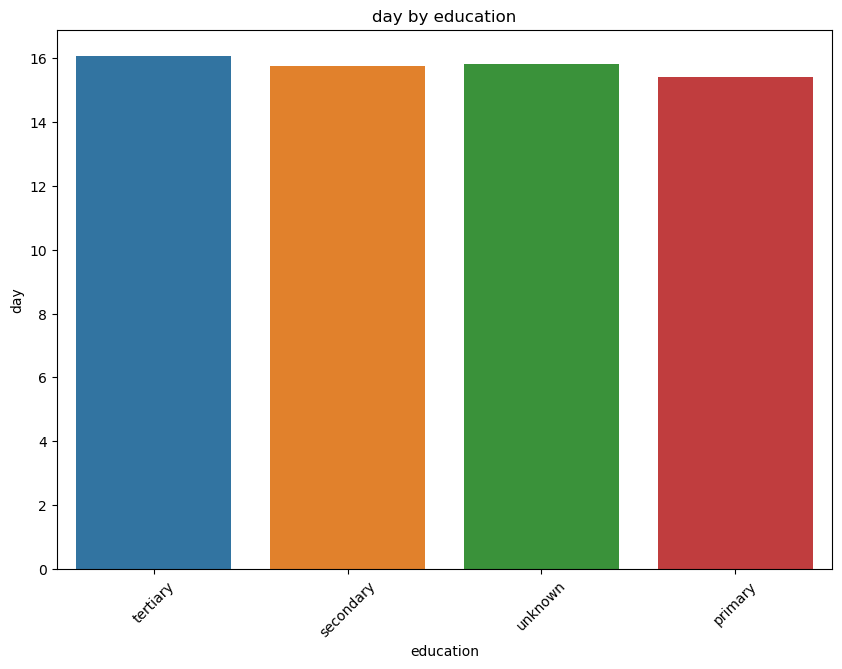

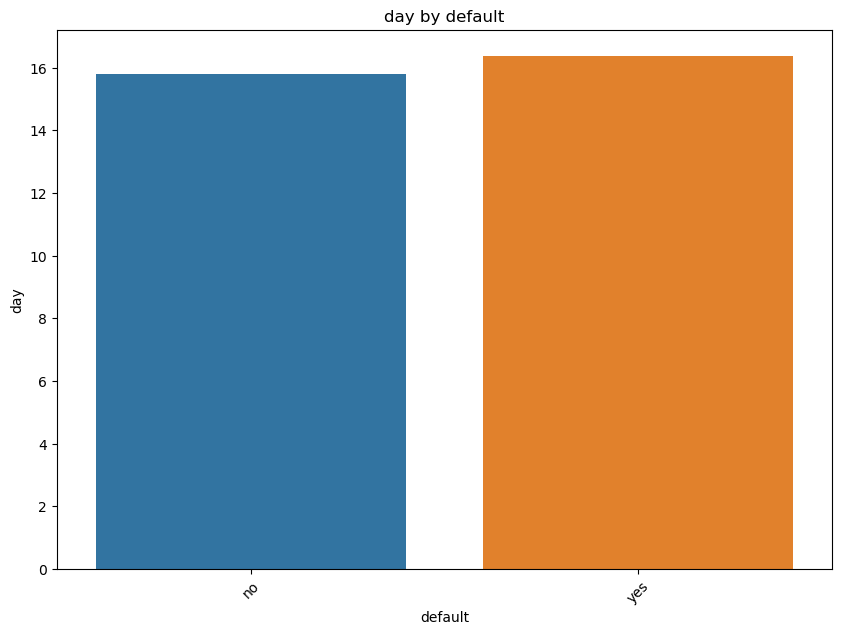

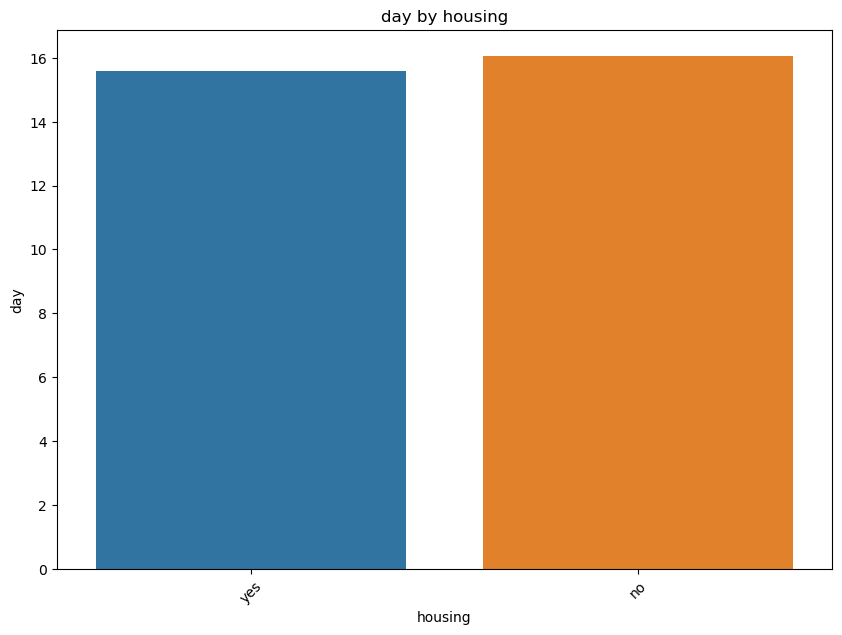

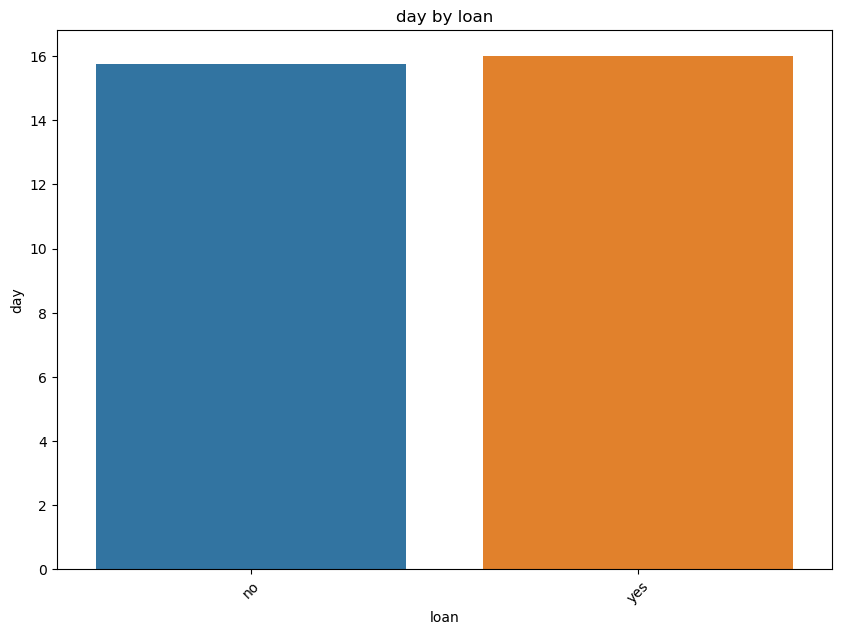

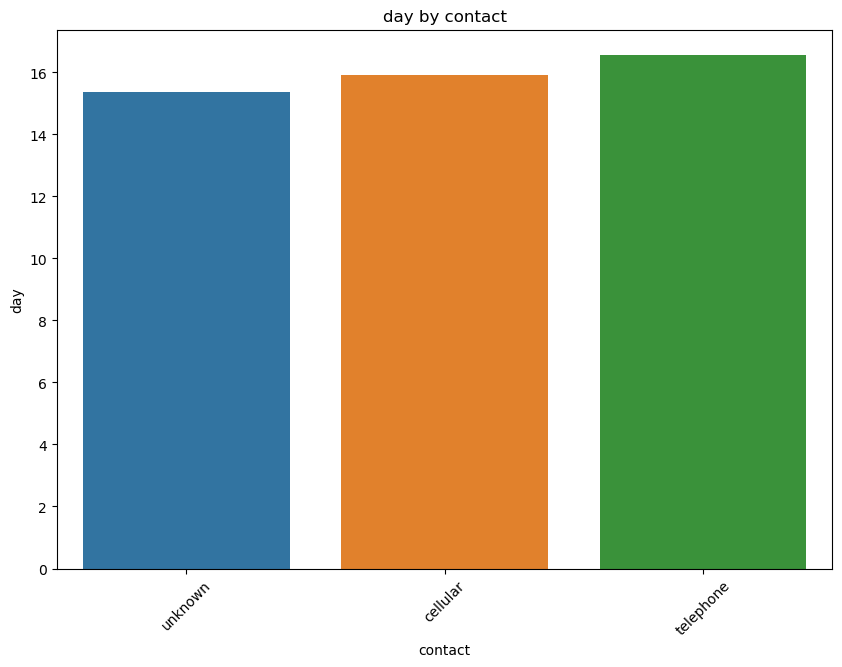

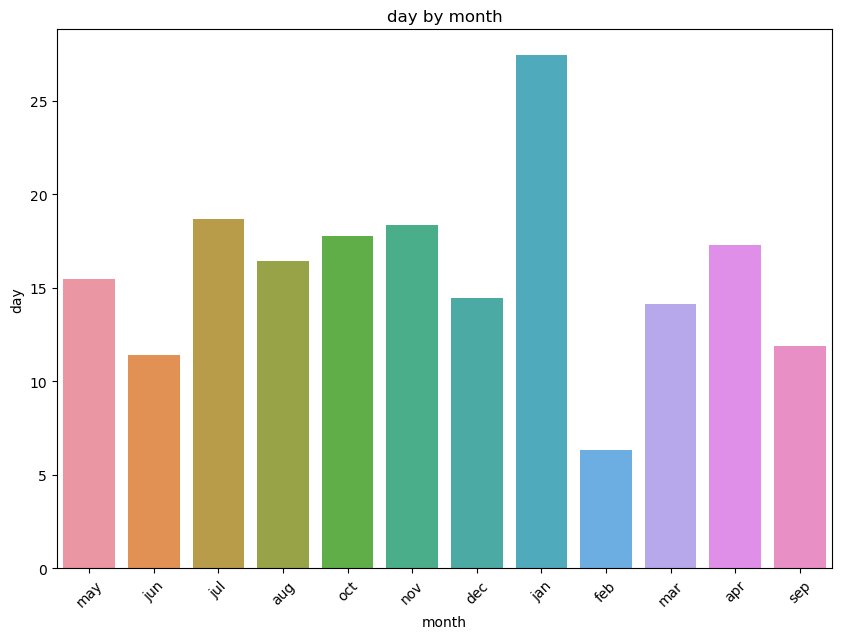

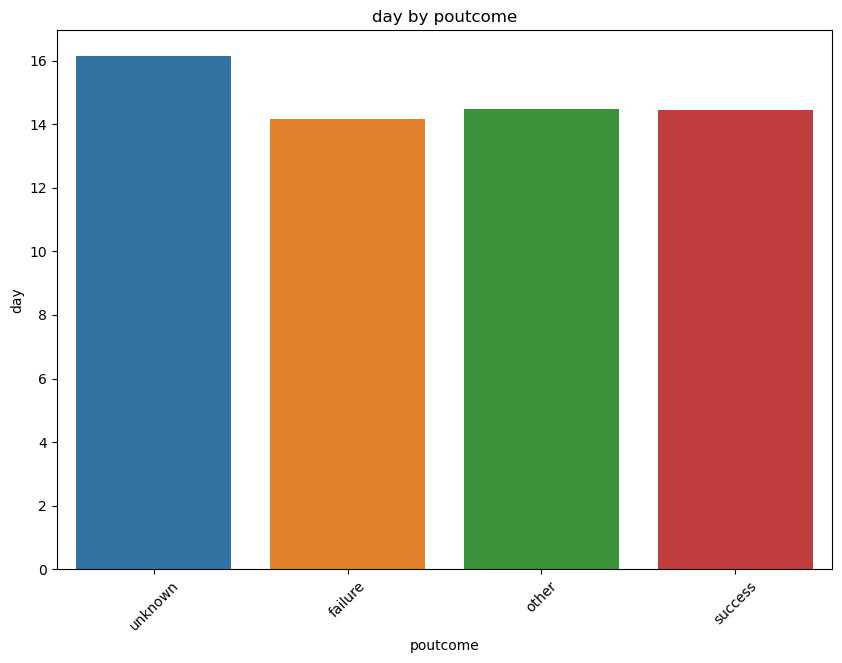

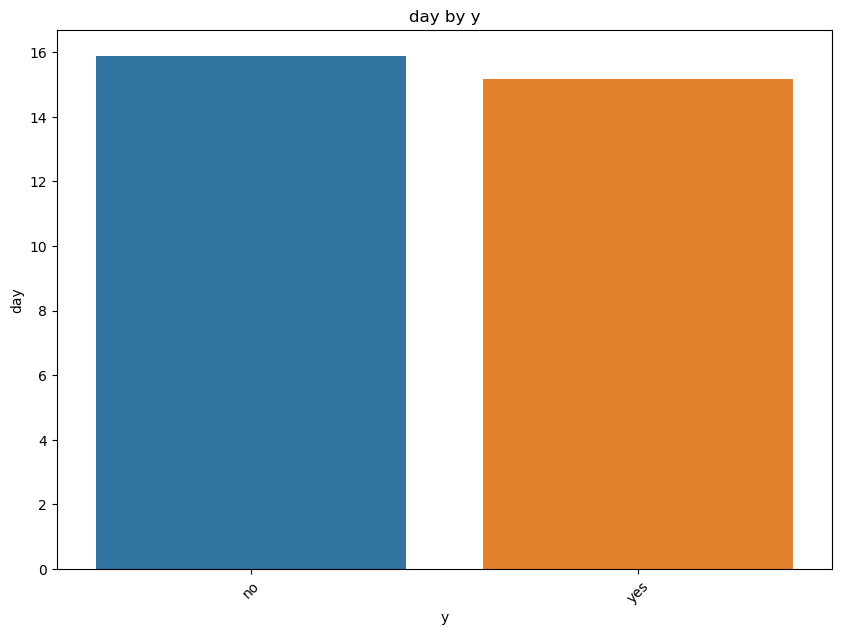

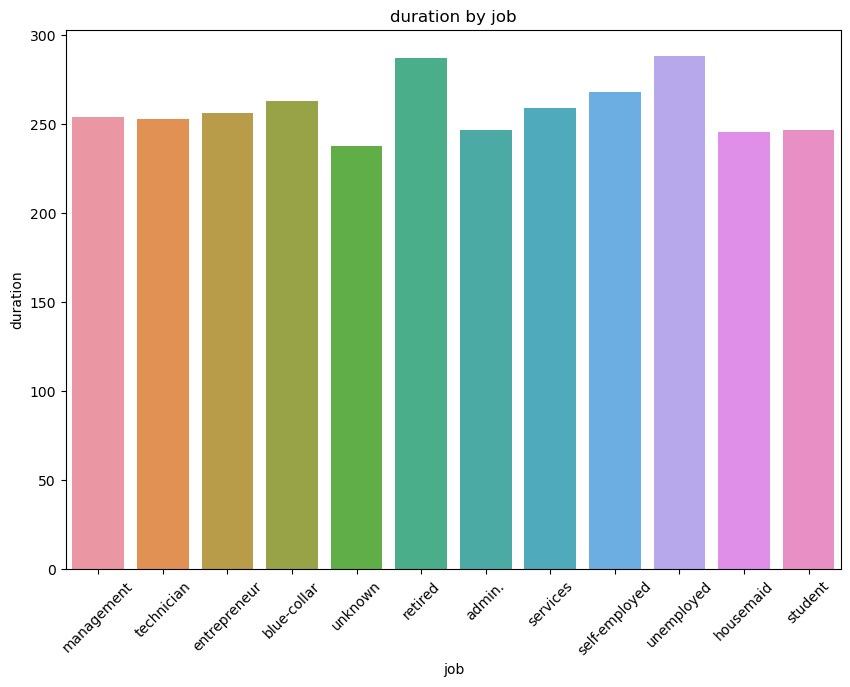

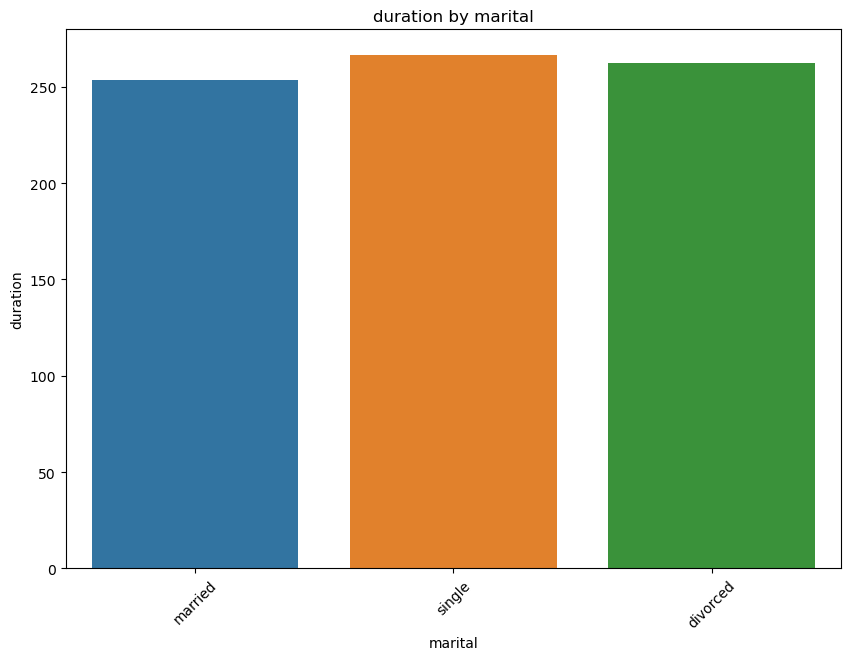

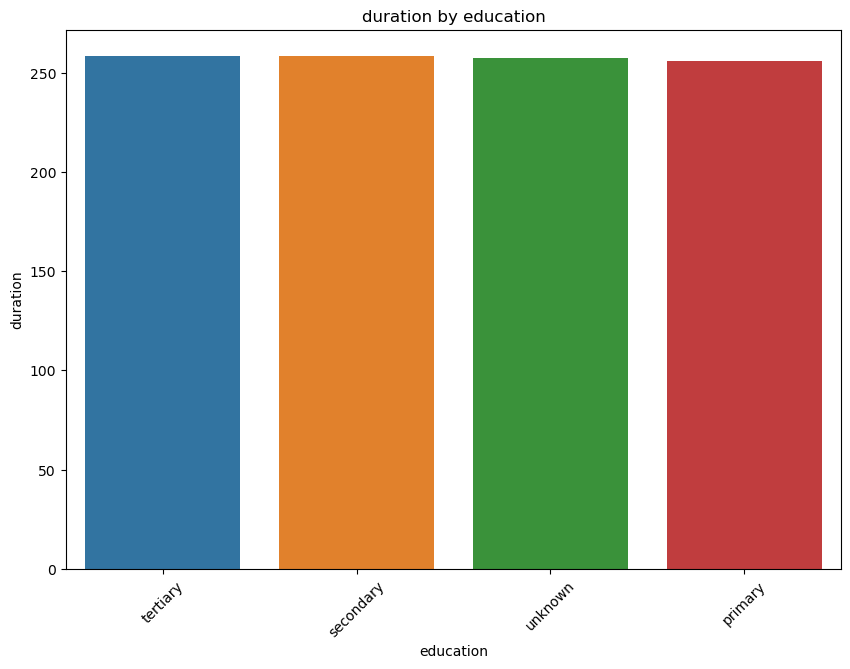

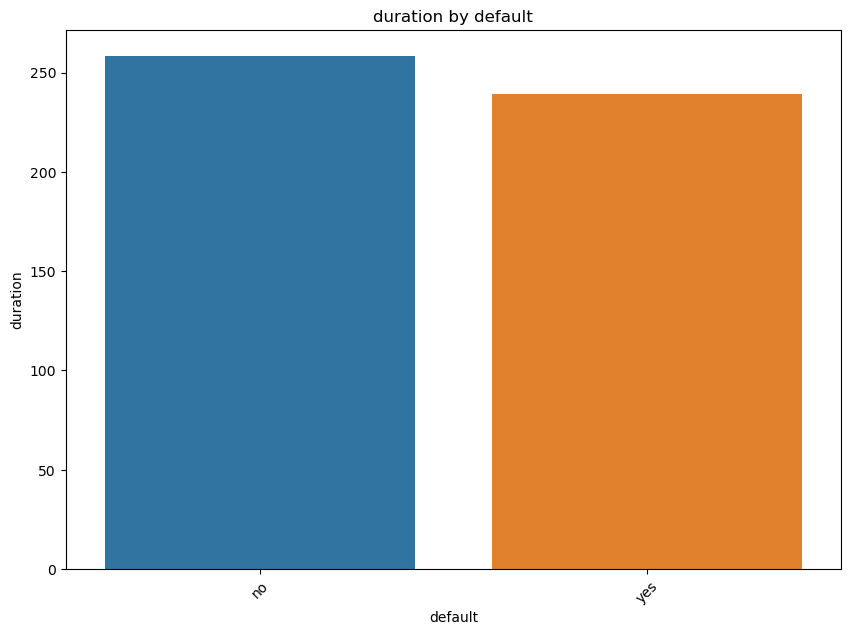

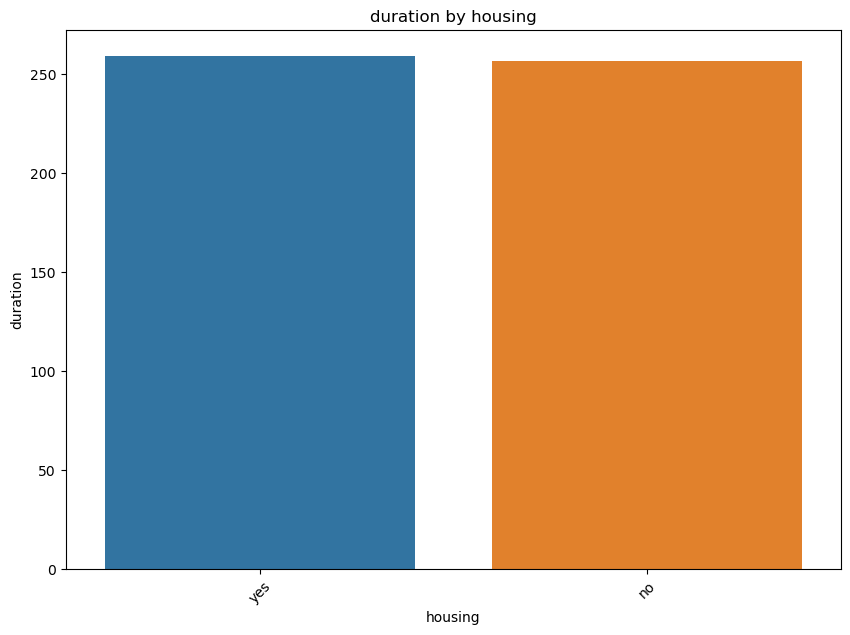

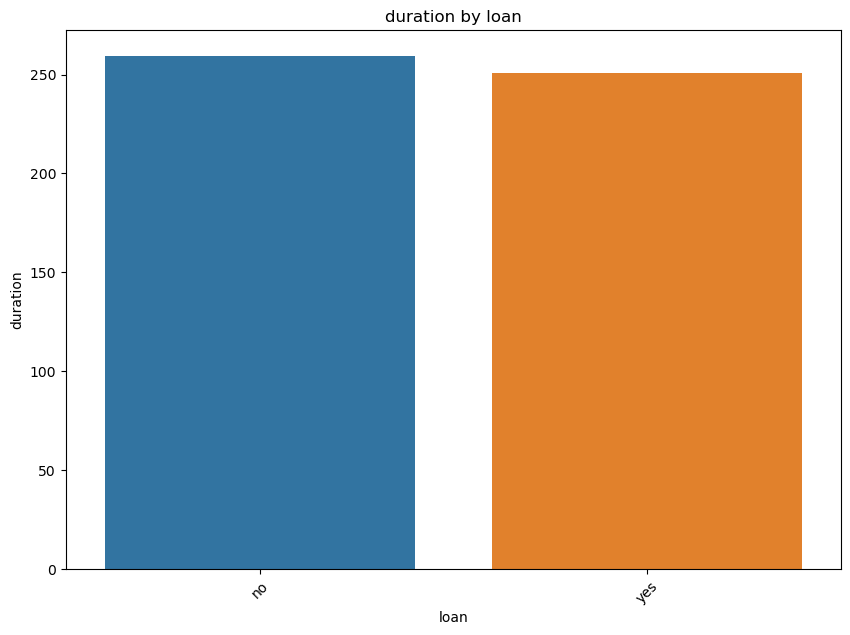

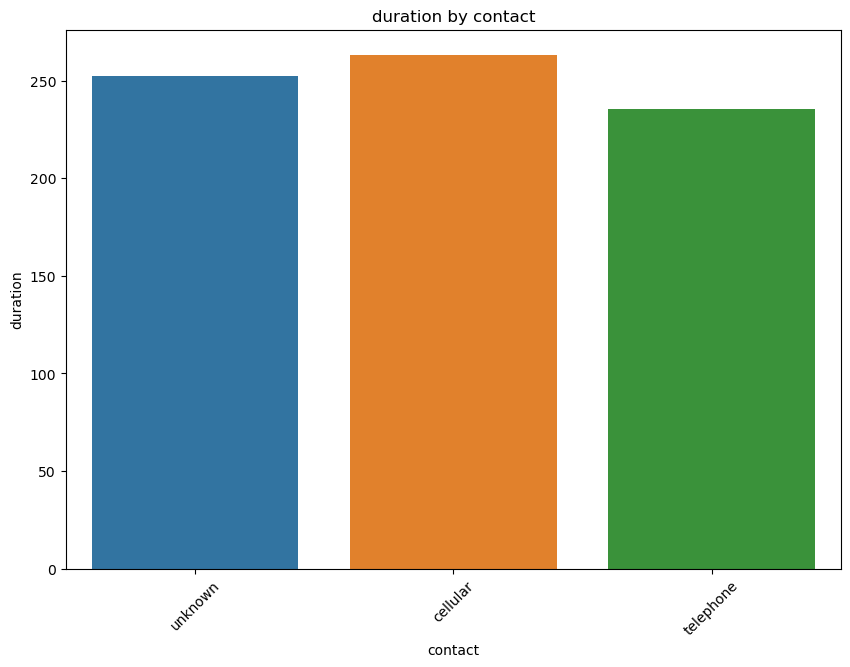

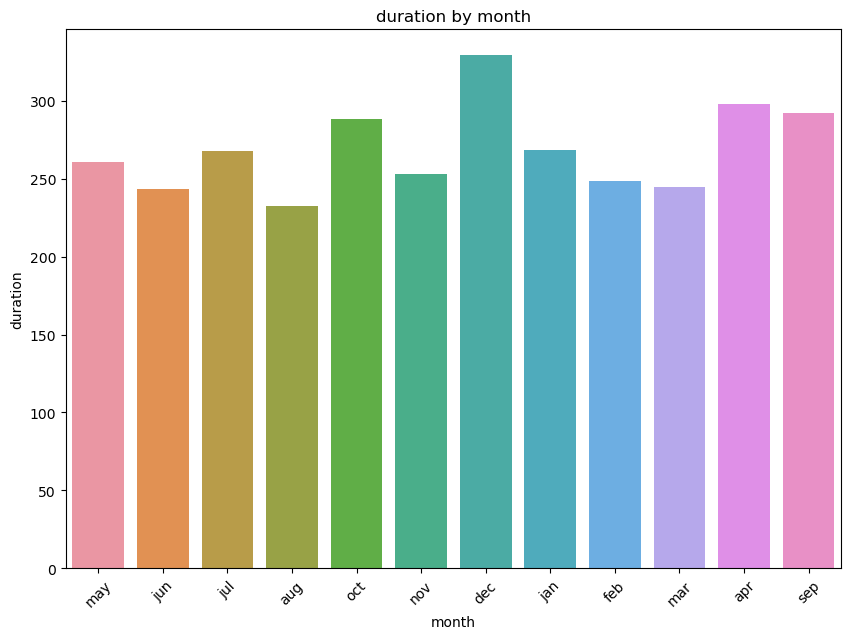

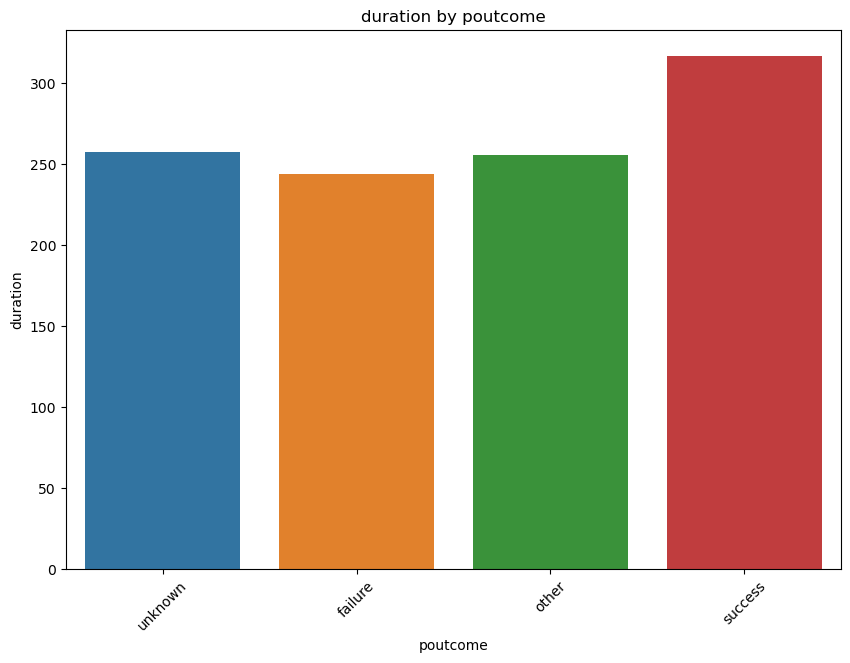

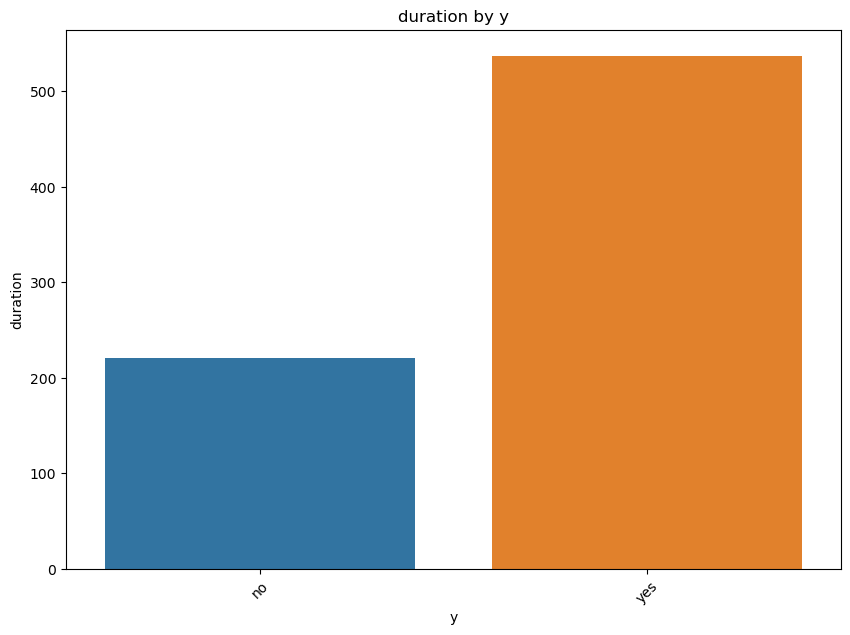

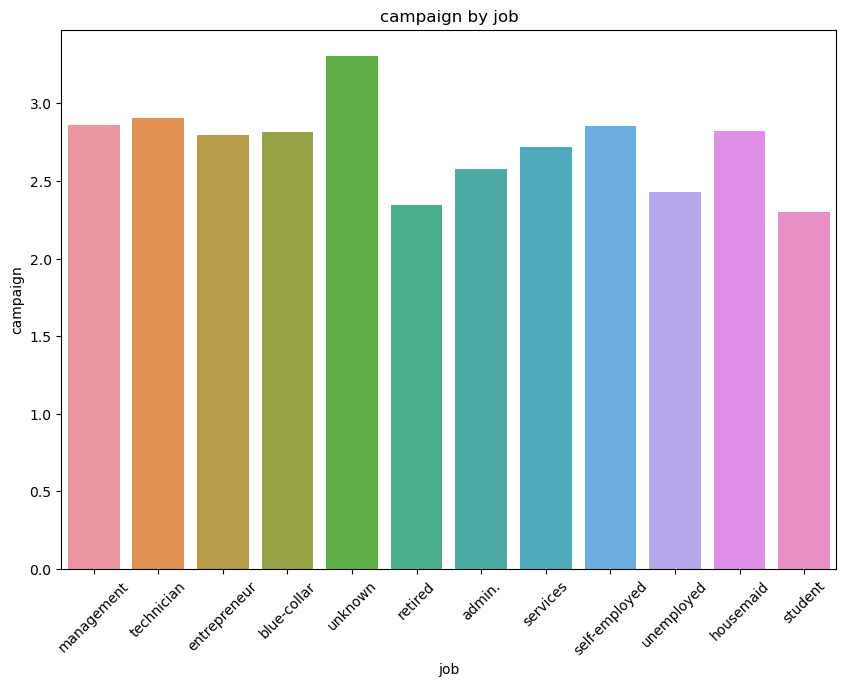

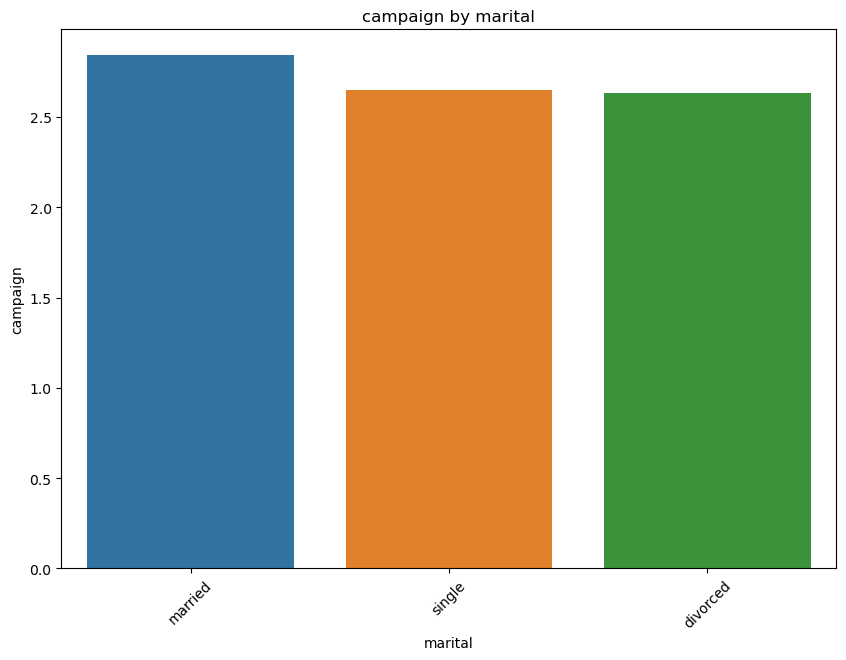

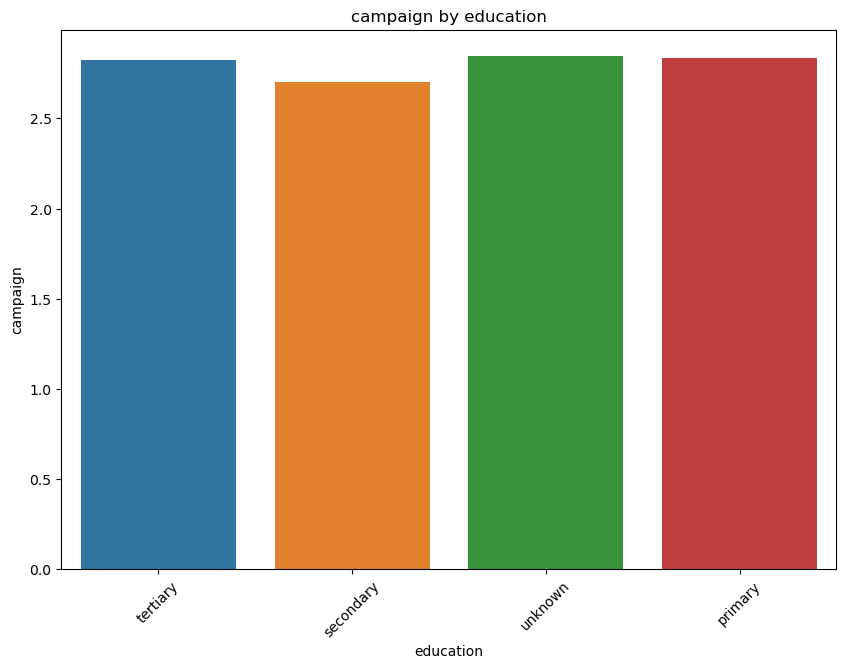

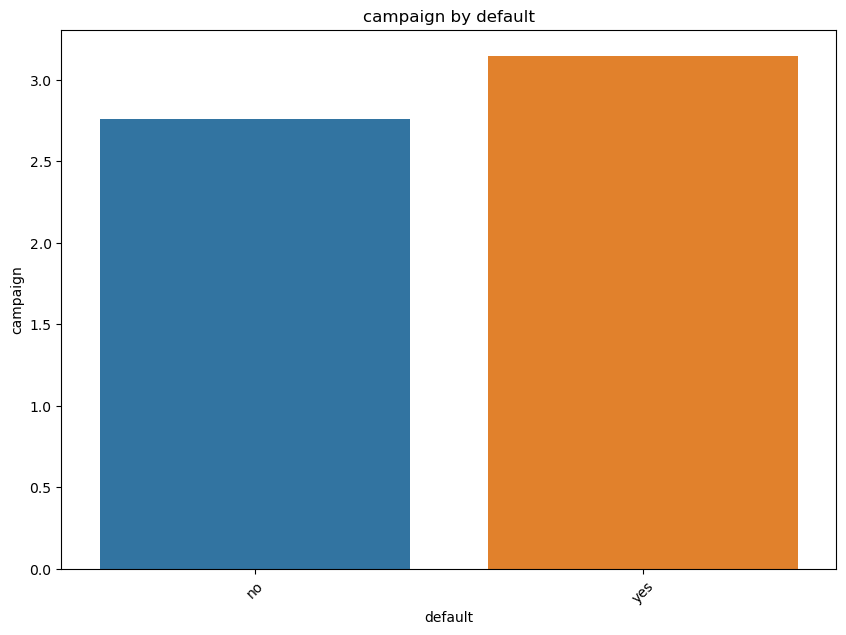

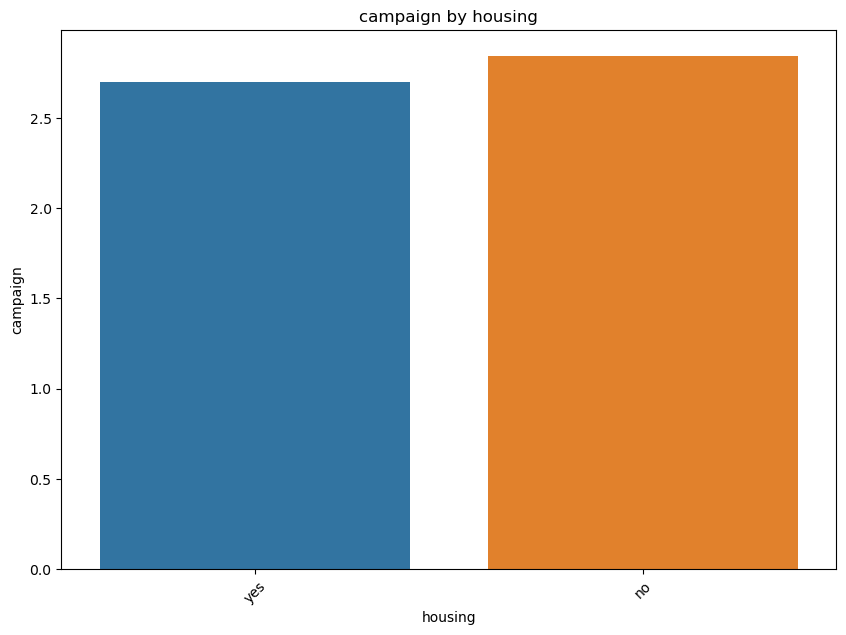

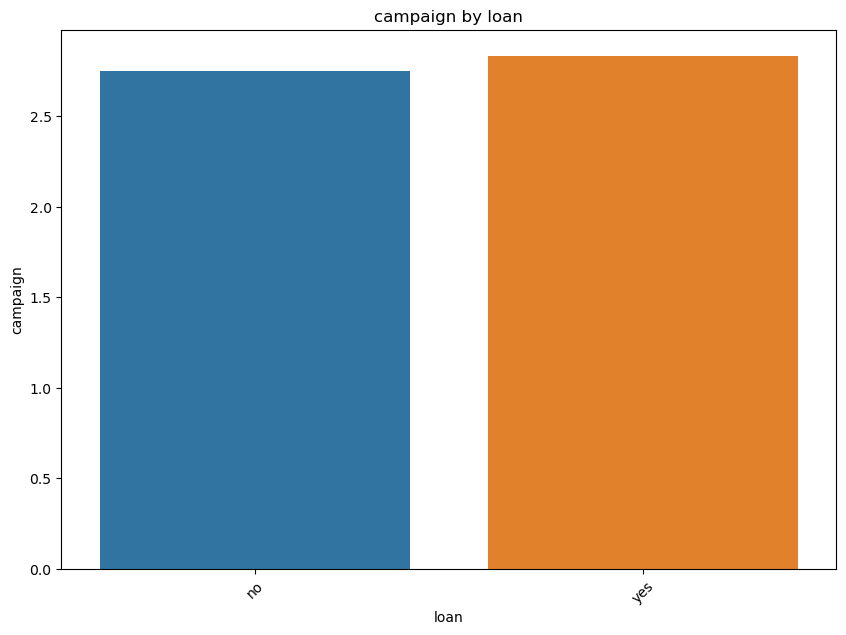

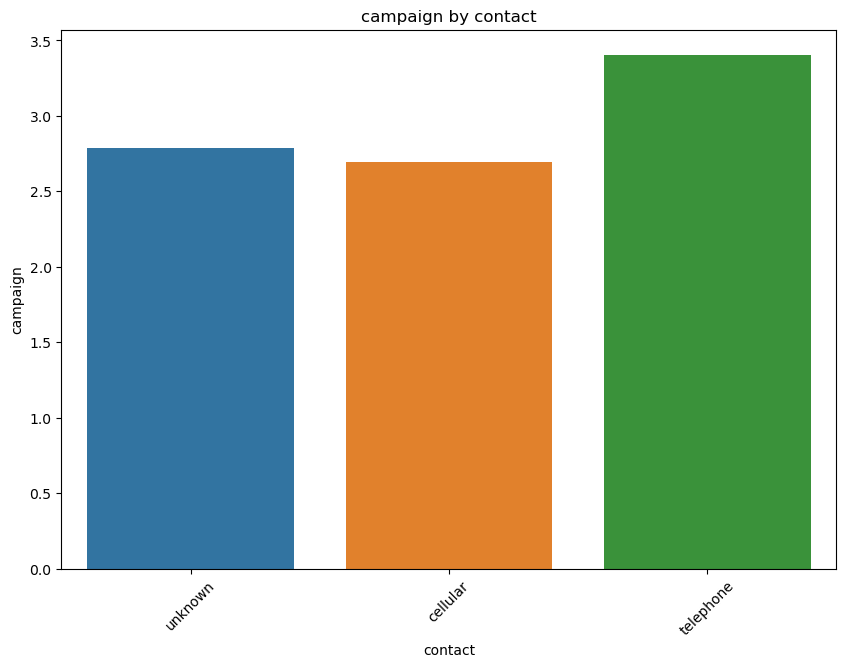

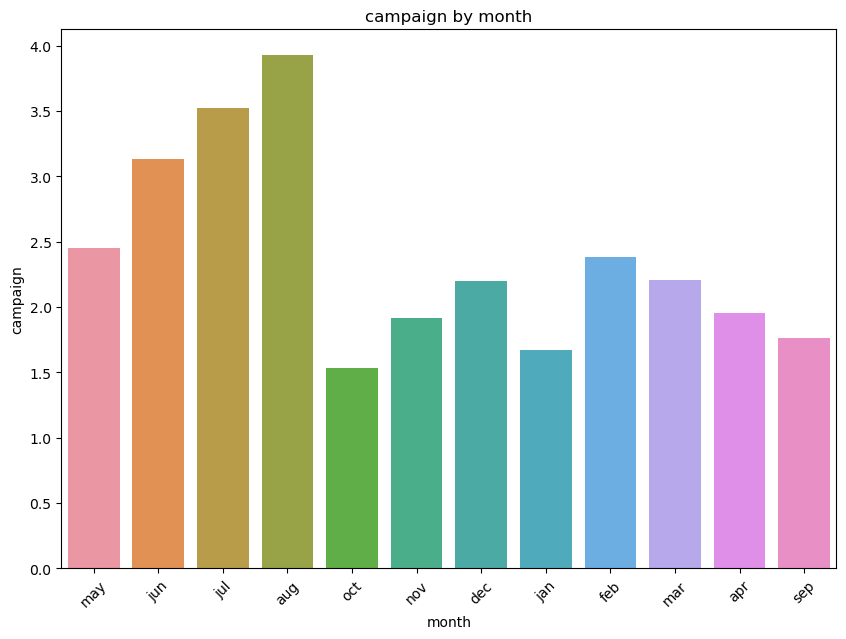

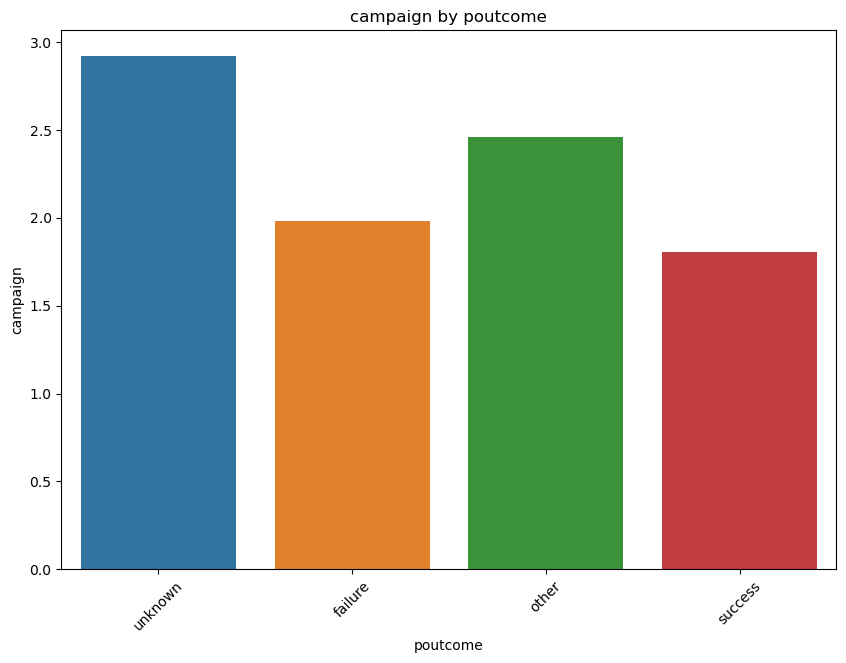

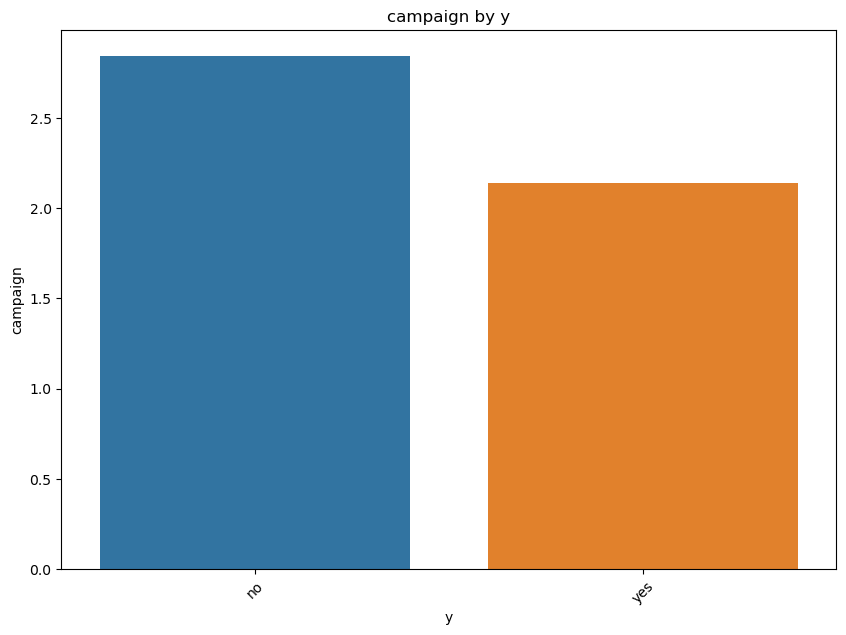

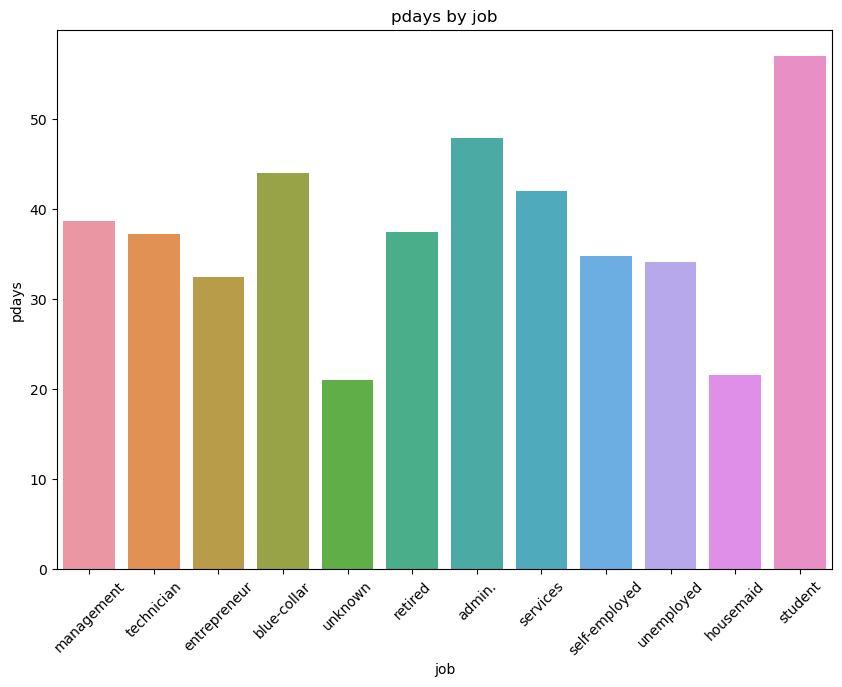

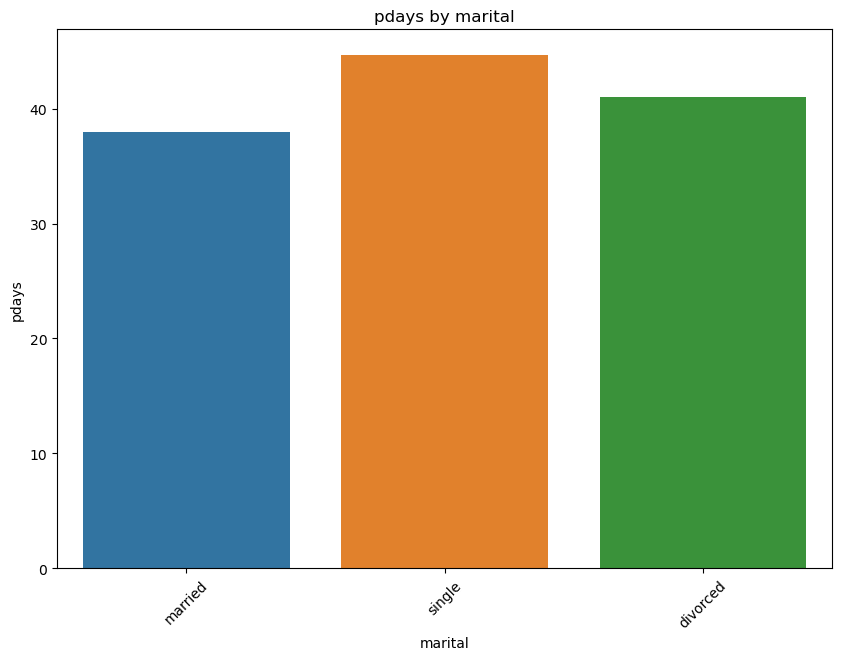

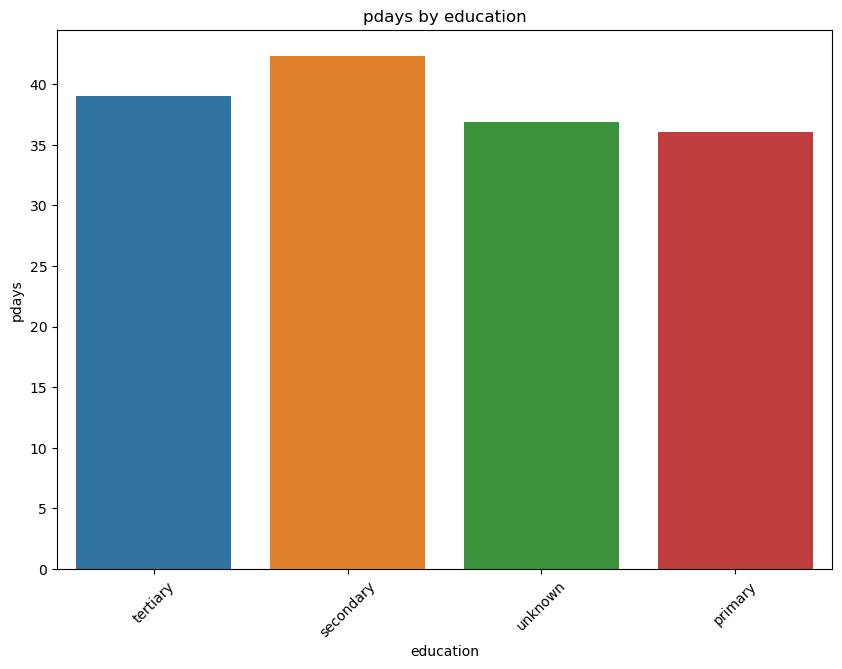

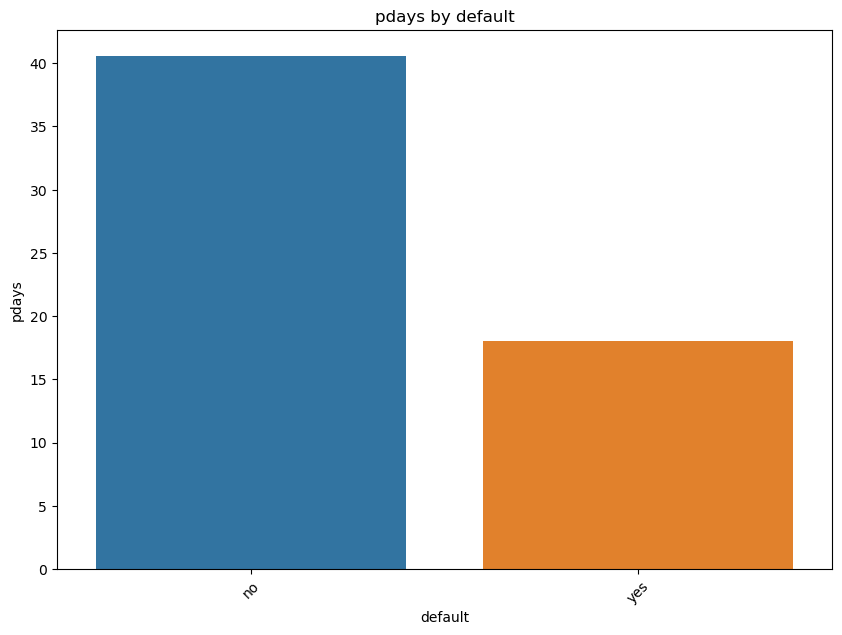

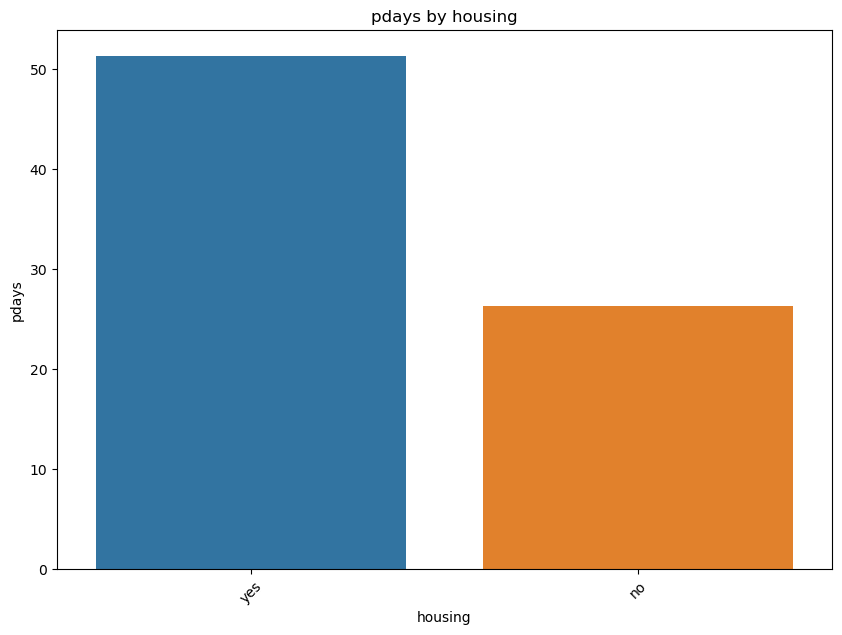

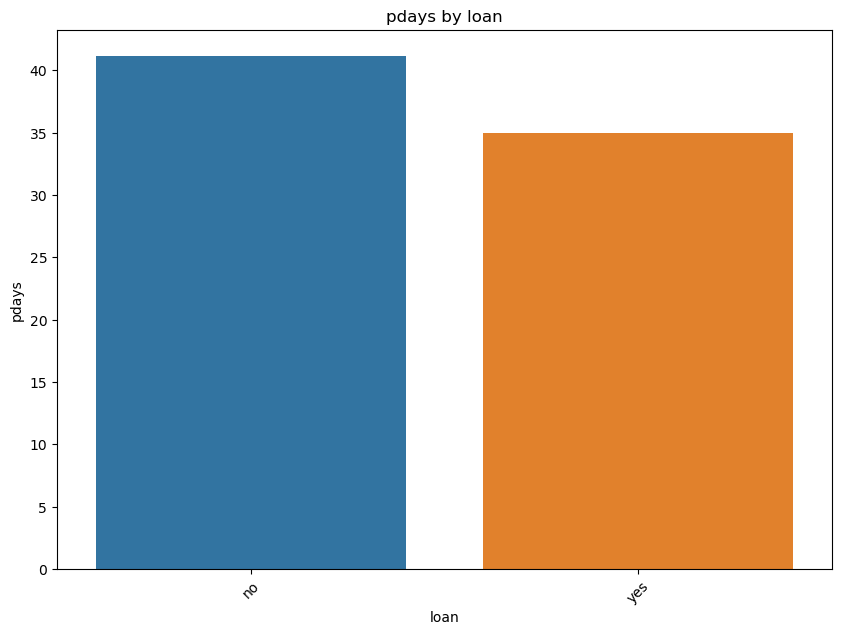

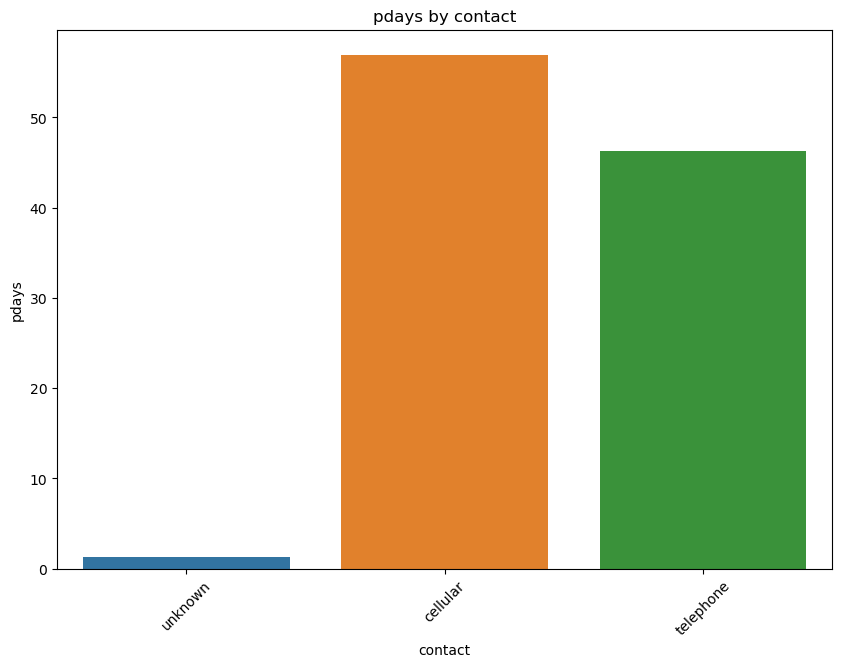

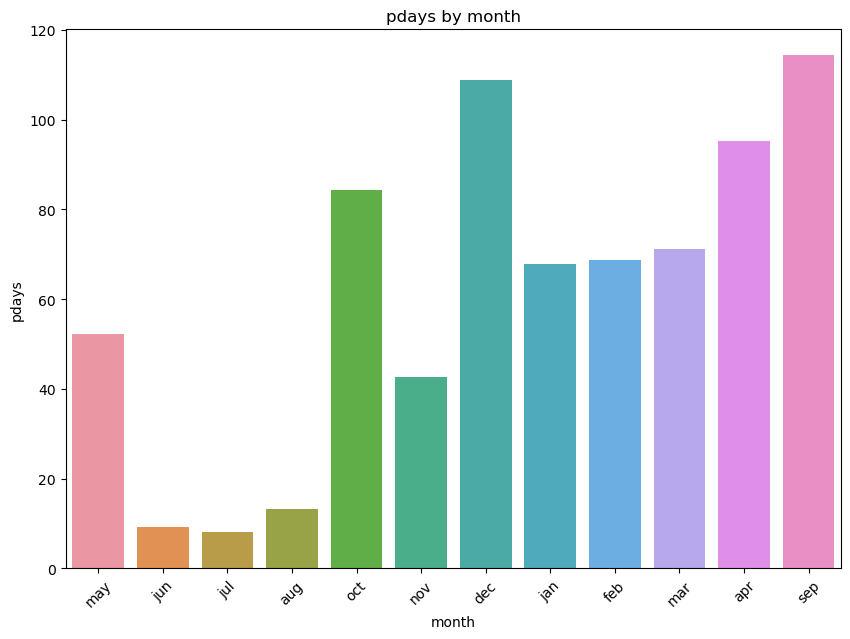

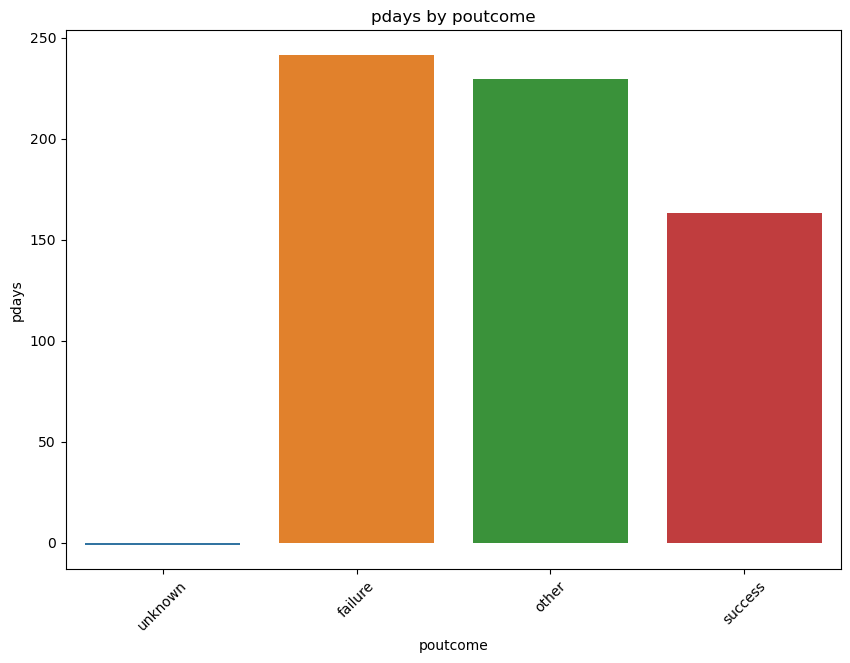

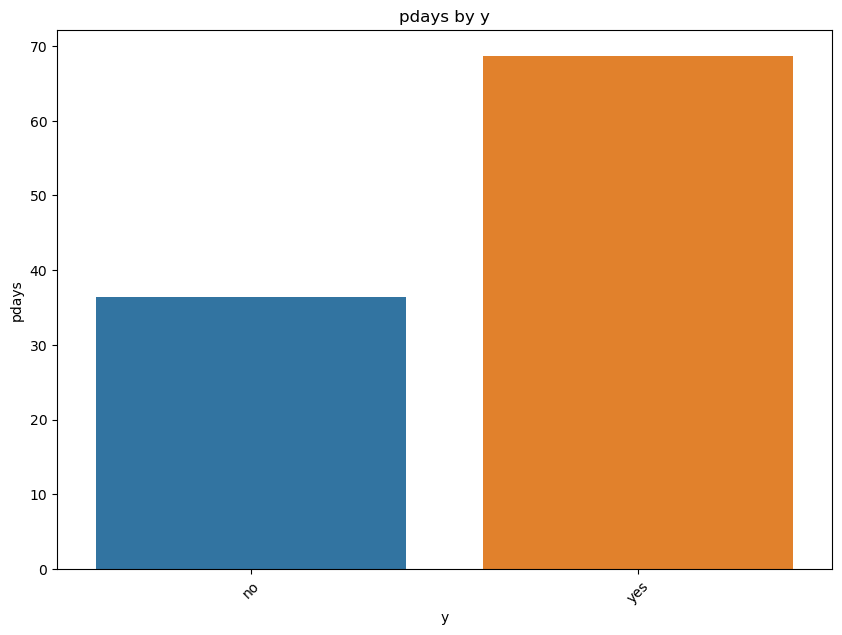

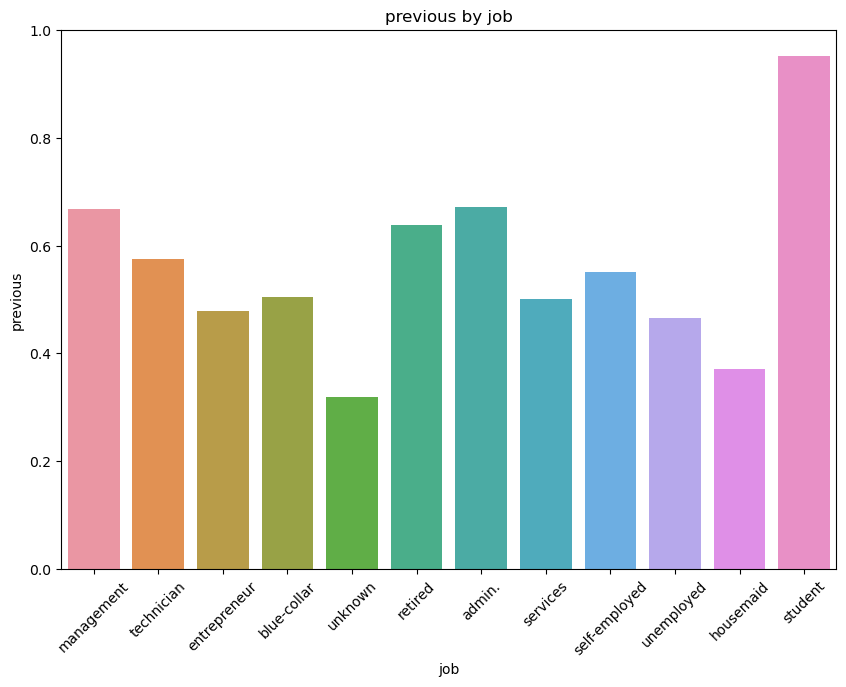

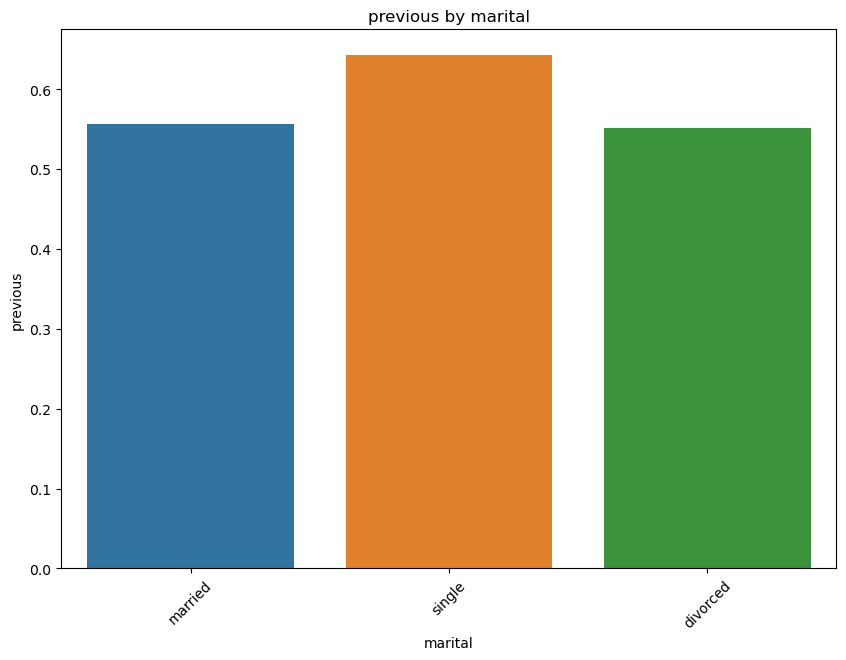

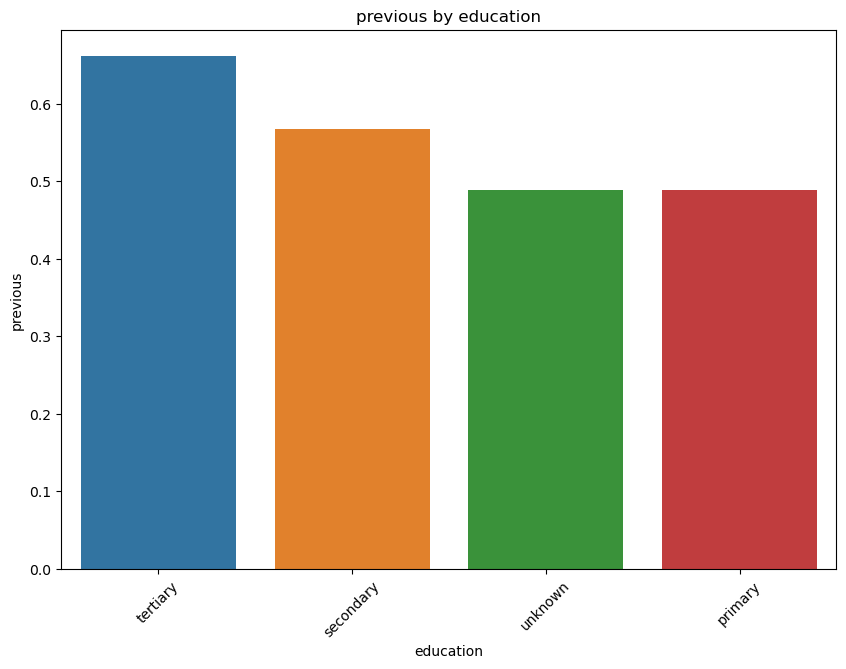

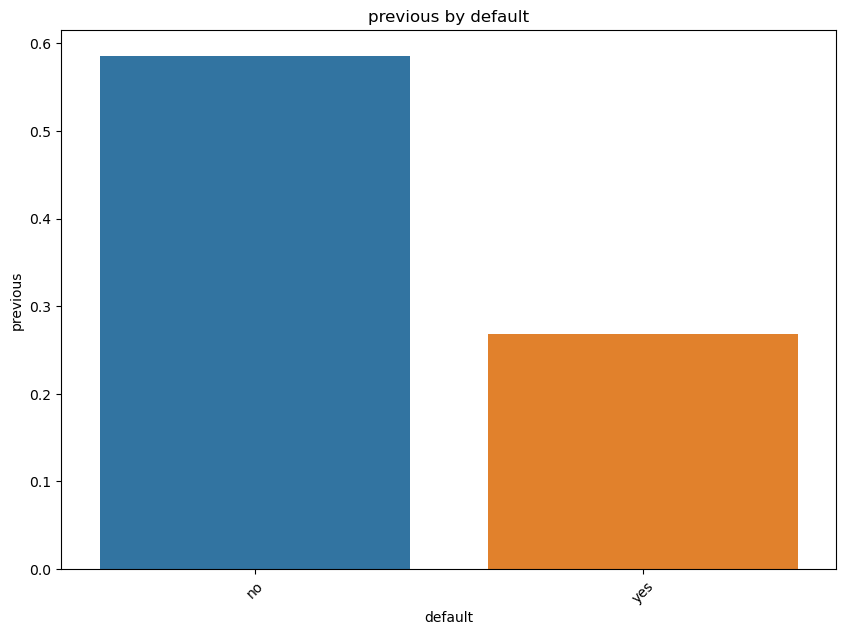

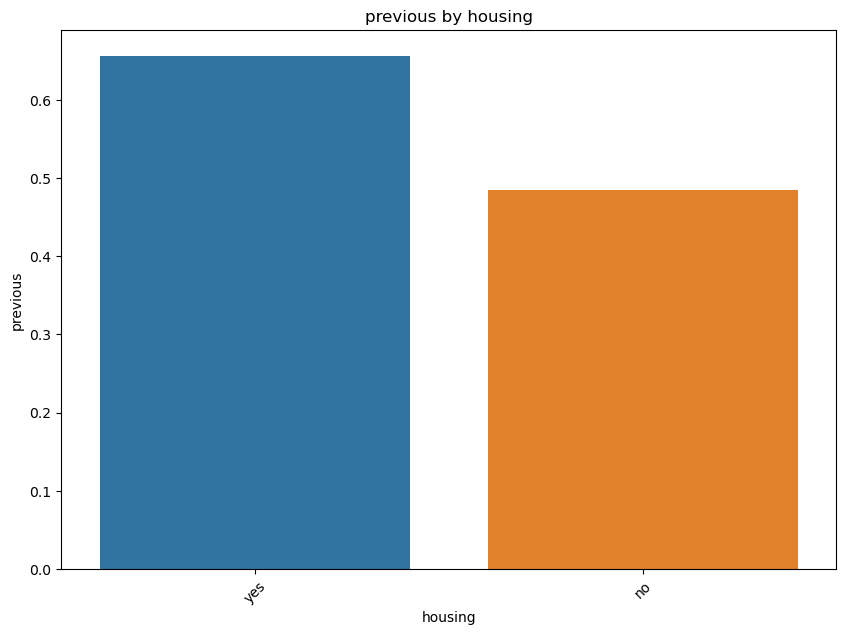

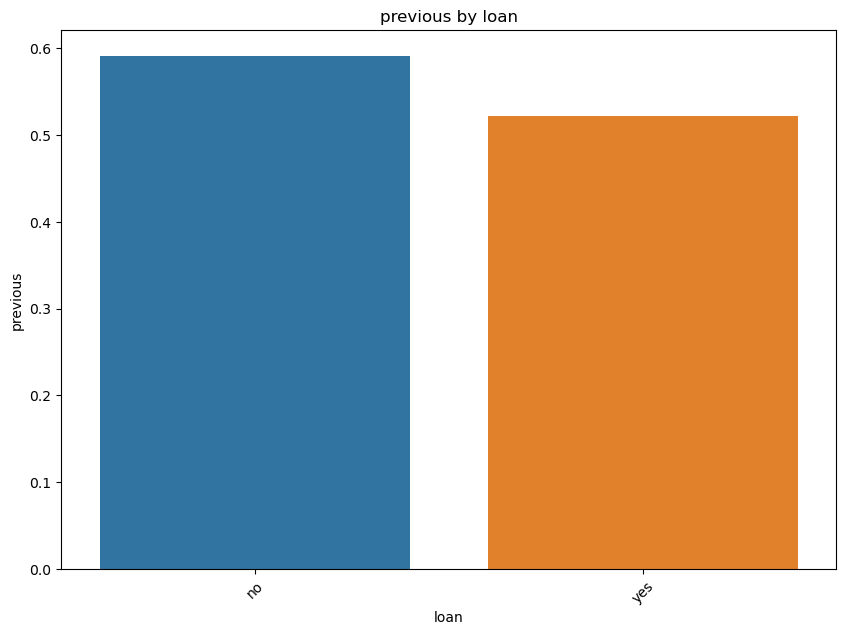

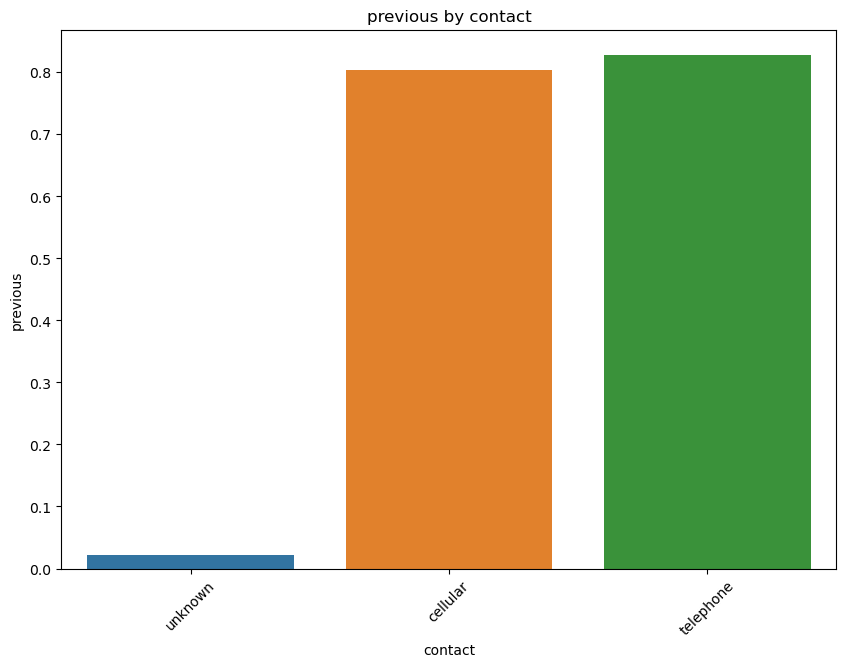

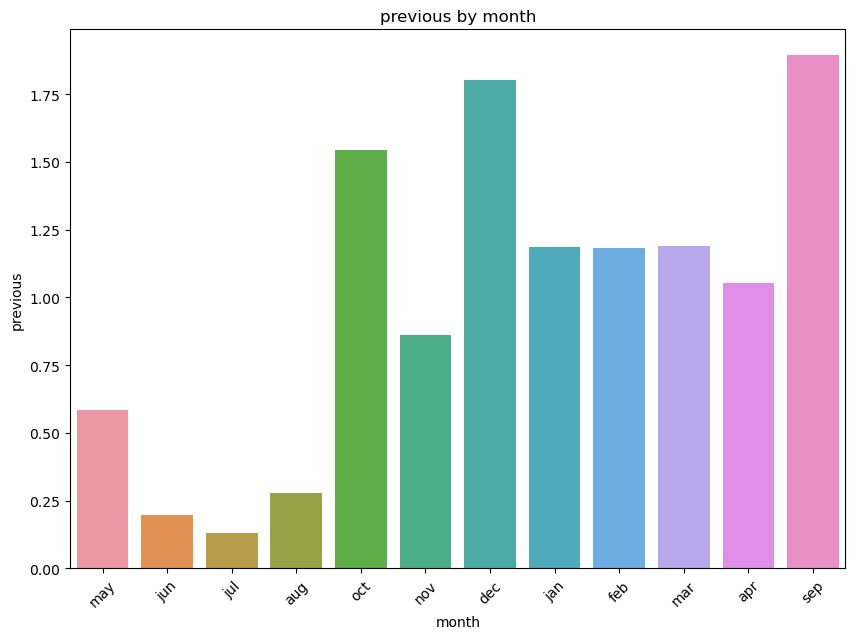

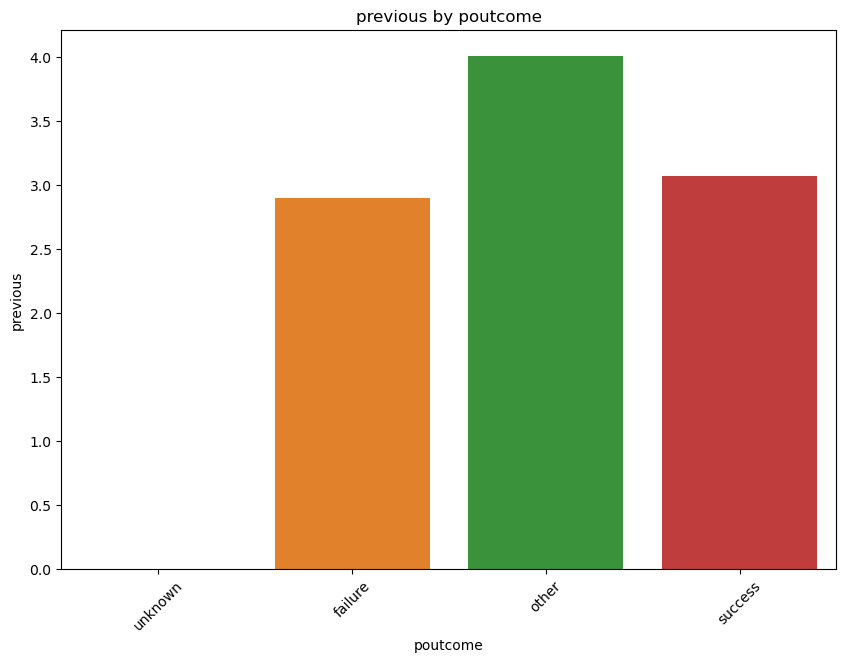

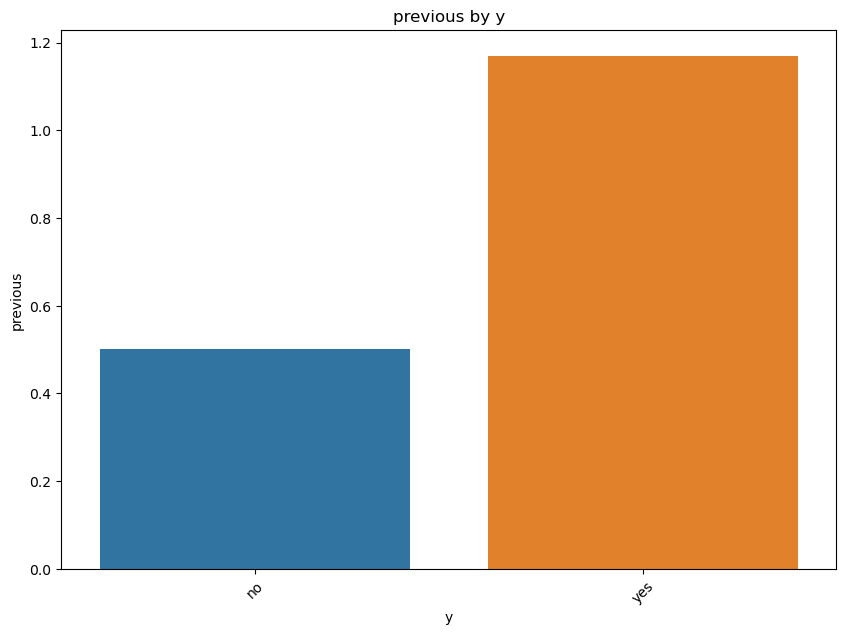

In [42]:
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 7))
        sns.barplot(x=cat_var, y=num_var, data=df,estimator='mean',errorbar =None)
        plt.title(f'{num_var} by {cat_var}')
        plt.xticks(rotation=45)
        plt.show()

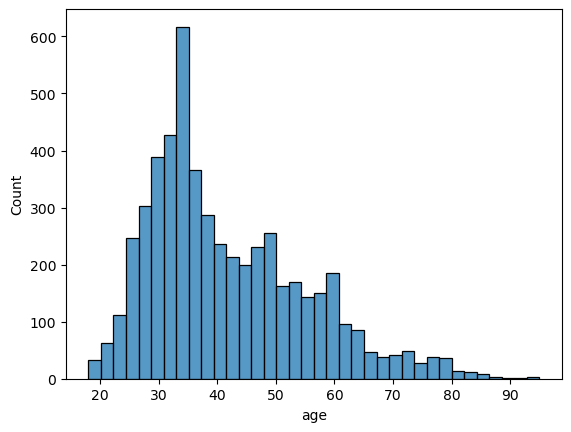

In [43]:
sns.histplot(df[df['y']=='yes']['age'])
plt.show()

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64


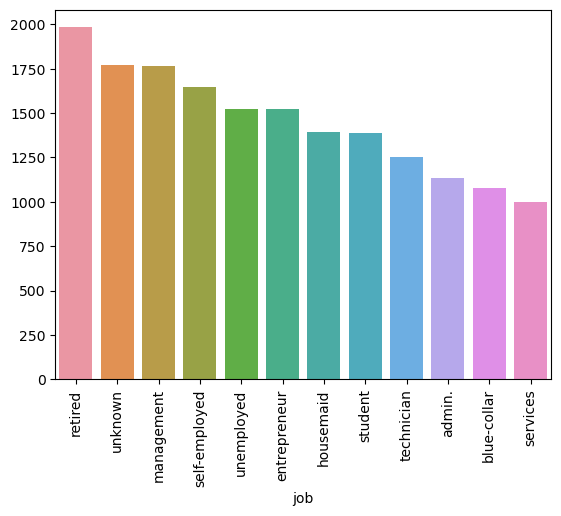

In [44]:
mean_balance_per_job = df.groupby(['job'])['balance'].mean().sort_values(ascending=False)

print(mean_balance_per_job)
sns.barplot(x=mean_balance_per_job.index, y=mean_balance_per_job.values)
plt.xticks(rotation=90)
plt.show()


#### 4.4 Multivariate Analysis

[Back to Table of Contents](#--Table-of-Contents)

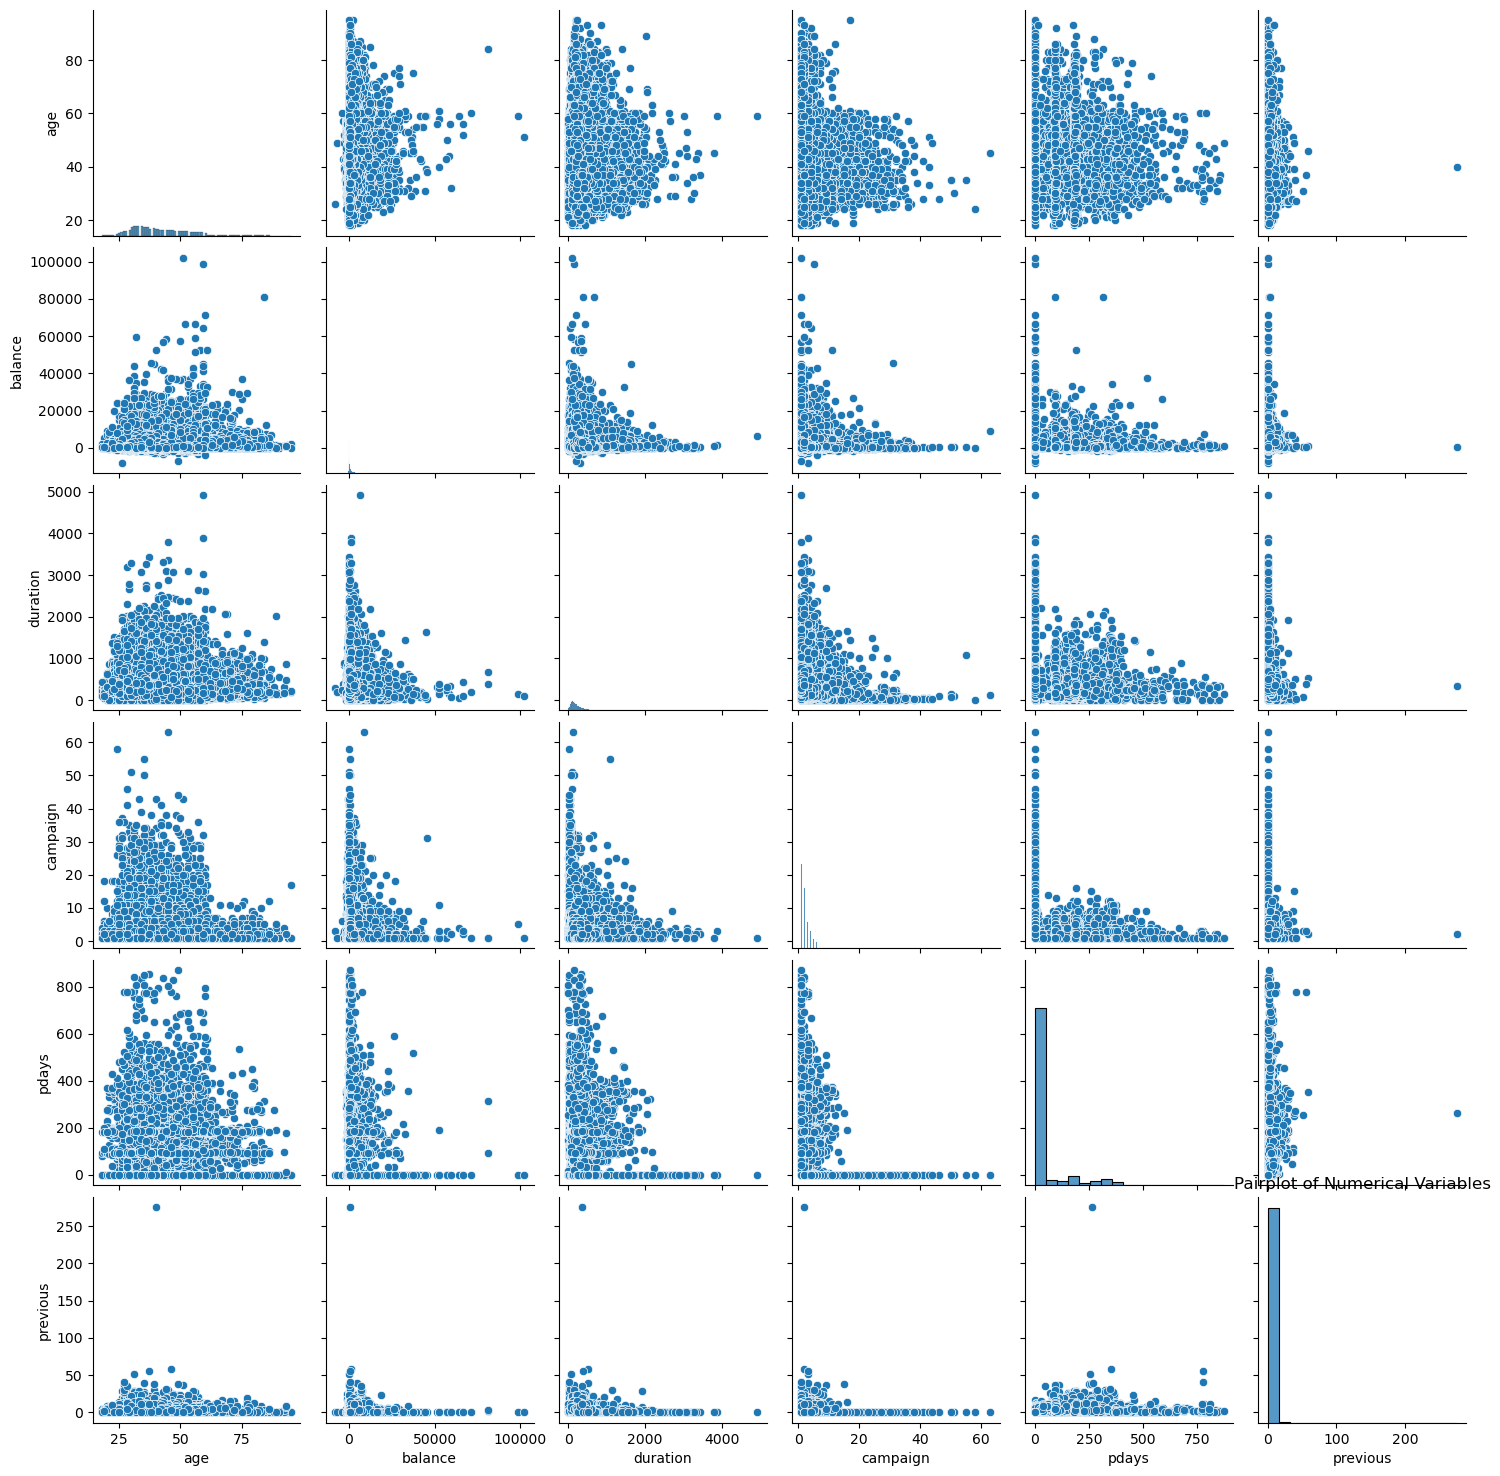

In [45]:
sns.pairplot(df[['age', 'balance', 'duration', 'campaign','pdays', 'previous']])
plt.title('Pairplot of Numerical Variables')
plt.show()

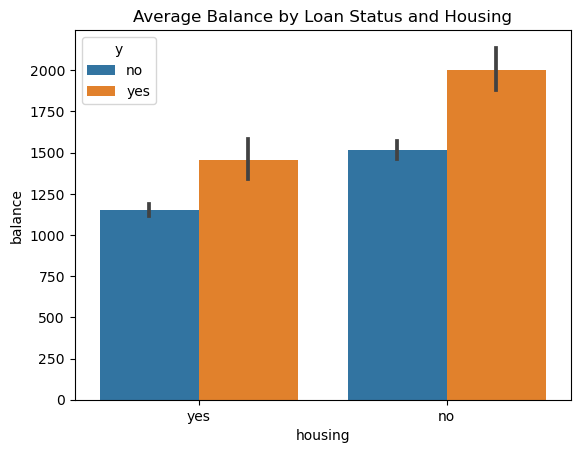

In [46]:
sns.barplot(x='housing', y='balance', hue='y', data=df)
plt.title('Average Balance by Loan Status and Housing')
plt.show()

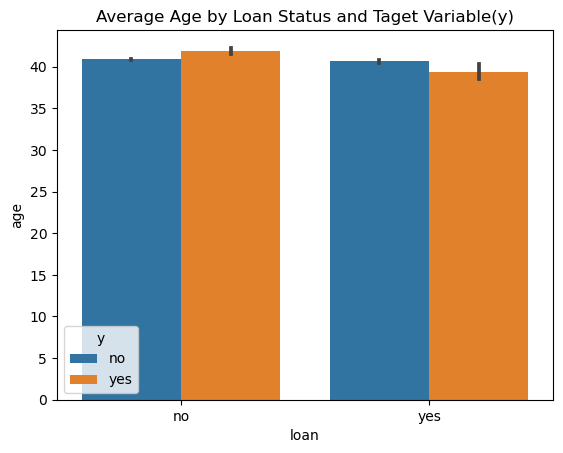

In [47]:
sns.barplot(x='loan', y='age', hue='y', data=df)
plt.title('Average Age by Loan Status and Taget Variable(y)')
plt.show()

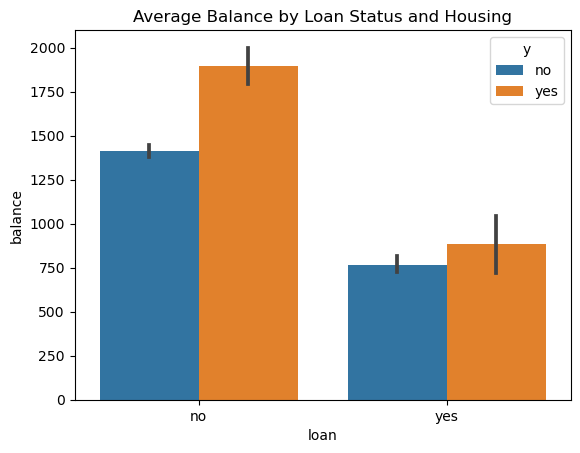

In [48]:
sns.barplot(x='loan', y='balance', hue='y', data=df)
plt.title('Average Balance by Loan Status and Housing')
plt.show()

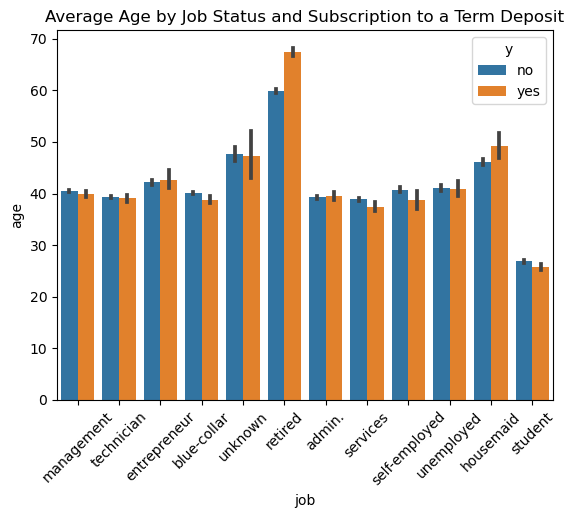

In [49]:
sns.barplot(x='job', y='age', hue='y', data=df)
plt.title('Average Age by Job Status and Subscription to a Term Deposit')
plt.xticks(rotation=45)
plt.show()

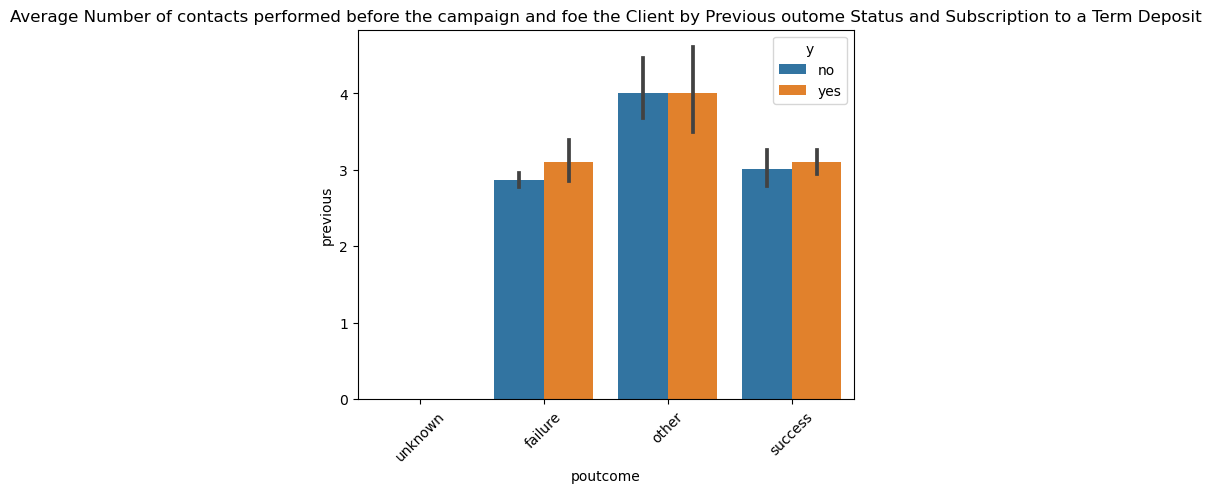

In [50]:
sns.barplot(x='poutcome', y='previous', hue='y', data=df)
plt.title('Average Number of contacts performed before the campaign and foe the Client by Previous outome Status and Subscription to a Term Deposit')
plt.xticks(rotation=45)
plt.show()

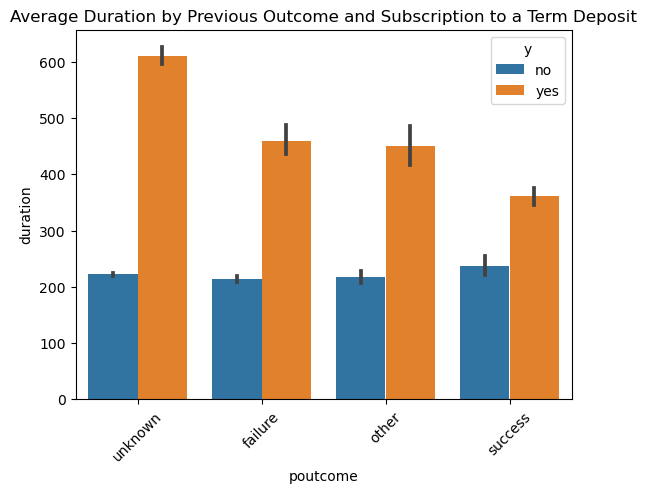

In [51]:
sns.barplot(x='poutcome', y='duration', hue='y', data=df)
plt.title('Average Duration by Previous Outcome and Subscription to a Term Deposit')
plt.xticks(rotation=45)
plt.show()

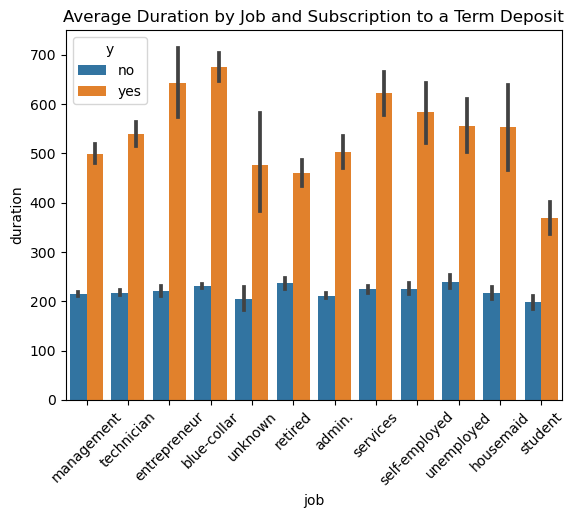

In [52]:
sns.barplot(x='job', y='duration', hue='y', data=df)
plt.title('Average Duration by Job and Subscription to a Term Deposit')
plt.xticks(rotation=45)
plt.show()

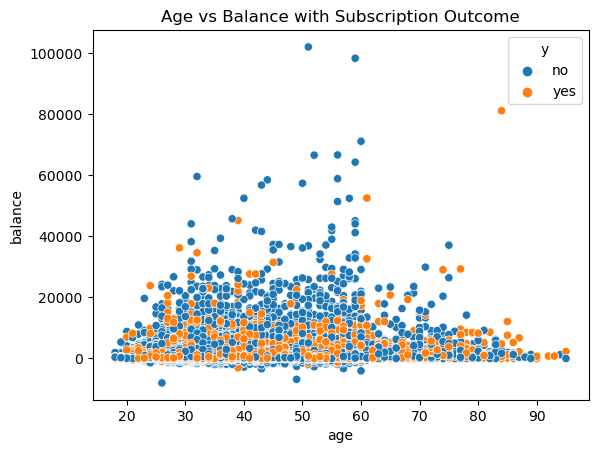

In [53]:
sns.scatterplot(data=df,x='age',y='balance',hue='y')
plt.title("Age vs Balance with Subscription Outcome")
plt.show()

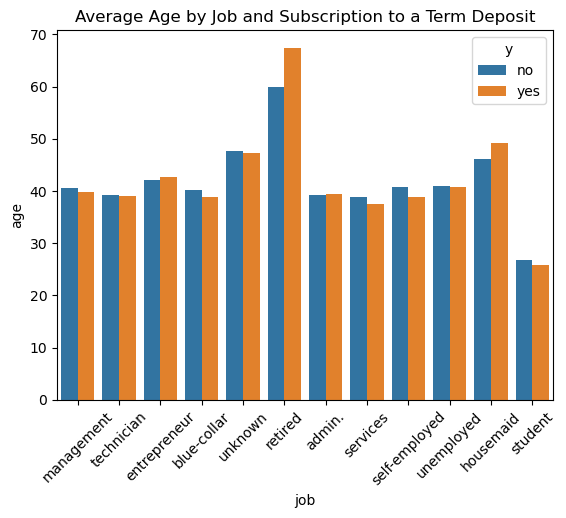

In [54]:
sns.barplot(x='job', y='age', hue='y', data=df,errorbar=None)
plt.title('Average Age by Job and Subscription to a Term Deposit')
plt.xticks(rotation=45)
plt.show()

In [55]:
#Calculating the percentage of each value of the target variable
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

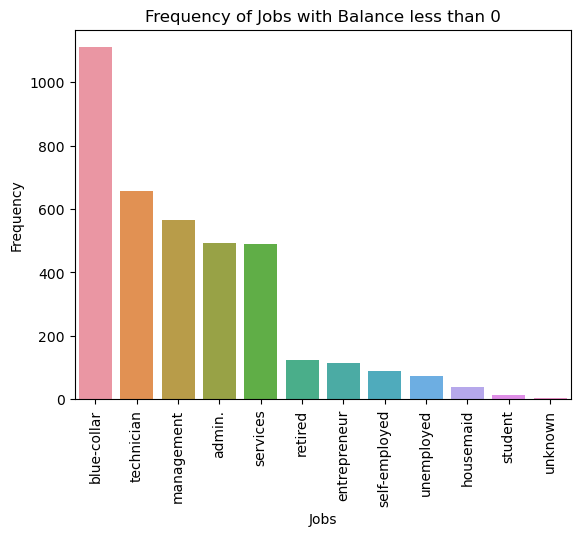

In [56]:
Count_of_Balance_lessthan0_per_Job = df[df['balance']<0]['job'].value_counts()
sns.barplot(x=Count_of_Balance_lessthan0_per_Job.index, y=Count_of_Balance_lessthan0_per_Job.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Jobs')
plt.title('Frequency of Jobs with Balance less than 0')
plt.show()

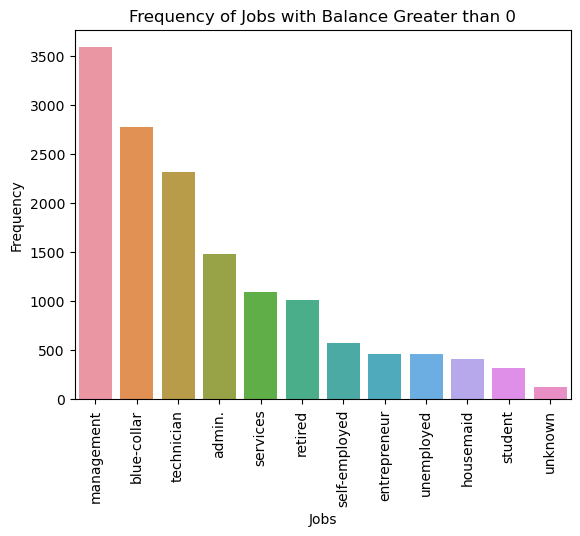

In [57]:
Count_of_Balance_greaterthan0_per_Job = df[df['balance']>1000]['job'].value_counts()
sns.barplot(x=Count_of_Balance_greaterthan0_per_Job.index, y=Count_of_Balance_greaterthan0_per_Job.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Jobs')
plt.title('Frequency of Jobs with Balance Greater than 0')
plt.show()

In [58]:
df.groupby(['default','housing','loan'])['balance'].mean()

default  housing  loan
no       no       no      1759.504414
                  yes      808.204873
         yes      no      1277.827086
                  yes      819.390647
yes      no       no       -17.514151
                  yes     -142.089286
         yes      no      -194.784768
                  yes     -193.646617
Name: balance, dtype: float64

In [59]:
df[df['y'] == 1].groupby('month').size().sort_values(ascending=False)

Series([], dtype: int64)

In [60]:
df.groupby(['y','housing','loan','default'])['balance'].mean()

y    housing  loan  default
no   no       no    no         1687.303561
                    yes         -17.944162
              yes   no          784.297438
                    yes        -151.756250
     yes      no    no         1250.131080
                    yes        -199.875000
              yes   no          822.864437
                    yes        -199.880952
yes  no       no    no         2080.520513
                    yes         -11.866667
              yes   no         1091.241706
                    yes          51.250000
     yes      no    no         1593.995146
                    yes        -130.000000
              yes   no          765.856589
                    yes         -81.428571
Name: balance, dtype: float64

In [61]:
df.groupby(['y','housing'])['duration'].mean()

y    housing
no   no         214.710349
     yes        225.850399
yes  no         466.115385
     yes        660.671835
Name: duration, dtype: float64

In [62]:
df.groupby(['y','loan'])['balance'].mean()

y    loan
no   no      1413.228726
     yes      766.481953
yes  no      1897.001041
     yes      883.642562
Name: balance, dtype: float64

In [63]:
# Average balance by marital group
df.groupby(['marital'])['balance'].mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [64]:
#Average balance by marital group and job
df.groupby(['marital','job'])['campaign'].mean()

marital   job          
divorced  admin.           2.393333
          blue-collar      2.574667
          entrepreneur     2.731844
          housemaid        2.548913
          management       2.787579
          retired          2.421176
          self-employed    2.428571
          services         2.519126
          student          2.666667
          technician       2.929730
          unemployed       2.286550
          unknown          2.882353
married   admin.           2.695878
          blue-collar      2.898106
          entrepreneur     2.903738
          housemaid        2.932018
          management       2.875741
          retired          2.323512
          self-employed    3.166163
          services         2.859992
          student          2.592593
          technician       2.919052
          unemployed       2.536252
          unknown          3.596059
single    admin.           2.466435
          blue-collar      2.626614
          entrepreneur     2.382353
    

In [65]:
#Dealing with ouliers in the balance variable
Q1 = df.balance.quantile(0.25)
Q3 = df.balance.quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(lower,upper,sep=' ,')

-1962.0 ,3462.0


In [66]:
#Removing balance outliers
not_outlier_df= df[(df['balance']>lower)&(df['balance']<upper)]
not_outlier_df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no    505.0      no  yes   
45206   51    technician   married   tertiary      no    825.0      no   no   
45207   71       retired  divorced    primary      no   1729.0      no   no   
45209   57   blue-collar   married  secondary      no    668.0      no   no   
45210   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[40480 rows x 17 columns]

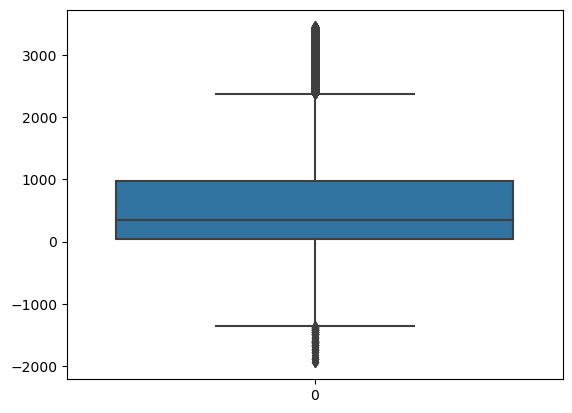

In [67]:
#Plotting a box plot after removing outliers in the balance column
sns.boxplot(not_outlier_df['balance'])
plt.show()

In [68]:
#Removing Redundant features in the dataset
df.drop(columns=['default','contact','pdays','poutcome'],inplace=True)
df

age           job   marital  education  balance housing loan  day  \
0       58    management   married   tertiary   2143.0     yes   no    5   
1       44    technician    single  secondary     29.0     yes   no    5   
2       33  entrepreneur   married  secondary      2.0     yes  yes    5   
3       47   blue-collar   married    unknown   1506.0     yes   no    5   
4       33       unknown    single    unknown      1.0      no   no    5   
...    ...           ...       ...        ...      ...     ...  ...  ...   
45206   51    technician   married   tertiary    825.0      no   no   17   
45207   71       retired  divorced    primary   1729.0      no   no   17   
45208   72       retired   married  secondary   5715.0      no   no   17   
45209   57   blue-collar   married  secondary    668.0      no   no   17   
45210   37  entrepreneur   married  secondary   2971.0      no   no   17   

      month  duration  campaign  previous    y  
0       may       261         1         0   no  
1       may       151         1         0   no  
2       may        76         1         0   no  
3       may        92         1         0   no  
4       may       198         1         0   no  
...     ...       ...       ...       ...  ...  
45206   nov       977         3         0  yes  
45207   nov       456         2         0  yes  
45208   nov      1127         5         3  yes  
45209   nov       508         4         0   no  
45210   nov       361         2        11   no  

[45211 rows x 13 columns]

### 5.  Feature Engineering and Data Preprocessing

[Back to Table of Contents](#--Table-of-Contents)

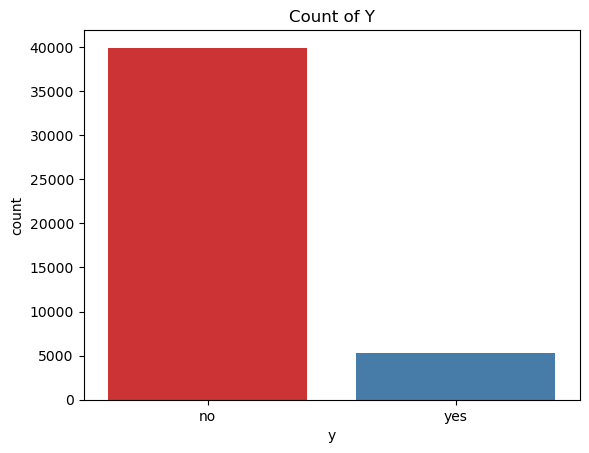

In [69]:
# Counting the number of each instances in the target variable
sns.countplot(x="y", data=df, palette="Set1")
plt.title("Count of Y")
plt.show()

In [70]:
# renaming target variable
df["y"] = df["y"].replace({"yes": 1, "no": 0})

In [71]:
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [72]:
df.describe(include='object')

job  marital  education housing   loan  month
count         45211    45211      45211   45211  45211  45211
unique           12        3          4       2      2     12
top     blue-collar  married  secondary     yes     no    may
freq           9732    27214      23202   25130  37967  13766

In [73]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['job', 'marital', 'education', 'housing', 'month','loan']

# Apply LabelEncoder to each column in the list
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [74]:
df['loan'] = encoder.fit_transform(df['loan'])

In [75]:
df.head()

age  job  marital  education  balance  housing  loan  day  month  duration  \
0   58    4        1          2   2143.0        1     0    5      8       261   
1   44    9        2          1     29.0        1     0    5      8       151   
2   33    2        1          1      2.0        1     1    5      8        76   
3   47    1        1          3   1506.0        1     0    5      8        92   
4   33   11        2          3      1.0        0     0    5      8       198   

   campaign  previous  y  
0         1         0  0  
1         1         0  0  
2         1         0  0  
3         1         0  0  
4         1         0  0

In [76]:
# Splitting the data into features and target variable
X = df.drop(columns=['y'], axis=1) 
y = df['y'] 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

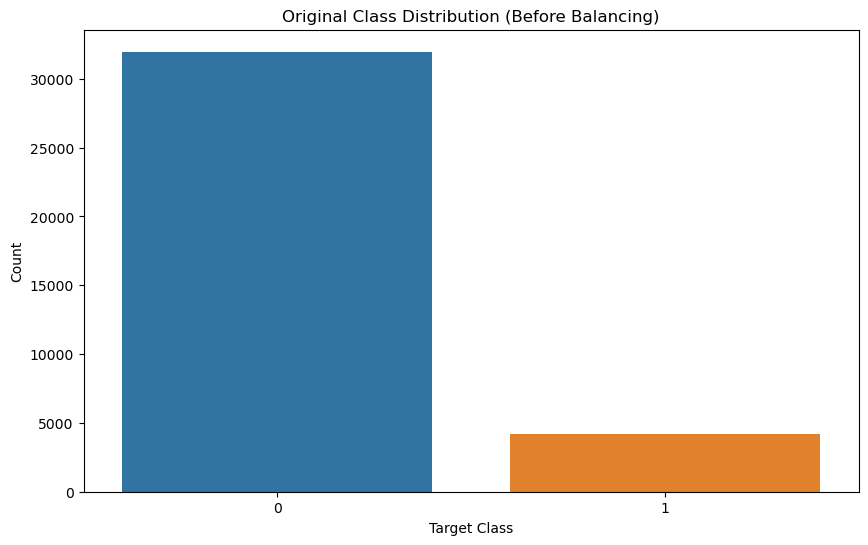

In [77]:
# Visualizing original target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Original Class Distribution (Before Balancing)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [78]:
#Counting the number of each target variable
y_train.value_counts()

0    31970
1     4198
Name: y, dtype: int64

In [79]:
#Balancing the target variable
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


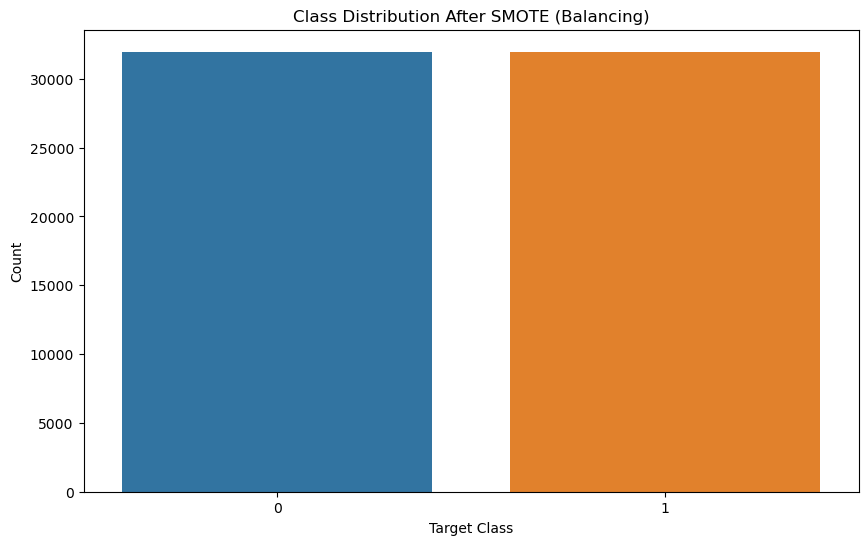

In [80]:
#Visualizing the distribution of the target variable after balancing the data
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE (Balancing)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [81]:
y_train_resampled.value_counts()

0    31970
1    31970
Name: y, dtype: int64

### 6.  Model Building

[Back to Table of Contents](#--Table-of-Contents)

In [82]:
# Function to evaluate models
def evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test):
    model.fit(X_train_resampled, y_train_resampled)
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    
    print('Classification Report (Test Data):')
    print(classification_report(y_test, y_test_pred))
    
    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    return train_accuracy, test_accuracy, train_f1, test_f1

In [101]:
# Calculate scale_pos_weight as the ratio of negative to positive class
scale_pos_weight = sum(y_train_resampled == 0) / sum(y_train_resampled == 1)
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'NaiveBayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 7, 9], 'class_weight': ['balanced', None]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9],'class_weight': ['balanced', None]},
    'ExtraTrees': {'n_estimators':[10,20,30,50,100],'class_weight': ['balanced', None]},
    'NaiveBayes':{},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2],'class_weight': ['balanced', None]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

results = []

### 7. Model Evaluation

[Back to Table of Contents](#--Table-of-Contents)


Model: DecisionTree
Best Parameters: {'class_weight': 'balanced', 'max_depth': 9}
Train Accuracy: 0.8777
Test Accuracy: 0.8077
Train F1 Score: 0.8829
Test F1 Score: 0.4890
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7952
           1       0.36      0.76      0.49      1091

    accuracy                           0.81      9043
   macro avg       0.66      0.79      0.69      9043
weighted avg       0.89      0.81      0.83      9043

Confusion Matrix (Test Data):


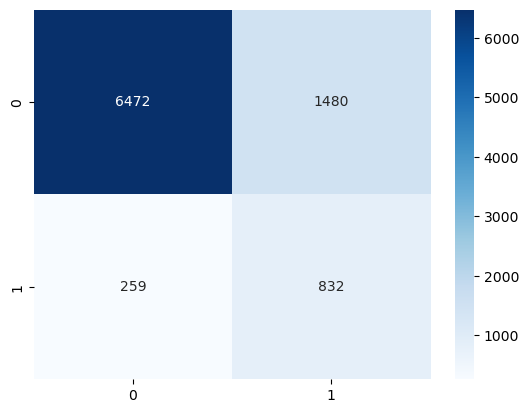


Model: RandomForest
Best Parameters: {'class_weight': 'balanced', 'max_depth': 9, 'n_estimators': 200}
Train Accuracy: 0.8838
Test Accuracy: 0.8215
Train F1 Score: 0.8885
Test F1 Score: 0.5067
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7952
           1       0.38      0.76      0.51      1091

    accuracy                           0.82      9043
   macro avg       0.67      0.79      0.70      9043
weighted avg       0.89      0.82      0.84      9043

Confusion Matrix (Test Data):


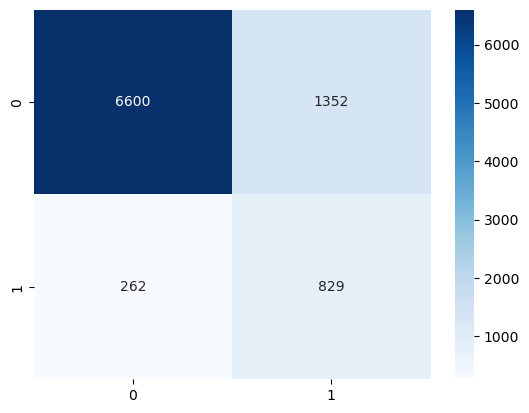


Model: ExtraTrees
Best Parameters: {'class_weight': None, 'n_estimators': 100}
Train Accuracy: 1.0000
Test Accuracy: 0.8653
Train F1 Score: 1.0000
Test F1 Score: 0.5190
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7952
           1       0.46      0.60      0.52      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.75      0.72      9043
weighted avg       0.88      0.87      0.87      9043

Confusion Matrix (Test Data):


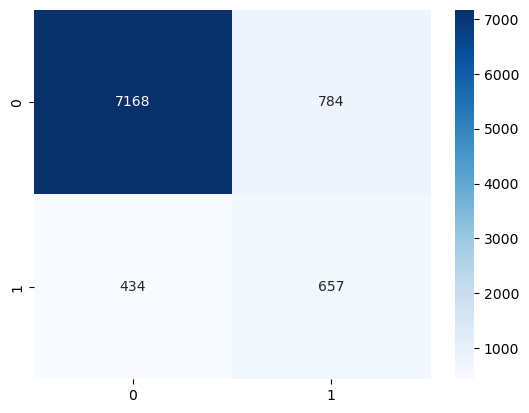


Model: NaiveBayes
Best Parameters: {}
Train Accuracy: 0.7844
Test Accuracy: 0.6723
Train F1 Score: 0.8072
Test F1 Score: 0.3538
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      7952
           1       0.23      0.74      0.35      1091

    accuracy                           0.67      9043
   macro avg       0.59      0.70      0.57      9043
weighted avg       0.86      0.67      0.73      9043

Confusion Matrix (Test Data):


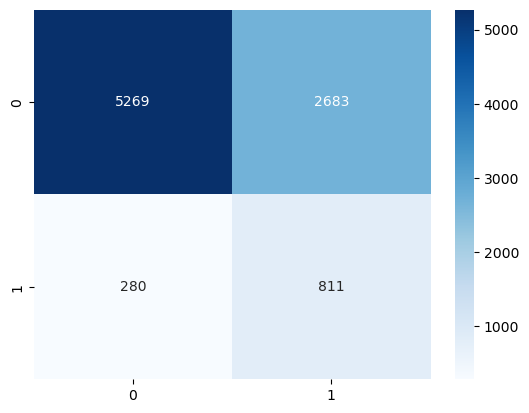


Model: XGBoost


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWa

Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.2, 'n_estimators': 200}


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9530
Test Accuracy: 0.8738
Train F1 Score: 0.9535
Test F1 Score: 0.5600
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7952
           1       0.48      0.67      0.56      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.78      0.74      9043
weighted avg       0.90      0.87      0.88      9043

Confusion Matrix (Test Data):


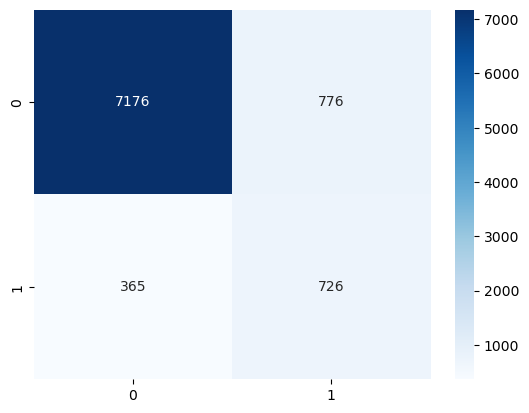


Model: AdaBoost
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Train Accuracy: 0.8607
Test Accuracy: 0.8236
Train F1 Score: 0.8627
Test F1 Score: 0.4823
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7952
           1       0.37      0.68      0.48      1091

    accuracy                           0.82      9043
   macro avg       0.66      0.76      0.69      9043
weighted avg       0.88      0.82      0.84      9043

Confusion Matrix (Test Data):


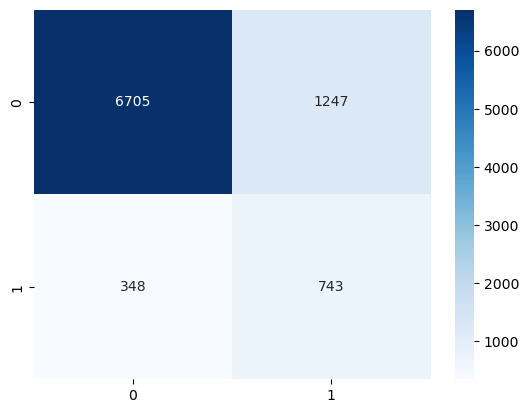

In [102]:
# Using Grid search to find the best hyperparameter for each model
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')
    
    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train_resampled, X_test, y_train_resampled, y_test)
    
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

### 8. Model Selection

[Back to Table of Contents](#--Table-of-Contents)

          Model                                        Best Params  \
0  DecisionTree       {'class_weight': 'balanced', 'max_depth': 9}   
1  RandomForest  {'class_weight': 'balanced', 'max_depth': 9, '...   
2    ExtraTrees        {'class_weight': None, 'n_estimators': 100}   
3    NaiveBayes                                                 {}   
4       XGBoost  {'class_weight': 'balanced', 'learning_rate': ...   
5      AdaBoost        {'learning_rate': 0.2, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.877698       0.807697        0.882889       0.488980  
1        0.883844       0.821519        0.888509       0.506724  
2        1.000000       0.865310        1.000000       0.518957  
3        0.784407       0.672343        0.807184       0.353762  
4        0.952972       0.873825        0.953460       0.559969  
5        0.860698       0.823620        0.862659       0.482311  


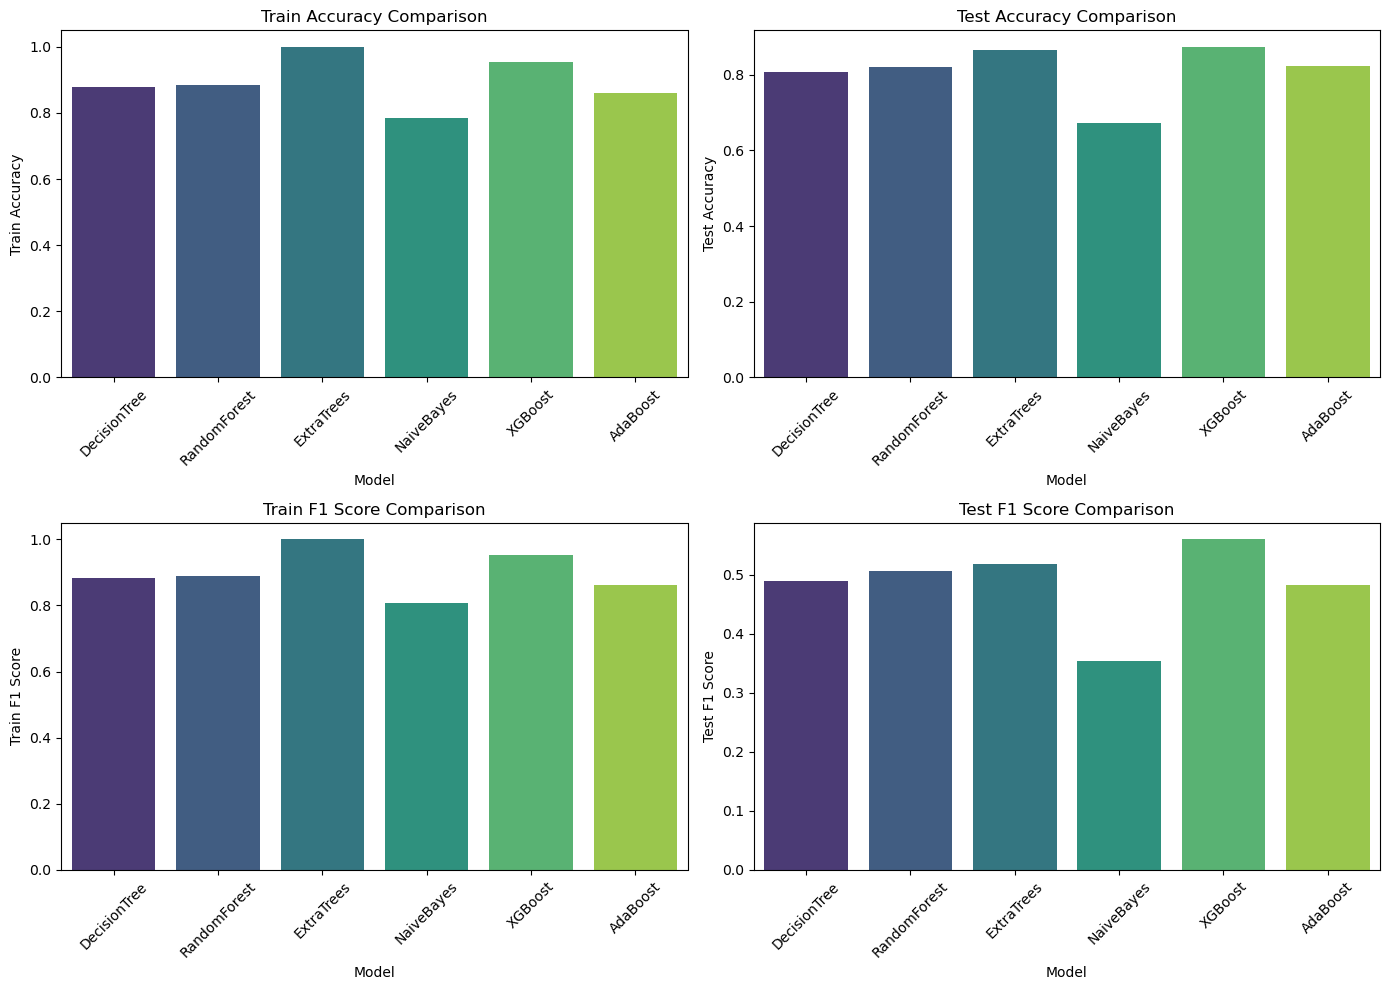

In [103]:
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()

In [90]:
results_df = pd.DataFrame(results)
print(results_df)
# Finding the best model based on Test Accuracy and Test F1 Score
best_model_accuracy_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
best_model_f1_row = results_df.loc[results_df['Test F1 Score'].idxmax()]

print("Best Model based on Test Accuracy:")
print(best_model_accuracy_row)

print("\nBest Model based on Test F1 Score:")
print(best_model_f1_row)

results_df['Average Score'] = (results_df['Test Accuracy'] + results_df['Test F1 Score']) / 2
best_model_combined_row = results_df.loc[results_df['Average Score'].idxmax()]

print("\nBest Model based on Combined Test Accuracy and Test F1 Score:")
print(best_model_combined_row)

          Model                                        Best Params  \
0  DecisionTree                                   {'max_depth': 9}   
1  RandomForest              {'max_depth': 9, 'n_estimators': 100}   
2    ExtraTrees                               {'n_estimators': 50}   
3    NaiveBayes                                                 {}   
4       XGBoost  {'learning_rate': 0.2, 'n_estimators': 200, 's...   
5      AdaBoost        {'learning_rate': 0.2, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  
0        0.877698       0.807918        0.882889       0.488967  
1        0.884814       0.823510        0.889380       0.510730  
2        1.000000       0.863320        1.000000       0.506390  
3        0.784407       0.672343        0.807184       0.353762  
4        0.952972       0.873825        0.953460       0.559969  
5        0.860698       0.823620        0.862659       0.482311  
Best Model based on Test Accuracy:
Model       

In [91]:
#Counting the number if correct and incorrect prediction of the selected model
best_xgb_params = {'learning_rate': 0.1, 'n_estimators': 200}

xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = xgb_model.predict(X_test)

# DataFrame to show true vs predicted values
prediction_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_test_pred
})

prediction_df['Correct Prediction'] = prediction_df['True Label'] == prediction_df['Predicted Label']

print(prediction_df.head(50))

prediction_df.value_counts()

       True Label  Predicted Label  Correct Prediction
3776            0                0                True
9928            0                0                True
33409           0                0                True
31885           0                1               False
15738           0                0                True
30813           0                1               False
35463           0                0                True
31382           0                0                True
16904           0                0                True
11930           0                0                True
34145           1                1                True
37828           0                0                True
1866            0                0                True
31271           1                0               False
30574           0                0                True
41828           1                1                True
37181           0                0                True
39042     

True Label  Predicted Label  Correct Prediction
0           0                True                  7086
            1                False                  866
1           1                True                   753
            0                False                  338
dtype: int64

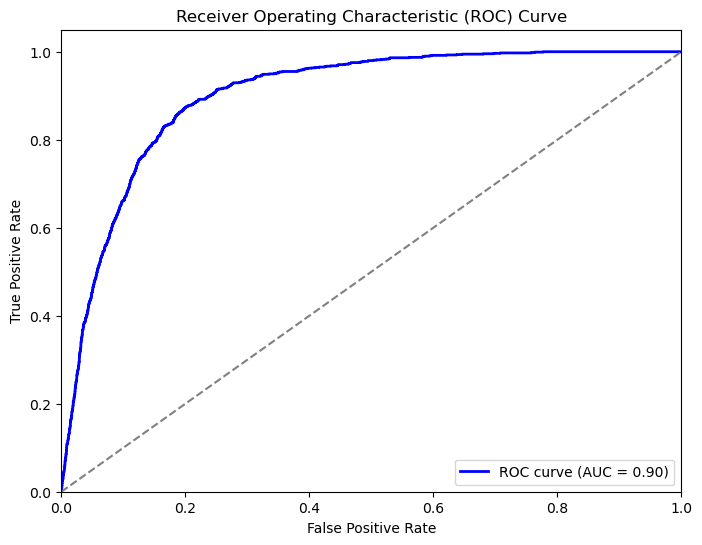

In [92]:
#ROC Curve

y_test_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 9. Feature Importance

[Back to Table of Contents](#--Table-of-Contents)

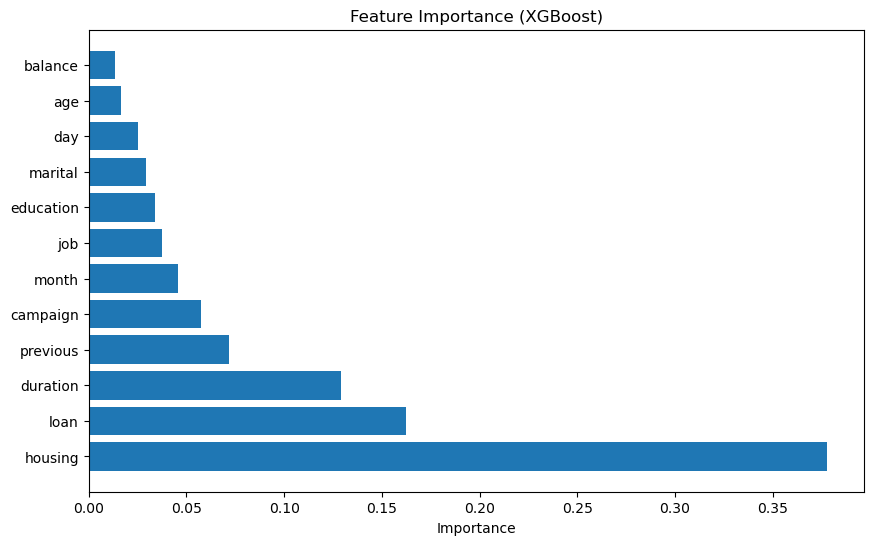

In [93]:
#Getting feature importance from the model selected
feature_importances = xgb_model.feature_importances_

# Creating a DataFrame 
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features by order of importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()

### 10. Summary

[Back to Table of Contents](#--Table-of-Contents)

The data 1 column and 45211 rows. It was splitted into 17 columns by 45211 rows with no missing values or duplicates after the sanity checks. Exploratory analysis was carried out and the results described below;
 
* From the exploratory analysis, Age was found to be an important feature of clients who will subscribe to a term deposit, with middle-aged clients of about 30-35 years, like subscribe.


* Also, Customers in jobs like "blue-collar", "technician", and "retired" showed a higher likelihood of subscribing to a term deposit although quite a number of them has less balance in their account.

* Again, Customers with a higher account Balance were more likely to subscribe to a term deposit.

* Customers with a higher Education level, especially those with tertiary education, had a higher likelihood of subscribing.

* Previous contacted customers during the campaign whad a higher chance of subscribing.

* Customers who had no loan or housing loan also were more likely to subscribe to a term deposit.

* In the month May and June, the subscription rates were high which indicates the season in which most customers were likely to subscribe to a term deposit.

* Singles and divorced Customers also showed interest in subscribing to a term deposit more than married Customers, probably they have a lot of responsibilities to cater for.

* The higher the duration,that is; the longer the time spent on the call, the higher, Customers subscribed to a term deposit.

2. It was also observed that the target variable, was imbalanced as about 88% of it were "No" whiles about 11% was "Yes". In order to avoid avoid bias in the model, SMOTE and class_weight was used to handle it.

Also, redundant features were dropped to avoid the model from underfitting or overfitting.

About 6 Algorithms were used in the model building, hyperparameter tuning was done and the best model selected based on their Accuracy and F1 score.

The best performing model selected was Xgboost with a test Accuracy of 87% and test F1-Score of 56%.

Though the data is overfiting, this is due to inadequate data and unbalanced presentation of the target variable during testing.

### 11. Recommendations

[Back to Table of Contents](#--Table-of-Contents)

1. Marketting should be centered on customers of middle aged (30-50), especially those with higher educational qualifications. And adverisement should be based on the long term essence of subscribing to the term deposit.

2. Those with blue collar jobs and technicians should be highly considered, for example; a message can be tailored or personalized to them to constantly remind and teach them essence of term deposit.

3. Utilize seasonal campaigns during peak months for example in  May and June as seen from the analysis when subscription rates are higher.

4. Interact more with clients who were previously contacted in the campaign, especially those who were interested but did not subscribe. Example, the company can offer them nice incentives and probably additional information that will enthuse them to subscibe the term deposit. 

### 12.  Model Deployment

[Back to Table of Contents](#--Table-of-Contents)

[Back to Table of Contents](#--Table-of-Contents)